In [48]:
library(reticulate)
library(ggpubr)
library(rstatix)
llm.coop <- import("llm_cooperation.main")

In [49]:
config=llm.coop$Configuration(
    grid=dict(
        temperature=c(0.1, 0.6),
        model=c("gpt-3.5-turbo-0301", "gpt-3.5-turbo-0613", "gpt-3.5-turbo-1106"),
        max_tokens=list(500)
    ),
    experiment_names=list("dilemma"),
    num_participant_samples=30,
    num_replications=3
)

In [50]:
results <- llm.coop$load_all(config)
results

Participant Condition                                                                                              
1     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
2     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
3     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
4     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
5     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
6     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
7     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
8     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
9     Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
10    Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
11    Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
12    Cooperative, 0          , TRUE       , numerals   , lower      , they       , FALSE      , FALSE      , 0          
13    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
14    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
15    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
16    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
17    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
18    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
19    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
20    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
21    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
22    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
23    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
24    Cooperative, 0          , TRUE       , colors     , upper      , they       , FALSE      , FALSE      , 1          
25    Cooperative, 0          , TRUE       , numerals   , upper      , they       , TRUE       , FALSE      , 2          
26    Cooperative, 0          , TRUE       , numerals   , upper      , they       , TRUE       , FALSE      , 2          
27    Cooperative, 0          , TRUE       , numerals   , upper      , they       , TRUE       , FALSE      , 2          
28    Cooperative, 0          , TRUE       , numerals   , upper      , they       , TRUE       , FALSE      , 2          
29    Cooperative, 0          , TRUE       , numerals   , upper      , they       , TRUE       , FALSE      , 2          
30    Cooperative, 0          , TRUE       , numerals   , upper      , they       , TRUE       , FALSE      , 2          
⋮     ⋮                                                                                                                  
32371 Control , 2       , TRUE    , numbers , standard, they    , FALSE   , FALSE   , 447             

Warning message:
“Removed 3254 rows containing non-finite values (`stat_boxplot()`).”


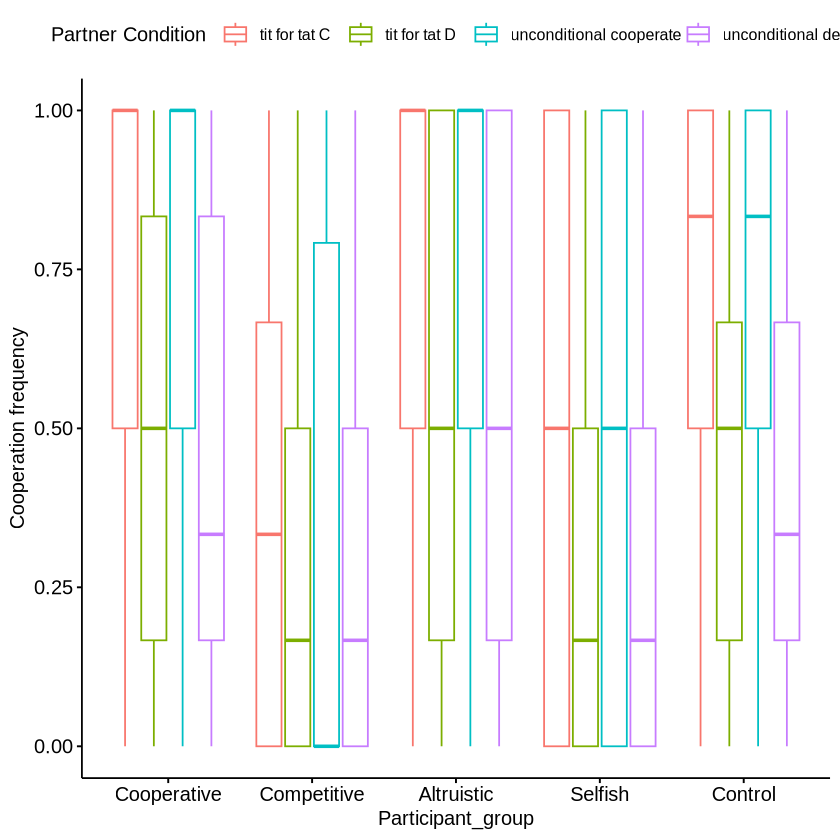

In [51]:
ggboxplot(results, x="Participant_group", y = "Cooperation frequency", color="Partner Condition")

In [37]:
names(results)

[1] "Participant Condition"        "Partner Condition"           
 [3] "Score"                        "Cooperation frequency"       
 [5] "Choices"                      "Transcript"                  
 [7] "Model"                        "Temperature"                 
 [9] "Experiment"                   "Participant_group"           
[11] "Participant_prompt_index"     "Participant_chain_of_thought"
[13] "Participant_label"            "Participant_case"            
[15] "Participant_pronoun"          "Participant_defect_first"    
[17] "Participant_labels_reversed"  "Participant_id"

In [52]:
names(results)[1] = "Participant_condition"
names(results)[2] = "Partner_condition"
names(results)[4] = "Cooperation_frequency"

In [53]:
res.aov <- anova_test(data=results, dv=Cooperation_frequency, wid=Participant_id, between=Participant_group, within=Partner_condition)
get_anova_table(res.aov)

Warning message:
“NA detected in rows: 325,327,329,332,336,973,975,976,977,978,980,981,982,1011,1016,1778,2427,2433,2821,2827,3351,3356,3447,3556,3563,3642,3648,4396,4398,4400,4403,4429,4430,4431,4432,4433,4434,4435,4436,4437,4438,4439,4465,4466,4467,4468,4469,4470,4471,4474,4475,4476,4515,4517,4519,4520,4523,4524,4529,4657,4658,4659,4660,4661,4662,4663,4664,4665,4666,4667,4825,4827,4829,4833,4886,4890,4895,4898,4921,4922,4928,4931,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003,5004,5041,5043,5045,5053,5054,5055,5056,5057,5058,5060,5061,5062,5063,5064,5089,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100,5137,5138,5139,5140,5141,5142,5143,5146,5147,5148,5149,5150,5151,5152,5153,5154,5155,5157,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168,5169,5170,5171,5172,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5245,5246,5247,5248,5249,5250,5251,5252,5253,5254,5255,5256,5293,5294,5295,5296,5297,5298,5299,5300,5301,5302,5303,5304,5311,5317,5318,5320,5321,5322,5323

ERROR: [1m[33mError[39m in `spread()`:[22m
[1m[22m[33m![39m Each row of output must be identified by a unique combination of keys.
[36mℹ[39m Keys are shared for 29146 rows
[36m•[39m 14383, 14384, 14385, 15682, 15683, 15684, 17032, 17033, 17034, 18060, 18061, 18062, 19344, 19345, 19346, 20694,
  20695, 20696
[36m•[39m 14386, 14387, 14388, 15685, 15686, 15687, 17035, 17036, 17037, 18063, 18064, 18065, 19347, 19348, 19349, 20697,
  20698, 20699
[36m•[39m 14389, 14390, 14391, 15688, 15689, 15690, 17038, 17039, 17040, 18066, 18067, 18068, 19350, 19351, 19352, 20700,
  20701, 20702
[36m•[39m 14392, 14393, 14394, 15691, 15692, 15693, 17041, 17042, 17043, 18069, 18070, 18071, 19353, 19354, 19355, 20703,
  20704, 20705
[36m•[39m 14395, 14396, 14397, 15694, 15695, 15696, 17044, 17045, 17046, 18072, 18073, 18074, 19356, 19357, 19358, 20706,
  20707, 20708
[36m•[39m 14398, 14399, 14400, 15697, 15698, 15699, 17047, 17048, 17049, 18075, 18076, 18077, 19359, 19360, 19361, 20709,
  20710, 20711
[36m•[39m 14401, 14402, 14403, 15700, 15701, 15702, 17050, 17051, 17052, 18078, 18079, 18080, 19362, 19363, 19364, 20712,
  20713, 20714
[36m•[39m 14404, 14405, 14406, 15703, 15704, 15705, 17053, 17054, 17055, 18081, 18082, 18083, 19365, 19366, 19367, 20715,
  20716, 20717
[36m•[39m 14407, 14408, 14409, 15706, 15707, 15708, 17056, 17057, 17058, 18084, 18085, 18086, 19368, 19369, 19370, 20718,
  20719
[36m•[39m 14410, 14411, 14412, 15709, 15710, 15711, 17059, 17060, 17061, 18087, 18088, 18089, 19371, 19372, 19373, 20720,
  20721, 20722
[36m•[39m 14413, 14414, 14415, 15712, 15713, 15714, 17062, 17063, 17064, 18090, 18091, 18092, 19374, 19375, 19376, 20723,
  20724, 20725
[36m•[39m 14416, 14417, 14418, 15715, 15716, 15717, 17065, 17066, 17067, 18093, 18094, 18095, 19377, 19378, 19379, 20726,
  20727, 20728
[36m•[39m 14419, 14420, 14421, 15718, 15719, 15720, 17068, 17069, 17070, 18096, 18097, 18098, 19380, 19381, 19382, 20729,
  20730, 20731
[36m•[39m 14422, 14423, 14424, 15721, 15722, 15723, 17071, 17072, 17073, 18099, 18100, 18101, 19383, 19384, 19385, 20732,
  20733, 20734
[36m•[39m 14425, 14426, 14427, 15724, 15725, 15726, 17074, 17075, 18102, 18103, 19386, 19387, 19388, 20735
[36m•[39m 14428, 14429, 14430, 15727, 15728, 15729, 17076, 17077, 17078, 18104, 18105, 18106, 19389, 19390, 19391, 20736,
  20737, 20738
[36m•[39m 14431, 14432, 14433, 15730, 15731, 15732, 17079, 17080, 17081, 18107, 18108, 18109, 19392, 19393, 19394, 20739,
  20740, 20741
[36m•[39m 14434, 14435, 14436, 15733, 15734, 15735, 17082, 17083, 17084, 18110, 18111, 18112, 19395, 19396, 19397, 20742,
  20743, 20744
[36m•[39m 14437, 14438, 14439, 15736, 15737, 15738, 17085, 17086, 17087, 18113, 18114, 18115, 19398, 19399, 19400, 20745,
  20746, 20747
[36m•[39m 14440, 14441, 14442, 15739, 15740, 15741, 17088, 17089, 17090, 18116, 18117, 18118, 19401, 19402, 19403, 20748,
  20749, 20750
[36m•[39m 14443, 14444, 14445, 15742, 15743, 15744, 17091, 17092, 17093, 18119, 18120, 18121, 19404, 19405, 19406, 20751,
  20752, 20753
[36m•[39m 14446, 14447, 14448, 15745, 15746, 15747, 17094, 17095, 17096, 18122, 18123, 18124, 19407, 19408, 19409, 20754,
  20755, 20756
[36m•[39m 14449, 14450, 14451, 15748, 15749, 15750, 17097, 17098, 17099, 18125, 18126, 18127, 19410, 19411, 19412, 20757,
  20758, 20759
[36m•[39m 14452, 14453, 14454, 15751, 15752, 15753, 17100, 17101, 17102, 18128, 18129, 18130, 19413, 19414, 19415, 20760,
  20761, 20762
[36m•[39m 14455, 14456, 14457, 15754, 15755, 15756, 17103, 17104, 17105, 18131, 18132, 18133, 19416, 19417, 19418, 20763,
  20764, 20765
[36m•[39m 14458, 14459, 14460, 15757, 15758, 15759, 17106, 17107, 17108, 18134, 18135, 18136, 19419, 19420, 19421, 20766,
  20767, 20768
[36m•[39m 14461, 14462, 14463, 15760, 15761, 15762, 17109, 17110, 17111, 18137, 18138, 18139, 19422, 19423, 19424, 20769,
  20770, 20771
[36m•[39m 14464, 14465, 15763, 15764, 15765, 17112, 17113, 17114, 18140, 18141, 19425, 19426, 19427, 20772, 20773, 20774
[36m•[39m 14466, 14467, 14468, 15766, 15767, 15768, 17115, 17116, 17117, 18142, 18143, 18144, 19428, 19429, 19430, 20775,
  20776, 20777
[36m•[39m 14469, 14470, 14471, 15769, 15770, 15771, 17118, 17119, 17120, 18145, 18146, 18147, 19431, 19432, 19433, 20778,
  20779, 20780
[36m•[39m 14472, 14473, 14474, 15772, 15773, 15774, 17121, 17122, 17123, 18148, 18149, 18150, 19434, 19435, 19436, 20781,
  20782, 20783
[36m•[39m 14475, 14476, 14477, 15775, 15776, 15777, 17124, 17125, 17126, 18151, 18152, 18153, 19437, 19438, 19439, 20784,
  20785, 20786
[36m•[39m 14478, 14479, 14480, 15778, 15779, 15780, 17127, 17128, 17129, 18154, 18155, 18156, 19440, 19441, 19442, 20787,
  20788, 20789
[36m•[39m 14481, 14482, 14483, 15781, 15782, 15783, 17130, 17131, 17132, 18157, 18158, 18159, 19443, 19444, 19445, 20790,
  20791, 20792
[36m•[39m 14484, 14485, 14486, 15784, 15785, 15786, 17133, 17134, 17135, 18160, 18161, 18162, 19446, 19447, 19448, 20793,
  20794, 20795
[36m•[39m 14487, 14488, 14489, 15787, 15788, 15789, 17136, 17137, 17138, 18163, 18164, 18165, 19449, 19450, 19451, 20796,
  20797, 20798
[36m•[39m 14490, 14491, 14492, 15790, 15791, 15792, 17139, 17140, 17141, 18166, 18167, 18168, 19452, 19453, 19454, 20799,
  20800, 20801
[36m•[39m 14493, 14494, 14495, 15793, 15794, 15795, 17142, 17143, 17144, 18169, 18170, 18171, 19455, 19456, 19457, 20802,
  20803, 20804
[36m•[39m 14496, 14497, 14498, 15796, 15797, 15798, 17145, 17146, 17147, 18172, 18173, 18174, 19458, 19459, 19460, 20805,
  20806, 20807
[36m•[39m 14499, 14500, 14501, 15799, 15800, 15801, 17148, 18175, 18176, 18177, 19461, 19462, 19463, 20808, 20809
[36m•[39m 14502, 14503, 14504, 15802, 15803, 15804, 17149, 17150, 17151, 18178, 18179, 18180, 19464, 19465, 19466, 20810,
  20811, 20812
[36m•[39m 14505, 14506, 14507, 15805, 15806, 15807, 17152, 17153, 17154, 18181, 18182, 18183, 19467, 19468, 19469, 20813,
  20814
[36m•[39m 14508, 14509, 14510, 15808, 15809, 15810, 18184, 18185, 18186, 19470, 19471, 19472, 20815
[36m•[39m 14511, 14512, 14513, 15811, 15812, 15813, 17155, 17156, 17157, 18187, 18188, 18189, 19473, 19474, 19475, 20816,
  20817, 20818
[36m•[39m 14514, 14515, 14516, 15814, 15815, 15816, 17158, 17159, 17160, 18190, 18191, 18192, 19476, 19477, 19478, 20819,
  20820, 20821
[36m•[39m 14517, 14518, 14519, 15817, 15818, 15819, 17161, 17162, 17163, 18193, 18194, 18195, 19479, 19480, 19481, 20822,
  20823, 20824
[36m•[39m 14520, 14521, 14522, 15820, 15821, 15822, 17164, 17165, 17166, 18196, 18197, 18198, 19482, 19483, 19484
[36m•[39m 14523, 14524, 14525, 15823, 15824, 15825, 17167, 18199, 18200, 18201, 19485, 19486, 19487, 20825, 20826
[36m•[39m 14526, 14527, 14528, 15826, 15827, 15828, 17168, 17169, 17170, 18202, 18203, 18204, 19488, 19489, 19490, 20827,
  20828
[36m•[39m 14529, 14530, 14531, 15829, 15830, 15831, 17171, 17172, 17173, 18205, 18206, 18207, 19491, 19492, 19493, 20829,
  20830
[36m•[39m 14532, 14533, 14534, 15832, 15833, 15834, 17174, 17175, 17176, 18208, 18209, 18210, 19494, 19495, 19496, 20831,
  20832, 20833
[36m•[39m 14535, 14536, 14537, 15835, 15836, 15837, 17177, 17178, 17179, 18211, 18212, 18213, 19497, 19498, 19499, 20834
[36m•[39m 14538, 14539, 14540, 15838, 15839, 15840, 17180, 17181, 17182, 18214, 18215, 18216, 19500, 19501, 19502, 20835,
  20836, 20837
[36m•[39m 14541, 14542, 14543, 15841, 15842, 15843, 17183, 17184, 17185, 18217, 18218, 18219, 19503, 19504, 19505, 20838,
  20839, 20840
[36m•[39m 14544, 14545, 14546, 15844, 15845, 15846, 17186, 17187, 17188, 18220, 18221, 18222, 19506, 19507, 19508, 20841,
  20842, 20843
[36m•[39m 14547, 14548, 14549, 15847, 15848, 15849, 17189, 17190, 17191, 18223, 18224, 18225, 19509, 19510, 19511, 20844,
  20845, 20846
[36m•[39m 14550, 14551, 14552, 15850, 15851, 15852, 17192, 17193, 17194, 18226, 18227, 18228, 19512, 19513, 19514, 20847,
  20848, 20849
[36m•[39m 14553, 14554, 14555, 15853, 15854, 15855, 17195, 17196, 17197, 18229, 18230, 18231, 19515, 19516, 19517, 20850,
  20851
[36m•[39m 14556, 14557, 14558, 15856, 15857, 15858, 17198, 17199, 17200, 18232, 18233, 18234, 19518, 19519, 19520, 20852,
  20853
[36m•[39m 14559, 14560, 14561, 15859, 15860, 15861, 17201, 17202, 17203, 18235, 18236, 18237, 19521, 19522, 19523, 20854,
  20855
[36m•[39m 14562, 14563, 14564, 15862, 15863, 15864, 17204, 17205, 17206, 18238, 18239, 18240, 19524, 19525, 19526, 20856
[36m•[39m 14565, 14566, 14567, 15865, 15866, 15867, 17207, 17208, 17209, 18241, 18242, 18243, 19527, 19528, 19529, 20857,
  20858, 20859
[36m•[39m 14568, 14569, 14570, 15868, 15869, 15870, 17210, 17211, 17212, 18244, 18245, 18246, 19530, 19531, 19532, 20860,
  20861, 20862
[36m•[39m 14571, 14572, 14573, 15871, 15872, 15873, 17213, 17214, 18247, 18248, 18249, 19533, 19534, 19535, 20863, 20864,
  20865
[36m•[39m 14574, 14575, 14576, 15874, 15875, 15876, 17215, 17216, 17217, 18250, 18251, 18252, 19536, 19537, 19538, 20866,
  20867
[36m•[39m 14577, 14578, 14579, 15877, 15878, 15879, 18253, 18254, 19539, 19540, 19541
[36m•[39m 14580, 14581, 14582, 15880, 15881, 15882, 17218, 17219, 17220, 18255, 18256, 18257, 19542, 19543, 19544, 20868,
  20869, 20870
[36m•[39m 14583, 14584, 14585, 15883, 15884, 15885, 17221, 17222, 17223, 18258, 18259, 18260, 19545, 19546, 19547, 20871,
  20872
[36m•[39m 14586, 14587, 14588, 15886, 15887, 15888, 17224, 17225, 17226, 18261, 18262, 18263, 19548, 19549, 19550, 20873,
  20874
[36m•[39m 14589, 14590, 14591, 15889, 15890, 15891, 17227, 17228, 17229, 18264, 18265, 18266, 19551, 19552, 19553, 20875,
  20876, 20877
[36m•[39m 14592, 14593, 14594, 15892, 15893, 15894, 17230, 17231, 18267, 18268, 19554, 19555, 19556, 20878
[36m•[39m 14595, 14596, 14597, 15895, 15896, 15897, 17232, 17233, 17234, 18269, 18270, 18271, 19557, 19558, 19559, 20879,
  20880, 20881
[36m•[39m 14598, 14599, 14600, 15898, 15899, 15900, 17235, 17236, 17237, 18272, 18273, 18274, 19560, 19561, 19562, 20882,
  20883, 20884
[36m•[39m 14601, 14602, 14603, 15901, 15902, 15903, 17238, 17239, 17240, 18275, 18276, 18277, 19563, 19564, 19565, 20885,
  20886, 20887
[36m•[39m 14604, 14605, 14606, 15904, 15905, 15906, 17241, 17242, 17243, 18278, 18279, 18280, 19566, 19567, 19568, 20888,
  20889, 20890
[36m•[39m 14607, 14608, 14609, 15907, 15908, 15909, 17244, 17245, 17246, 18281, 18282, 18283, 19569, 19570, 19571, 20891,
  20892, 20893
[36m•[39m 14610, 14611, 14612, 15910, 15911, 15912, 17247, 17248, 17249, 18284, 18285, 18286, 19572, 19573, 19574, 20894,
  20895, 20896
[36m•[39m 14613, 14614, 14615, 15913, 15914, 15915, 17250, 17251, 18287, 18288, 18289, 19575, 19576, 19577, 20897, 20898
[36m•[39m 14616, 14617, 14618, 15916, 15917, 15918, 17252, 17253, 17254, 18290, 18291, 18292, 19578, 19579, 19580, 20899,
  20900, 20901
[36m•[39m 14619, 14620, 14621, 15919, 15920, 15921, 17255, 17256, 18293, 18294, 18295, 19581, 19582, 19583, 20902, 20903,
  20904
[36m•[39m 14622, 14623, 14624, 15922, 15923, 15924, 17257, 17258, 17259, 18296, 18297, 18298, 19584, 19585, 19586, 20905,
  20906, 20907
[36m•[39m 14625, 15925, 15926, 15927, 17260, 17261, 17262, 18299, 18300, 19587, 19588, 19589, 20908, 20909, 20910
[36m•[39m 14626, 14627, 14628, 15928, 15929, 15930, 17263, 17264, 17265, 18301, 18302, 18303, 19590, 19591, 19592, 20911,
  20912, 20913
[36m•[39m 14629, 14630, 14631, 15931, 15932, 15933, 17266, 17267, 17268, 18304, 18305, 18306, 19593, 19594, 19595, 20914,
  20915, 20916
[36m•[39m 14632, 14633, 15934, 15935, 15936, 17269, 17270, 17271, 18307, 19596, 19597, 19598, 20917, 20918
[36m•[39m 14634, 14635, 14636, 15937, 15938, 15939, 17272, 17273, 17274, 18308, 18309, 18310, 19599, 19600, 19601, 20919,
  20920, 20921
[36m•[39m 14637, 14638, 14639, 15940, 15941, 15942, 17275, 17276, 17277, 18311, 18312, 18313, 19602, 19603, 19604, 20922
[36m•[39m 14640, 14641, 14642, 15943, 15944, 15945, 17278, 18314, 18315, 18316, 19605, 19606, 19607
[36m•[39m 14643, 14644, 14645, 15946, 15947, 15948, 17279, 17280, 17281, 18317, 18318, 18319, 19608, 19609, 19610, 20923,
  20924, 20925
[36m•[39m 14646, 14647, 14648, 15949, 15950, 15951, 17282, 17283, 17284, 18320, 18321, 18322, 19611, 19612, 19613, 20926,
  20927, 20928
[36m•[39m 14649, 14650, 14651, 15952, 15953, 15954, 17285, 17286, 17287, 18323, 18324, 18325, 19614, 19615, 19616, 20929,
  20930, 20931
[36m•[39m 14652, 14653, 14654, 15955, 15956, 15957, 17288, 18326, 18327, 18328, 19617, 19618, 19619, 20932
[36m•[39m 14655, 14656, 14657, 15958, 15959, 15960, 17289, 17290, 18329, 18330, 18331, 19620, 19621, 19622, 20933
[36m•[39m 14658, 14659, 14660, 15961, 15962, 15963, 17291, 17292, 18332, 18333, 18334, 19623, 19624, 19625, 20934
[36m•[39m 14661, 14662, 14663, 15964, 15965, 15966, 17293, 17294, 18335, 18336, 18337, 19626, 19627, 19628, 20935, 20936,
  20937
[36m•[39m 14664, 14665, 14666, 15967, 15968, 15969, 17295, 17296, 17297, 18338, 18339, 18340, 19629, 19630, 19631, 20938,
  20939, 20940
[36m•[39m 14667, 14668, 14669, 15970, 15971, 15972, 17298, 17299, 17300, 18341, 18342, 18343, 19632, 19633, 19634, 20941,
  20942
[36m•[39m 14670, 14671, 14672, 15973, 15974, 15975, 17301, 17302, 17303, 18344, 18345, 18346, 19635, 19636, 19637, 20943,
  20944, 20945
[36m•[39m 14673, 14674, 14675, 15976, 15977, 15978, 17304, 17305, 17306, 18347, 18348, 18349, 19638, 19639, 19640, 20946,
  20947, 20948
[36m•[39m 14676, 14677, 14678, 15979, 15980, 15981, 18350, 18351, 18352, 19641, 19642, 19643
[36m•[39m 14679, 14680, 14681, 15982, 15983, 15984, 18353, 18354, 18355, 19644, 19645, 19646, 20949
[36m•[39m 14682, 14683, 14684, 15985, 15986, 15987, 17307, 17308, 17309, 18356, 18357, 18358, 19647, 19648, 19649, 20950
[36m•[39m 14685, 14686, 14687, 15988, 15989, 15990, 18359, 18360, 18361, 19650, 19651, 19652, 20951
[36m•[39m 14688, 14689, 14690, 15991, 15992, 15993, 17310, 18362, 18363, 18364, 19653, 19654, 19655, 20952, 20953
[36m•[39m 14691, 14692, 14693, 15994, 15995, 15996, 17311, 17312, 18365, 18366, 18367, 19656, 19657, 19658
[36m•[39m 14694, 14695, 14696, 15997, 15998, 15999, 17313, 17314, 17315, 18368, 18369, 18370, 19659, 19660, 19661, 20954,
  20955
[36m•[39m 14697, 14698, 14699, 16000, 16001, 16002, 17316, 17317, 17318, 18371, 18372, 18373, 19662, 19663, 19664, 20956,
  20957, 20958
[36m•[39m 14700, 14701, 14702, 16003, 16004, 16005, 17319, 17320, 17321, 18374, 18375, 18376, 19665, 19666, 19667, 20959,
  20960, 20961
[36m•[39m 14703, 14704, 14705, 16006, 16007, 16008, 17322, 17323, 17324, 18377, 18378, 18379, 19668, 19669, 19670, 20962,
  20963
[36m•[39m 14706, 14707, 14708, 16009, 16010, 16011, 18380, 18381, 18382, 19671, 19672, 19673
[36m•[39m 14709, 14710, 14711, 16012, 16013, 16014, 17325, 18383, 18384, 18385, 19674, 19675, 19676, 20964, 20965
[36m•[39m 14712, 14713, 14714, 16015, 16016, 16017, 17326, 17327, 18386, 18387, 18388, 19677, 19678, 19679, 20966, 20967,
  20968
[36m•[39m 14715, 14716, 14717, 16018, 16019, 16020, 17328, 18389, 18390, 18391, 19680, 19681, 19682, 20969, 20970
[36m•[39m 14718, 14719, 14720, 16021, 16022, 16023, 17329, 17330, 17331, 18392, 18393, 18394, 19683, 19684, 19685, 20971,
  20972
[36m•[39m 14721, 14722, 14723, 16024, 16025, 16026, 17332, 17333, 17334, 18395, 18396, 18397, 19686, 19687, 19688, 20973,
  20974, 20975
[36m•[39m 14724, 14725, 14726, 16027, 16028, 16029, 17335, 17336, 17337, 18398, 18399, 18400, 19689, 19690, 19691, 20976,
  20977
[36m•[39m 14727, 14728, 14729, 16030, 16031, 16032, 17338, 17339, 18401, 18402, 18403, 19692, 19693, 19694, 20978, 20979
[36m•[39m 14730, 14731, 14732, 16033, 16034, 16035, 18404, 18405, 18406, 19695, 19696, 19697
[36m•[39m 14733, 14734, 14735, 16036, 16037, 16038, 17340, 17341, 18407, 18408, 18409, 19698, 19699, 19700, 20980, 20981,
  20982
[36m•[39m 14736, 14737, 14738, 16039, 16040, 16041, 18410, 18411, 18412, 19701, 19702, 19703, 20983
[36m•[39m 14739, 14740, 14741, 16042, 16043, 16044, 17342, 17343, 17344, 18413, 18414, 18415, 19704, 19705, 19706, 20984,
  20985
[36m•[39m 14742, 14743, 14744, 16045, 16046, 16047, 18416, 18417, 18418, 19707, 19708, 19709
[36m•[39m 14745, 14746, 14747, 16048, 16049, 16050, 17345, 17346, 18419, 18420, 18421, 19710, 19711, 19712, 20986, 20987,
  20988
[36m•[39m 14748, 14749, 14750, 16051, 16052, 16053, 17347, 18422, 19713, 19714, 19715, 20989, 20990, 20991
[36m•[39m 14751, 14752, 14753, 16054, 16055, 16056, 17348, 17349, 17350, 18423, 18424, 18425, 19716, 19717, 19718, 20992,
  20993, 20994
[36m•[39m 14754, 14755, 14756, 16057, 16058, 16059, 17351, 17352, 18426, 18427, 18428, 19719, 19720, 19721, 20995, 20996,
  20997
[36m•[39m 14757, 14758, 14759, 16060, 16061, 16062, 18429, 18430, 18431, 19722, 19723, 19724
[36m•[39m 14760, 14761, 14762, 16063, 16064, 16065, 17353, 17354, 17355, 18432, 18433, 18434, 19725, 19726, 19727, 20998,
  20999, 21000
[36m•[39m 14763, 14764, 14765, 16066, 16067, 16068, 17356, 17357, 17358, 18435, 18436, 19728, 19729, 19730, 21001, 21002,
  21003
[36m•[39m 14766, 14767, 14768, 16069, 16070, 16071, 18437, 18438, 18439, 19731, 19732, 19733, 21004
[36m•[39m 14769, 14770, 14771, 16072, 16073, 16074, 18440, 18441, 18442, 19734, 19735, 19736
[36m•[39m 14772, 14773, 14774, 16075, 16076, 16077, 17359, 18443, 18444, 18445, 19737, 19738, 19739, 21005
[36m•[39m 14775, 14776, 14777, 16078, 16079, 16080, 17360, 17361, 17362, 18446, 18447, 18448, 19740, 19741, 19742, 21006,
  21007, 21008
[36m•[39m 14778, 14779, 14780, 16081, 16082, 16083, 17363, 18449, 18450, 18451, 19743, 19744, 19745, 21009, 21010, 21011
[36m•[39m 14781, 14782, 14783, 16084, 16085, 16086, 17364, 17365, 17366, 18452, 18453, 18454, 19746, 19747, 19748, 21012,
  21013
[36m•[39m 14784, 14785, 14786, 16087, 16088, 16089, 18455, 18456, 18457, 19749, 19750, 19751, 21014, 21015
[36m•[39m 14787, 14788, 14789, 16090, 16091, 16092, 18458, 18459, 18460, 19752, 19753, 19754, 21016, 21017
[36m•[39m 14790, 14791, 14792, 16093, 16094, 16095, 17367, 17368, 17369, 18461, 18462, 18463, 19755, 19756, 19757, 21018,
  21019, 21020
[36m•[39m 14793, 14794, 14795, 16096, 16097, 16098, 17370, 18464, 18465, 18466, 19758, 19759, 19760
[36m•[39m 14796, 14797, 14798, 16099, 16100, 16101, 17371, 17372, 17373, 18467, 18468, 18469, 19761, 19762, 19763, 21021,
  21022
[36m•[39m 14799, 14800, 14801, 16102, 16103, 16104, 18470, 18471, 18472, 19764, 19765, 19766, 21023
[36m•[39m 14802, 14803, 14804, 16105, 16106, 16107, 18473, 18474, 18475, 19767, 19768, 19769
[36m•[39m 14805, 14806, 14807, 16108, 16109, 16110, 17374, 17375, 18476, 18477, 18478, 19770, 19771, 19772, 21024, 21025
[36m•[39m 14808, 14809, 14810, 16111, 16112, 16113, 17376, 17377, 18479, 18480, 18481, 19773, 19774, 19775, 21026, 21027,
  21028
[36m•[39m 14811, 14812, 14813, 16114, 16115, 16116, 17378, 17379, 17380, 18482, 18483, 18484, 19776, 19777, 19778, 21029,
  21030
[36m•[39m 14814, 14815, 14816, 16117, 16118, 16119, 17381, 17382, 18485, 18486, 18487, 19779, 19780, 19781, 21031, 21032
[36m•[39m 14817, 14818, 14819, 16120, 16121, 16122, 17383, 18488, 18489, 19782, 19783, 19784, 21033
[36m•[39m 14820, 14821, 14822, 16123, 16124, 16125, 17384, 17385, 18490, 18491, 18492, 19785, 19786, 19787, 21034, 21035
[36m•[39m 14823, 14824, 14825, 16126, 16127, 16128, 17386, 18493, 18494, 18495, 19788, 19789, 19790, 21036, 21037
[36m•[39m 14826, 14827, 14828, 16129, 16130, 16131, 17387, 17388, 18496, 18497, 18498, 19791, 19792, 19793, 21038, 21039
[36m•[39m 14829, 14830, 14831, 16132, 16133, 16134, 17389, 17390, 17391, 18499, 18500, 18501, 19794, 19795, 19796, 21040,
  21041, 21042
[36m•[39m 14832, 14833, 14834, 16135, 16136, 16137, 18502, 18503, 18504, 19797, 19798, 19799, 21043, 21044, 21045
[36m•[39m 14835, 14836, 14837, 16138, 16139, 16140, 18505, 18506, 18507, 19800, 19801, 19802
[36m•[39m 14838, 14839, 14840, 16141, 16142, 16143, 17392, 17393, 18508, 18509, 18510, 19803, 19804, 19805, 21046, 21047,
  21048
[36m•[39m 14841, 14842, 14843, 16144, 16145, 16146, 17394, 17395, 17396, 18511, 18512, 18513, 19806, 19807, 19808, 21049
[36m•[39m 14844, 14845, 14846, 16147, 16148, 16149, 17397, 17398, 17399, 18514, 18515, 18516, 19809, 19810, 19811, 21050,
  21051, 21052
[36m•[39m 14847, 14848, 14849, 16150, 16151, 16152, 17400, 17401, 17402, 18517, 18518, 18519, 19812, 19813, 19814, 21053,
  21054
[36m•[39m 14850, 14851, 14852, 16153, 16154, 16155, 17403, 17404, 17405, 18520, 18521, 18522, 19815, 19816, 19817, 21055,
  21056, 21057
[36m•[39m 14853, 14854, 14855, 16156, 16157, 16158, 17406, 17407, 17408, 18523, 18524, 18525, 19818, 19819, 19820, 21058,
  21059
[36m•[39m 14856, 14857, 14858, 16159, 16160, 16161, 18526, 18527, 19821, 19822, 19823, 21060, 21061
[36m•[39m 14859, 14860, 14861, 16162, 16163, 16164, 17409, 17410, 17411, 18528, 18529, 19824, 19825, 19826, 21062, 21063,
  21064
[36m•[39m 14862, 14863, 14864, 16165, 16166, 16167, 17412, 17413, 17414, 18530, 18531, 18532, 19827, 19828, 19829, 21065,
  21066
[36m•[39m 14865, 14866, 14867, 16168, 16169, 16170, 17415, 17416, 18533, 18534, 18535, 19830, 19831, 19832, 21067, 21068,
  21069
[36m•[39m 14868, 14869, 14870, 16171, 16172, 16173, 17417, 17418, 17419, 18536, 18537, 18538, 19833, 19834, 19835, 21070,
  21071, 21072
[36m•[39m 14871, 14872, 14873, 16174, 16175, 16176, 17420, 17421, 18539, 18540, 18541, 19836, 19837, 19838, 21073, 21074,
  21075
[36m•[39m 14874, 14875, 14876, 16177, 16178, 16179, 17422, 17423, 17424, 18542, 18543, 18544, 19839, 19840, 19841, 21076,
  21077, 21078
[36m•[39m 14877, 14878, 14879, 16180, 16181, 16182, 17425, 18545, 18546, 18547, 19842, 19843, 19844, 21079, 21080
[36m•[39m 14880, 14881, 14882, 16183, 16184, 16185, 17426, 17427, 18548, 18549, 18550, 19845, 19846, 19847, 21081, 21082,
  21083
[36m•[39m 14883, 14884, 14885, 16186, 16187, 16188, 17428, 17429, 18551, 18552, 18553, 19848, 19849, 19850, 21084
[36m•[39m 14886, 14887, 14888, 16189, 16190, 16191, 17430, 18554, 18555, 18556, 19851, 19852, 19853, 21085, 21086, 21087
[36m•[39m 14889, 14890, 14891, 16192, 16193, 16194, 18557, 18558, 18559, 19854, 19855, 19856, 21088, 21089
[36m•[39m 14892, 14893, 14894, 16195, 16196, 16197, 17431, 17432, 17433, 18560, 18561, 18562, 19857, 19858, 19859, 21090,
  21091, 21092
[36m•[39m 14895, 14896, 14897, 16198, 16199, 16200, 17434, 18563, 18564, 18565, 19860, 19861, 19862, 21093, 21094, 21095
[36m•[39m 14898, 14899, 14900, 16201, 16202, 16203, 17435, 17436, 18566, 18567, 18568, 19863, 19864, 19865, 21096, 21097
[36m•[39m 14901, 14902, 14903, 16204, 16205, 16206, 17437, 17438, 17439, 18569, 18570, 18571, 19866, 19867, 19868, 21098,
  21099, 21100
[36m•[39m 14904, 14905, 14906, 16207, 16208, 16209, 17440, 17441, 17442, 18572, 18573, 18574, 19869, 19870, 19871, 21101,
  21102, 21103
[36m•[39m 14907, 14908, 14909, 16210, 16211, 16212, 17443, 17444, 18575, 18576, 18577, 19872, 19873, 19874, 21104, 21105
[36m•[39m 14910, 14911, 14912, 16213, 16214, 16215, 17445, 18578, 18579, 18580, 19875, 19876, 19877, 21106, 21107, 21108
[36m•[39m 14913, 14914, 14915, 16216, 16217, 16218, 17446, 17447, 18581, 18582, 18583, 19878, 19879, 19880, 21109, 21110,
  21111
[36m•[39m 14916, 14917, 14918, 16219, 16220, 16221, 17448, 17449, 17450, 18584, 18585, 18586, 19881, 19882, 19883, 21112,
  21113, 21114
[36m•[39m 14919, 14920, 14921, 16222, 16223, 16224, 17451, 17452, 17453, 18587, 18588, 18589, 19884, 19885, 19886, 21115,
  21116, 21117
[36m•[39m 14922, 14923, 14924, 16225, 16226, 16227, 17454, 17455, 17456, 18590, 18591, 18592, 19887, 19888, 19889, 21118,
  21119, 21120
[36m•[39m 14925, 14926, 14927, 16228, 16229, 16230, 18593, 18594, 18595, 19890, 19891, 19892
[36m•[39m 14928, 14929, 14930, 16231, 16232, 16233, 17457, 17458, 17459, 18596, 18597, 18598, 19893, 19894, 19895, 21121,
  21122, 21123
[36m•[39m 14931, 14932, 14933, 16234, 16235, 16236, 17460, 17461, 17462, 18599, 18600, 18601, 19896, 19897, 19898, 21124,
  21125
[36m•[39m 14934, 14935, 14936, 16237, 16238, 16239, 17463, 17464, 17465, 18602, 18603, 18604, 19899, 19900, 19901, 21126,
  21127, 21128
[36m•[39m 14937, 14938, 14939, 16240, 16241, 16242, 17466, 17467, 17468, 18605, 18606, 18607, 19902, 19903, 19904, 21129,
  21130, 21131
[36m•[39m 14940, 14941, 14942, 16243, 16244, 16245, 17469, 17470, 18608, 18609, 19905, 19906, 19907, 21132
[36m•[39m 14943, 14944, 14945, 16246, 16247, 16248, 17471, 17472, 17473, 18610, 18611, 18612, 19908, 19909, 19910, 21133,
  21134, 21135
[36m•[39m 14946, 14947, 14948, 16249, 16250, 16251, 17474, 17475, 17476, 18613, 18614, 18615, 19911, 19912, 19913, 21136,
  21137, 21138
[36m•[39m 14949, 14950, 14951, 16252, 16253, 16254, 17477, 17478, 17479, 18616, 18617, 18618, 19914, 19915, 19916, 21139,
  21140, 21141
[36m•[39m 14952, 14953, 14954, 16255, 16256, 16257, 17480, 17481, 17482, 18619, 18620, 18621, 19917, 19918, 19919, 21142,
  21143, 21144
[36m•[39m 14955, 14956, 14957, 16258, 16259, 16260, 17483, 17484, 17485, 18622, 18623, 18624, 19920, 19921, 19922, 21145
[36m•[39m 14958, 14959, 14960, 16261, 16262, 16263, 17486, 18625, 18626, 18627, 19923, 19924, 19925, 21146
[36m•[39m 14961, 14962, 14963, 16264, 16265, 16266, 17487, 17488, 18628, 18629, 18630, 19926, 19927, 19928, 21147, 21148,
  21149
[36m•[39m 14964, 14965, 14966, 16267, 16268, 16269, 17489, 17490, 17491, 18631, 18632, 18633, 19929, 19930, 19931, 21150,
  21151, 21152
[36m•[39m 14967, 14968, 14969, 16270, 16271, 16272, 17492, 17493, 17494, 18634, 18635, 18636, 19932, 19933, 19934, 21153,
  21154, 21155
[36m•[39m 14970, 14971, 14972, 16273, 16274, 16275, 17495, 17496, 18637, 18638, 18639, 19935, 19936, 19937, 21156, 21157
[36m•[39m 14973, 14974, 14975, 16276, 16277, 16278, 17497, 17498, 17499, 18640, 18641, 18642, 19938, 19939, 19940, 21158,
  21159, 21160
[36m•[39m 14976, 14977, 14978, 16279, 16280, 16281, 17500, 17501, 17502, 18643, 18644, 18645, 19941, 19942, 19943, 21161,
  21162, 21163
[36m•[39m 14979, 14980, 14981, 16282, 16283, 16284, 17503, 18646, 18647, 19944, 19945, 19946
[36m•[39m 14982, 14983, 14984, 16285, 16286, 16287, 17504, 18648, 18649, 18650, 19947, 19948, 19949, 21164
[36m•[39m 14985, 14986, 16288, 16289, 16290, 17505, 17506, 18651, 18652, 18653, 19950, 19951, 19952, 21165, 21166, 21167
[36m•[39m 14987, 14988, 14989, 16291, 16292, 16293, 18654, 18655, 18656, 19953, 19954, 19955
[36m•[39m 14990, 14991, 14992, 16294, 16295, 16296, 18657, 18658, 18659, 19956, 19957, 19958
[36m•[39m 14993, 14994, 14995, 16297, 16298, 16299, 17507, 17508, 17509, 18660, 18661, 18662, 19959, 19960, 19961, 21168,
  21169, 21170
[36m•[39m 14996, 14997, 14998, 16300, 16301, 16302, 17510, 17511, 18663, 18664, 18665, 19962, 19963, 19964, 21171, 21172
[36m•[39m 14999, 15000, 15001, 16303, 16304, 16305, 17512, 17513, 17514, 18666, 18667, 18668, 19965, 19966, 19967, 21173,
  21174, 21175
[36m•[39m 15002, 15003, 15004, 16306, 16307, 16308, 17515, 17516, 17517, 18669, 18670, 18671, 19968, 19969, 19970, 21176,
  21177, 21178
[36m•[39m 15005, 15006, 15007, 16309, 16310, 16311, 17518, 17519, 17520, 18672, 18673, 18674, 19971, 19972, 19973, 21179,
  21180
[36m•[39m 15008, 15009, 15010, 16312, 16313, 16314, 17521, 18675, 18676, 18677, 19974, 19975, 19976, 21181, 21182, 21183
[36m•[39m 15011, 15012, 15013, 16315, 16316, 16317, 17522, 17523, 17524, 18678, 18679, 18680, 19977, 19978, 19979, 21184,
  21185
[36m•[39m 15014, 15015, 15016, 16318, 16319, 16320, 17525, 17526, 18681, 18682, 18683, 19980, 19981, 19982, 21186
[36m•[39m 15017, 15018, 15019, 16321, 16322, 16323, 17527, 17528, 18684, 18685, 18686, 19983, 19984, 19985, 21187, 21188
[36m•[39m 15020, 15021, 15022, 16324, 16325, 16326, 17529, 17530, 17531, 18687, 18688, 18689, 19986, 19987, 19988, 21189,
  21190
[36m•[39m 15023, 15024, 15025, 16327, 16328, 16329, 17532, 17533, 17534, 18690, 18691, 18692, 19989, 19990, 19991, 21191,
  21192, 21193
[36m•[39m 15026, 15027, 15028, 16330, 16331, 16332, 17535, 17536, 18693, 18694, 18695, 19992, 19993, 19994, 21194, 21195,
  21196
[36m•[39m 15029, 15030, 15031, 16333, 16334, 16335, 17537, 18696, 18697, 18698, 19995, 19996, 19997, 21197
[36m•[39m 15032, 15033, 15034, 16336, 16337, 16338, 17538, 17539, 17540, 18699, 18700, 18701, 19998, 19999, 20000, 21198,
  21199, 21200
[36m•[39m 15035, 15036, 15037, 16339, 16340, 16341, 17541, 18702, 18703, 18704, 20001, 20002, 20003, 21201, 21202
[36m•[39m 15038, 15039, 15040, 16342, 16343, 16344, 17542, 17543, 17544, 18705, 18706, 18707, 20004, 20005, 20006, 21203,
  21204, 21205
[36m•[39m 15041, 15042, 15043, 16345, 16346, 16347, 18708, 18709, 18710, 20007, 20008, 20009, 21206
[36m•[39m 15044, 15045, 15046, 16348, 16349, 16350, 17545, 17546, 17547, 18711, 18712, 18713, 20010, 20011, 20012, 21207,
  21208, 21209
[36m•[39m 15047, 15048, 15049, 16351, 16352, 16353, 17548, 17549, 17550, 18714, 18715, 18716, 20013, 20014, 20015, 21210,
  21211, 21212
[36m•[39m 15050, 15051, 15052, 16354, 16355, 16356, 17551, 17552, 17553, 18717, 18718, 18719, 20016, 20017, 20018, 21213
[36m•[39m 15053, 15054, 15055, 16357, 16358, 16359, 17554, 17555, 17556, 18720, 18721, 18722, 20019, 20020, 20021, 21214,
  21215, 21216
[36m•[39m 15056, 15057, 15058, 16360, 16361, 16362, 17557, 17558, 17559, 18723, 18724, 18725, 20022, 20023, 20024, 21217,
  21218
[36m•[39m 15059, 15060, 15061, 16363, 16364, 16365, 17560, 17561, 17562, 18726, 18727, 18728, 20025, 20026, 20027, 21219,
  21220, 21221
[36m•[39m 15062, 15063, 15064, 16366, 16367, 16368, 17563, 17564, 17565, 18729, 18730, 18731, 20028, 20029, 20030, 21222,
  21223, 21224
[36m•[39m 15065, 15066, 15067, 16369, 16370, 16371, 17566, 17567, 17568, 18732, 18733, 20031, 20032, 20033, 21225, 21226,
  21227
[36m•[39m 15068, 15069, 15070, 16372, 16373, 16374, 17569, 17570, 18734, 18735, 18736, 20034, 20035, 20036, 21228, 21229,
  21230
[36m•[39m 15071, 15072, 15073, 16375, 16376, 16377, 17571, 17572, 17573, 18737, 18738, 18739, 20037, 20038, 20039, 21231,
  21232
[36m•[39m 15074, 15075, 15076, 16378, 16379, 16380, 17574, 18740, 18741, 18742, 20040, 20041, 20042, 21233
[36m•[39m 15077, 15078, 15079, 16381, 16382, 16383, 18743, 18744, 18745, 20043, 20044, 20045
[36m•[39m 15080, 15081, 15082, 16384, 16385, 16386, 17575, 18746, 18747, 18748, 20046, 20047, 20048
[36m•[39m 15083, 15084, 16387, 16388, 16389, 17576, 17577, 17578, 18749, 18750, 18751, 20049, 20050, 20051, 21234, 21235,
  21236
[36m•[39m 15085, 15086, 15087, 16390, 16391, 16392, 17579, 17580, 17581, 18752, 18753, 18754, 20052, 20053, 20054, 21237,
  21238, 21239
[36m•[39m 15088, 15089, 15090, 16393, 16394, 16395, 17582, 17583, 17584, 18755, 18756, 18757, 20055, 20056, 20057, 21240,
  21241, 21242
[36m•[39m 15091, 15092, 15093, 16396, 16397, 16398, 18758, 18759, 18760, 20058, 20059, 20060, 21243
[36m•[39m 15094, 15095, 15096, 16399, 16400, 16401, 17585, 17586, 17587, 18761, 18762, 20061, 20062, 20063, 21244, 21245
[36m•[39m 15097, 15098, 15099, 16402, 16403, 16404, 17588, 17589, 17590, 18763, 18764, 18765, 20064, 20065, 20066, 21246,
  21247, 21248
[36m•[39m 15100, 15101, 15102, 16405, 16406, 16407, 17591, 17592, 17593, 18766, 18767, 18768, 20067, 20068, 20069, 21249,
  21250, 21251
[36m•[39m 15103, 15104, 15105, 16408, 16409, 16410, 17594, 17595, 17596, 18769, 18770, 18771, 20070, 20071, 20072, 21252,
  21253, 21254
[36m•[39m 15106, 15107, 15108, 16411, 16412, 16413, 17597, 17598, 17599, 18772, 18773, 18774, 20073, 20074, 20075, 21255,
  21256
[36m•[39m 15109, 15110, 15111, 16414, 16415, 16416, 17600, 17601, 17602, 18775, 18776, 18777, 20076, 20077, 20078, 21257,
  21258, 21259
[36m•[39m 15112, 15113, 15114, 16417, 16418, 16419, 17603, 17604, 17605, 18778, 18779, 18780, 20079, 20080, 20081, 21260,
  21261, 21262
[36m•[39m 15115, 15116, 15117, 16420, 16421, 16422, 17606, 17607, 17608, 18781, 18782, 18783, 20082, 20083, 20084, 21263,
  21264, 21265
[36m•[39m 15118, 15119, 15120, 16423, 16424, 16425, 17609, 18784, 18785, 18786, 20085, 20086, 20087, 21266, 21267
[36m•[39m 15121, 15122, 15123, 16426, 16427, 16428, 17610, 17611, 18787, 18788, 18789, 20088, 20089, 20090, 21268, 21269,
  21270
[36m•[39m 15124, 15125, 15126, 16429, 16430, 16431, 17612, 17613, 17614, 18790, 18791, 18792, 20091, 20092, 20093, 21271,
  21272
[36m•[39m 15127, 15128, 15129, 16432, 16433, 16434, 17615, 17616, 18793, 18794, 18795, 20094, 20095, 20096, 21273
[36m•[39m 15130, 15131, 15132, 16435, 16436, 16437, 17617, 17618, 17619, 18796, 18797, 18798, 20097, 20098, 20099, 21274,
  21275, 21276
[36m•[39m 15133, 15134, 15135, 16438, 16439, 16440, 17620, 17621, 18799, 18800, 20100, 20101, 20102, 21277, 21278
[36m•[39m 15136, 15137, 15138, 16441, 16442, 16443, 17622, 17623, 17624, 18801, 18802, 18803, 20103, 20104, 20105, 21279,
  21280, 21281
[36m•[39m 15139, 15140, 15141, 16444, 16445, 16446, 17625, 17626, 17627, 18804, 18805, 18806, 20106, 20107, 20108, 21282,
  21283, 21284
[36m•[39m 15142, 15143, 15144, 16447, 16448, 16449, 17628, 17629, 17630, 18807, 18808, 18809, 20109, 20110, 20111, 21285,
  21286, 21287
[36m•[39m 15145, 15146, 15147, 16450, 16451, 16452, 17631, 17632, 17633, 18810, 18811, 18812, 20112, 20113, 20114, 21288,
  21289, 21290
[36m•[39m 15148, 15149, 15150, 16453, 16454, 16455, 17634, 17635, 17636, 18813, 18814, 18815, 20115, 20116, 20117, 21291,
  21292, 21293
[36m•[39m 15151, 15152, 15153, 16456, 16457, 16458, 17637, 17638, 17639, 18816, 18817, 18818, 20118, 20119, 20120, 21294,
  21295, 21296
[36m•[39m 15154, 15155, 15156, 16459, 16460, 16461, 17640, 17641, 17642, 18819, 18820, 18821, 20121, 20122, 20123, 21297,
  21298, 21299
[36m•[39m 15157, 15158, 15159, 16462, 16463, 16464, 17643, 17644, 17645, 18822, 18823, 18824, 20124, 20125, 20126, 21300,
  21301, 21302
[36m•[39m 15160, 15161, 15162, 16465, 16466, 16467, 17646, 17647, 17648, 18825, 18826, 18827, 20127, 20128, 20129, 21303,
  21304, 21305
[36m•[39m 15163, 15164, 15165, 16468, 16469, 16470, 17649, 17650, 17651, 18828, 18829, 18830, 20130, 20131, 20132, 21306,
  21307, 21308
[36m•[39m 15166, 15167, 15168, 16471, 16472, 16473, 17652, 17653, 18831, 18832, 18833, 20133, 20134, 20135, 21309, 21310,
  21311
[36m•[39m 15169, 15170, 15171, 16474, 16475, 16476, 17654, 17655, 17656, 18834, 18835, 18836, 20136, 20137, 20138, 21312,
  21313, 21314
[36m•[39m 15172, 15173, 15174, 16477, 16478, 16479, 17657, 17658, 17659, 18837, 18838, 18839, 20139, 20140, 20141, 21315,
  21316, 21317
[36m•[39m 15175, 15176, 15177, 16480, 16481, 16482, 17660, 17661, 17662, 18840, 18841, 18842, 20142, 20143, 20144, 21318,
  21319, 21320
[36m•[39m 15178, 15179, 15180, 16483, 16484, 16485, 17663, 17664, 17665, 18843, 18844, 18845, 20145, 20146, 20147, 21321,
  21322, 21323
[36m•[39m 15181, 15182, 15183, 16486, 16487, 16488, 17666, 17667, 17668, 18846, 18847, 18848, 20148, 20149, 20150, 21324,
  21325
[36m•[39m 15184, 15185, 15186, 16489, 16490, 16491, 17669, 17670, 17671, 18849, 18850, 18851, 20151, 20152, 20153, 21326,
  21327
[36m•[39m 15187, 15188, 15189, 16492, 16493, 16494, 17672, 17673, 18852, 18853, 18854, 20154, 20155, 20156, 21328, 21329
[36m•[39m 15190, 15191, 15192, 16495, 16496, 16497, 17674, 17675, 17676, 18855, 18856, 18857, 20157, 20158, 20159, 21330,
  21331, 21332
[36m•[39m 15193, 15194, 15195, 16498, 16499, 16500, 17677, 17678, 18858, 18859, 18860, 20160, 20161, 20162, 21333, 21334,
  21335
[36m•[39m 15196, 15197, 15198, 16501, 16502, 16503, 17679, 17680, 18861, 18862, 18863, 20163, 20164, 20165, 21336, 21337
[36m•[39m 15199, 15200, 15201, 16504, 16505, 16506, 17681, 17682, 17683, 18864, 18865, 18866, 20166, 20167, 20168, 21338,
  21339
[36m•[39m 15202, 15203, 15204, 16507, 16508, 16509, 18867, 18868, 18869, 20169, 20170, 20171, 21340
[36m•[39m 15205, 15206, 15207, 16510, 16511, 16512, 17684, 17685, 18870, 18871, 18872, 20172, 20173, 20174, 21341, 21342
[36m•[39m 15208, 15209, 15210, 16513, 16514, 16515, 17686, 17687, 17688, 18873, 18874, 18875, 20175, 20176, 20177, 21343,
  21344, 21345
[36m•[39m 15211, 15212, 15213, 16516, 16517, 16518, 17689, 17690, 17691, 18876, 18877, 18878, 20178, 20179, 20180, 21346,
  21347, 21348
[36m•[39m 15214, 15215, 16519, 16520, 16521, 17692, 17693, 17694, 18879, 18880, 18881, 20181, 20182, 20183, 21349, 21350,
  21351
[36m•[39m 15216, 15217, 15218, 16522, 16523, 16524, 18882, 18883, 18884, 20184, 20185, 20186, 21352
[36m•[39m 15219, 15220, 15221, 16525, 16526, 16527, 17695, 17696, 17697, 18885, 18886, 18887, 20187, 20188, 20189, 21353,
  21354, 21355
[36m•[39m 15222, 15223, 15224, 16528, 16529, 16530, 17698, 18888, 18889, 18890, 20190, 20191, 20192
[36m•[39m 15225, 15226, 15227, 16531, 16532, 16533, 17699, 17700, 17701, 18891, 18892, 18893, 20193, 20194, 20195, 21356,
  21357, 21358
[36m•[39m 15228, 15229, 15230, 16534, 16535, 16536, 17702, 17703, 17704, 18894, 18895, 18896, 20196, 20197, 20198, 21359
[36m•[39m 15231, 15232, 15233, 16537, 16538, 16539, 17705, 17706, 18897, 18898, 18899, 20199, 20200, 20201, 21360, 21361,
  21362
[36m•[39m 15234, 15235, 15236, 16540, 16541, 16542, 17707, 17708, 17709, 18900, 18901, 18902, 20202, 20203, 20204, 21363,
  21364, 21365
[36m•[39m 15237, 15238, 15239, 16543, 16544, 16545, 17710, 17711, 17712, 18903, 18904, 18905, 20205, 20206, 20207, 21366,
  21367, 21368
[36m•[39m 15240, 15241, 15242, 16546, 16547, 16548, 17713, 17714, 18906, 18907, 18908, 20208, 20209, 20210, 21369, 21370
[36m•[39m 15243, 15244, 15245, 16549, 16550, 16551, 18909, 18910, 18911, 20211, 20212, 20213, 21371
[36m•[39m 15246, 15247, 15248, 16552, 16553, 16554, 17715, 17716, 17717, 18912, 18913, 18914, 20214, 20215, 20216, 21372,
  21373, 21374
[36m•[39m 15249, 15250, 15251, 16555, 16556, 16557, 17718, 17719, 18915, 18916, 18917, 20217, 20218, 20219, 21375, 21376,
  21377
[36m•[39m 15252, 15253, 15254, 16558, 16559, 16560, 17720, 17721, 17722, 18918, 18919, 18920, 20220, 20221, 20222, 21378,
  21379
[36m•[39m 15255, 15256, 15257, 16561, 16562, 16563, 17723, 17724, 18921, 18922, 18923, 20223, 20224, 20225, 21380, 21381,
  21382
[36m•[39m 15258, 15259, 15260, 16564, 16565, 16566, 17725, 17726, 17727, 18924, 18925, 18926, 20226, 20227, 20228, 21383,
  21384, 21385
[36m•[39m 15261, 15262, 15263, 16567, 16568, 16569, 18927, 18928, 18929, 20229, 20230, 20231
[36m•[39m 15264, 15265, 15266, 16570, 16571, 16572, 17728, 17729, 17730, 18930, 18931, 18932, 20232, 20233, 20234, 21386,
  21387, 21388
[36m•[39m 15267, 15268, 15269, 16573, 16574, 16575, 17731, 17732, 18933, 18934, 18935, 20235, 20236, 20237, 21389, 21390
[36m•[39m 15270, 15271, 15272, 16576, 16577, 16578, 17733, 17734, 17735, 18936, 18937, 18938, 20238, 20239, 20240, 21391,
  21392, 21393
[36m•[39m 15273, 15274, 15275, 16579, 16580, 16581, 17736, 17737, 17738, 18939, 18940, 18941, 20241, 20242, 20243, 21394,
  21395, 21396
[36m•[39m 15276, 15277, 15278, 16582, 16583, 16584, 17739, 17740, 18942, 18943, 18944, 20244, 20245, 20246, 21397, 21398,
  21399
[36m•[39m 15279, 15280, 15281, 16585, 16586, 16587, 17741, 17742, 17743, 18945, 18946, 18947, 20247, 20248, 20249, 21400,
  21401, 21402
[36m•[39m 15282, 15283, 15284, 16588, 16589, 16590, 17744, 17745, 18948, 18949, 18950, 20250, 20251, 20252, 21403, 21404
[36m•[39m 15285, 15286, 15287, 16591, 16592, 16593, 17746, 17747, 17748, 18951, 18952, 18953, 20253, 20254, 20255, 21405,
  21406, 21407
[36m•[39m 15288, 15289, 15290, 16594, 16595, 16596, 17749, 17750, 17751, 18954, 18955, 18956, 20256, 20257, 20258, 21408,
  21409, 21410
[36m•[39m 15291, 15292, 15293, 16597, 16598, 16599, 17752, 17753, 17754, 18957, 18958, 18959, 20259, 20260, 20261, 21411,
  21412, 21413
[36m•[39m 15294, 15295, 15296, 16600, 16601, 16602, 17755, 18960, 18961, 18962, 20262, 20263, 20264, 21414
[36m•[39m 15297, 15298, 15299, 16603, 16604, 16605, 18963, 18964, 18965, 20265, 20266, 20267
[36m•[39m 15300, 15301, 15302, 16606, 16607, 16608, 18966, 18967, 18968, 20268, 20269, 20270, 21415, 21416, 21417
[36m•[39m 15303, 15304, 15305, 16609, 16610, 16611, 17756, 17757, 17758, 18969, 18970, 18971, 20271, 20272, 20273, 21418,
  21419, 21420
[36m•[39m 15306, 15307, 15308, 16612, 16613, 16614, 17759, 17760, 17761, 18972, 18973, 18974, 20274, 20275, 20276, 21421,
  21422
[36m•[39m 15309, 15310, 15311, 16615, 16616, 16617, 17762, 17763, 18975, 18976, 18977, 20277, 20278, 20279, 21423, 21424
[36m•[39m 15312, 15313, 15314, 16618, 16619, 16620, 17764, 18978, 18979, 18980, 20280, 20281, 20282, 21425, 21426, 21427
[36m•[39m 15315, 15316, 15317, 16621, 16622, 16623, 17765, 18981, 18982, 18983, 20283, 20284, 20285, 21428
[36m•[39m 15318, 15319, 15320, 16624, 16625, 16626, 17766, 17767, 17768, 18984, 18985, 18986, 20286, 20287, 20288, 21429,
  21430, 21431
[36m•[39m 15321, 15322, 15323, 16627, 16628, 16629, 17769, 18987, 18988, 18989, 20289, 20290, 20291, 21432, 21433
[36m•[39m 15324, 15325, 15326, 16630, 16631, 16632, 17770, 17771, 17772, 18990, 18991, 18992, 20292, 20293, 20294, 21434,
  21435, 21436
[36m•[39m 15327, 15328, 15329, 16633, 16634, 16635, 17773, 17774, 17775, 18993, 18994, 18995, 20295, 20296, 20297, 21437,
  21438, 21439
[36m•[39m 15330, 15331, 15332, 16636, 16637, 16638, 17776, 18996, 18997, 18998, 20298, 20299, 20300, 21440
[36m•[39m 15333, 15334, 15335, 16639, 16640, 16641, 17777, 17778, 17779, 18999, 19000, 19001, 20301, 20302, 20303, 21441,
  21442, 21443
[36m•[39m 15336, 15337, 15338, 16642, 16643, 16644, 19002, 19003, 19004, 20304, 20305, 20306
[36m•[39m 15339, 15340, 15341, 16645, 16646, 16647, 17780, 17781, 19005, 19006, 19007, 20307, 20308, 20309, 21444, 21445,
  21446
[36m•[39m 15342, 15343, 15344, 16648, 16649, 16650, 17782, 17783, 17784, 19008, 19009, 19010, 20310, 20311, 20312, 21447,
  21448, 21449
[36m•[39m 15345, 15346, 15347, 16651, 16652, 16653, 17785, 17786, 17787, 19011, 19012, 19013, 20313, 20314, 20315, 21450,
  21451
[36m•[39m 15348, 15349, 15350, 16654, 16655, 16656, 17788, 17789, 19014, 19015, 19016, 20316, 20317, 20318, 21452, 21453,
  21454
[36m•[39m 15351, 15352, 15353, 16657, 16658, 16659, 17790, 19017, 19018, 19019, 20319, 20320, 20321, 21455
[36m•[39m 15354, 15355, 15356, 16660, 16661, 16662, 17791, 19020, 19021, 19022, 20322, 20323, 20324, 21456, 21457, 21458
[36m•[39m 15357, 15358, 15359, 16663, 16664, 16665, 17792, 17793, 17794, 19023, 19024, 19025, 20325, 20326, 20327, 21459,
  21460
[36m•[39m 15360, 15361, 15362, 16666, 16667, 16668, 17795, 17796, 17797, 19026, 19027, 19028, 20328, 20329, 20330
[36m•[39m 15363, 15364, 15365, 16669, 16670, 16671, 17798, 19029, 19030, 19031, 20331, 20332, 20333, 21461, 21462, 21463
[36m•[39m 15366, 15367, 15368, 16672, 16673, 16674, 19032, 19033, 19034, 20334, 20335, 20336
[36m•[39m 15369, 15370, 15371, 16675, 16676, 16677, 19035, 19036, 19037, 20337, 20338, 20339
[36m•[39m 15372, 15373, 15374, 16678, 16679, 16680, 17799, 17800, 19038, 19039, 19040, 20340, 20341, 20342, 21464
[36m•[39m 15375, 15376, 15377, 16681, 16682, 16683, 17801, 17802, 17803, 19041, 19042, 19043, 20343, 20344, 20345, 21465,
  21466, 21467
[36m•[39m 15378, 15379, 15380, 16684, 16685, 16686, 17804, 17805, 17806, 19044, 19045, 19046, 20346, 20347, 20348, 21468,
  21469, 21470
[36m•[39m 15381, 15382, 15383, 16687, 16688, 16689, 17807, 17808, 19047, 19048, 19049, 20349, 20350, 20351, 21471, 21472,
  21473
[36m•[39m 15384, 15385, 15386, 16690, 16691, 16692, 17809, 17810, 17811, 19050, 19051, 19052, 20352, 20353, 20354, 21474,
  21475, 21476
[36m•[39m 15387, 15388, 15389, 16693, 16694, 16695, 17812, 17813, 17814, 19053, 19054, 19055, 20355, 20356, 20357, 21477,
  21478, 21479
[36m•[39m 15390, 15391, 15392, 16696, 16697, 16698, 17815, 17816, 17817, 19056, 19057, 19058, 20358, 20359, 20360, 21480,
  21481, 21482
[36m•[39m 15393, 15394, 15395, 16699, 16700, 16701, 17818, 17819, 17820, 19059, 19060, 19061, 20361, 20362, 20363, 21483,
  21484, 21485
[36m•[39m 15396, 15397, 15398, 16702, 16703, 16704, 17821, 17822, 17823, 19062, 19063, 19064, 20364, 20365, 20366, 21486,
  21487, 21488
[36m•[39m 15399, 15400, 15401, 16705, 16706, 16707, 17824, 19065, 19066, 19067, 20367, 20368, 20369, 21489
[36m•[39m 15402, 15403, 15404, 16708, 16709, 16710, 19068, 19069, 19070, 20370, 20371, 20372
[36m•[39m 15405, 15406, 15407, 16711, 16712, 16713, 17825, 17826, 17827, 19071, 19072, 19073, 20373, 20374, 20375, 21490,
  21491, 21492
[36m•[39m 15408, 15409, 15410, 16714, 16715, 16716, 17828, 17829, 19074, 19075, 19076, 20376, 20377, 20378, 21493, 21494,
  21495
[36m•[39m 15411, 15412, 15413, 16717, 16718, 16719, 17830, 19077, 19078, 19079, 20379, 20380, 20381, 21496
[36m•[39m 15414, 15415, 15416, 16720, 16721, 16722, 17831, 17832, 17833, 19080, 19081, 20382, 20383, 20384, 21497, 21498
[36m•[39m 15417, 15418, 15419, 16723, 16724, 16725, 17834, 17835, 17836, 19082, 19083, 19084, 20385, 20386, 20387, 21499,
  21500
[36m•[39m 15420, 15421, 15422, 16726, 16727, 16728, 17837, 17838, 17839, 19085, 19086, 19087, 20388, 20389, 20390, 21501,
  21502, 21503
[36m•[39m 15423, 15424, 15425, 16729, 16730, 16731, 17840, 19088, 19089, 19090, 20391, 20392, 20393, 21504, 21505
[36m•[39m 15426, 15427, 15428, 16732, 16733, 16734, 17841, 17842, 19091, 19092, 19093, 20394, 20395, 20396, 21506, 21507,
  21508
[36m•[39m 15429, 15430, 15431, 16735, 16736, 16737, 17843, 17844, 17845, 19094, 19095, 19096, 20397, 20398, 20399, 21509,
  21510
[36m•[39m 15432, 15433, 15434, 16738, 16739, 16740, 17846, 19097, 19098, 19099, 20400, 20401, 20402, 21511
[36m•[39m 15435, 15436, 15437, 16741, 16742, 16743, 17847, 17848, 17849, 19100, 19101, 19102, 20403, 20404, 20405, 21512,
  21513, 21514
[36m•[39m 15438, 15439, 15440, 16744, 16745, 16746, 17850, 17851, 17852, 19103, 19104, 19105, 20406, 20407, 20408, 21515,
  21516, 21517
[36m•[39m 15441, 15442, 15443, 16747, 16748, 16749, 17853, 17854, 17855, 19106, 19107, 19108, 20409, 20410, 20411, 21518,
  21519, 21520
[36m•[39m 15444, 15445, 15446, 16750, 16751, 16752, 17856, 17857, 17858, 19109, 19110, 19111, 20412, 20413, 20414, 21521,
  21522, 21523
[36m•[39m 15447, 15448, 15449, 16753, 16754, 16755, 19112, 19113, 19114, 20415, 20416, 20417, 21524
[36m•[39m 15450, 15451, 15452, 16756, 16757, 16758, 17859, 19115, 19116, 19117, 20418, 20419, 20420, 21525
[36m•[39m 15453, 15454, 15455, 16759, 16760, 16761, 17860, 17861, 17862, 19118, 19119, 19120, 20421, 20422, 20423, 21526
[36m•[39m 15456, 15457, 15458, 16762, 16763, 16764, 17863, 17864, 19121, 19122, 19123, 20424, 20425, 20426, 21527, 21528,
  21529
[36m•[39m 15459, 15460, 15461, 16765, 16766, 16767, 19124, 19125, 19126, 20427, 20428, 20429
[36m•[39m 15462, 15463, 15464, 16768, 16769, 16770, 17865, 17866, 17867, 19127, 19128, 19129, 20430, 20431, 20432, 21530,
  21531
[36m•[39m 15465, 15466, 15467, 16771, 16772, 16773, 19130, 19131, 19132, 20433, 20434, 20435
[36m•[39m 15468, 15469, 15470, 16774, 16775, 16776, 19133, 19134, 19135, 20436, 20437, 20438
[36m•[39m 15471, 15472, 15473, 16777, 16778, 16779, 17868, 17869, 17870, 19136, 20439, 20440, 20441, 21532, 21533, 21534
[36m•[39m 15474, 15475, 16780, 16781, 16782, 17871, 17872, 17873, 19137, 19138, 19139, 20442, 20443, 20444, 21535, 21536
[36m•[39m 15476, 15477, 15478, 16783, 16784, 16785, 17874, 19140, 19141, 19142, 20445, 20446, 20447, 21537, 21538, 21539
[36m•[39m 15479, 15480, 15481, 16786, 16787, 16788, 17875, 19143, 19144, 19145, 20448, 20449, 20450, 21540, 21541, 21542
[36m•[39m 16789, 16790, 16791, 19146, 20451, 20452, 20453, 21543
[36m•[39m 15482, 15483, 15484, 16792, 16793, 16794, 17876, 17877, 17878, 19147, 20454, 20455, 20456, 21544, 21545, 21546
[36m•[39m 15485, 15486, 15487, 16795, 16796, 16797, 17879, 17880, 17881, 19148, 19149, 20457, 20458, 20459, 21547, 21548,
  21549
[36m•[39m 15488, 15489, 16798, 16799, 16800, 17882, 17883, 17884, 19150, 20460, 20461, 20462, 21550, 21551, 21552
[36m•[39m 15490, 15491, 15492, 16801, 16802, 16803, 17885, 17886, 17887, 19151, 19152, 19153, 20463, 20464, 20465, 21553,
  21554, 21555
[36m•[39m 15493, 15494, 15495, 16804, 16805, 16806, 19154, 19155, 19156, 20466, 20467, 20468
[36m•[39m 15496, 15497, 15498, 16807, 16808, 16809, 17888, 19157, 19158, 19159, 20469, 20470, 20471, 21556
[36m•[39m 15499, 16810, 16811, 16812, 17889, 17890, 17891, 19160, 19161, 20472, 20473, 20474, 21557, 21558
[36m•[39m 15500, 15501, 15502, 16813, 16814, 16815, 17892, 17893, 17894, 19162, 19163, 19164, 20475, 20476, 20477, 21559
[36m•[39m 15503, 15504, 15505, 16816, 16817, 16818, 17895, 17896, 17897, 19165, 19166, 19167, 20478, 20479, 20480, 21560,
  21561, 21562
[36m•[39m 15506, 15507, 15508, 16819, 16820, 16821, 17898, 17899, 19168, 19169, 19170, 20481, 20482, 20483, 21563, 21564
[36m•[39m 15509, 15510, 15511, 16822, 16823, 16824, 19171, 19172, 19173, 20484, 20485, 20486
[36m•[39m 15512, 15513, 15514, 16825, 16826, 16827, 17900, 19174, 19175, 19176, 20487, 20488, 20489
[36m•[39m 15515, 15516, 15517, 16828, 16829, 16830, 19177, 19178, 19179, 20490, 20491, 20492
[36m•[39m 15518, 15519, 15520, 16831, 16832, 16833, 17901, 19180, 19181, 19182, 20493, 20494, 20495, 21565
[36m•[39m 15521, 15522, 15523, 16834, 16835, 16836, 17902, 19183, 19184, 20496, 20497, 20498, 21566, 21567
[36m•[39m 15524, 15525, 15526, 16837, 16838, 16839, 19185, 19186, 20499, 20500, 20501, 21568, 21569
[36m•[39m 15527, 15528, 15529, 16840, 16841, 16842, 20502, 20503, 20504
[36m•[39m 15530, 15531, 15532, 16843, 16844, 16845, 19187, 19188, 19189, 20505, 20506, 20507
[36m•[39m 16846, 16847, 16848, 20508, 20509, 20510, 21570
[36m•[39m 15533, 15534, 15535, 16849, 16850, 16851, 17903, 19190, 19191, 19192, 20511, 20512, 20513, 21571
[36m•[39m 15536, 15537, 15538, 16852, 16853, 16854, 17904, 17905, 17906, 19193, 19194, 19195, 20514, 20515, 20516
[36m•[39m 15539, 15540, 15541, 16855, 16856, 16857, 17907, 17908, 19196, 19197, 19198, 20517, 20518, 20519, 21572, 21573,
  21574
[36m•[39m 15542, 15543, 15544, 16858, 16859, 16860, 17909, 17910, 19199, 19200, 19201, 20520, 20521, 20522, 21575, 21576
[36m•[39m 15545, 15546, 15547, 16861, 16862, 16863, 17911, 17912, 17913, 19202, 19203, 19204, 20523, 20524, 20525, 21577,
  21578, 21579
[36m•[39m 15548, 15549, 15550, 16864, 16865, 16866, 17914, 17915, 17916, 19205, 19206, 19207, 20526, 20527, 20528, 21580,
  21581, 21582
[36m•[39m 15551, 15552, 15553, 16867, 16868, 16869, 17917, 17918, 17919, 19208, 19209, 19210, 20529, 20530, 20531, 21583,
  21584, 21585
[36m•[39m 15554, 15555, 15556, 16870, 16871, 16872, 17920, 17921, 17922, 19211, 19212, 19213, 20532, 20533, 20534, 21586,
  21587, 21588
[36m•[39m 15557, 15558, 15559, 16873, 16874, 16875, 17923, 17924, 17925, 19214, 19215, 19216, 20535, 20536, 20537, 21589,
  21590, 21591
[36m•[39m 15560, 15561, 15562, 16876, 16877, 16878, 17926, 17927, 17928, 19217, 19218, 19219, 20538, 20539, 20540, 21592,
  21593, 21594
[36m•[39m 15563, 15564, 15565, 16879, 16880, 16881, 17929, 17930, 17931, 19220, 19221, 19222, 20541, 20542, 20543, 21595,
  21596, 21597
[36m•[39m 15566, 15567, 15568, 16882, 16883, 16884, 17932, 17933, 19223, 19224, 19225, 20544, 20545, 20546, 21598, 21599,
  21600
[36m•[39m 15569, 15570, 15571, 16885, 16886, 16887, 17934, 17935, 17936, 19226, 19227, 19228, 20547, 20548, 20549, 21601,
  21602, 21603
[36m•[39m 15572, 15573, 16888, 16889, 16890, 17937, 17938, 17939, 20550, 20551, 20552, 21604, 21605, 21606
[36m•[39m 15574, 15575, 15576, 16891, 16892, 16893, 17940, 17941, 19229, 19230, 19231, 20553, 20554, 20555, 21607, 21608,
  21609
[36m•[39m 15577, 15578, 15579, 16894, 16895, 16896, 17942, 17943, 17944, 19232, 19233, 20556, 20557, 20558, 21610, 21611,
  21612
[36m•[39m 15580, 15581, 15582, 16897, 16898, 16899, 17945, 17946, 17947, 19234, 19235, 19236, 20559, 20560, 20561, 21613,
  21614, 21615
[36m•[39m 15583, 15584, 15585, 16900, 16901, 16902, 17948, 17949, 17950, 19237, 19238, 19239, 20562, 20563, 20564, 21616,
  21617, 21618
[36m•[39m 15586, 15587, 15588, 16903, 16904, 16905, 17951, 17952, 17953, 19240, 19241, 19242, 20565, 20566, 20567, 21619,
  21620, 21621
[36m•[39m 15589, 15590, 15591, 16906, 16907, 16908, 17954, 17955, 19243, 19244, 19245, 20568, 20569, 20570, 21622
[36m•[39m 15592, 15593, 15594, 16909, 16910, 16911, 17956, 19246, 19247, 19248, 20571, 20572, 20573, 21623, 21624, 21625
[36m•[39m 15595, 15596, 16912, 16913, 16914, 17957, 17958, 17959, 19249, 19250, 20574, 20575, 20576, 21626, 21627, 21628
[36m•[39m 15597, 15598, 15599, 16915, 16916, 16917, 17960, 17961, 17962, 19251, 19252, 19253, 20577, 20578, 20579, 21629,
  21630, 21631
[36m•[39m 15600, 15601, 15602, 16918, 16919, 16920, 17963, 17964, 17965, 19254, 19255, 19256, 20580, 20581, 20582, 21632,
  21633, 21634
[36m•[39m 15603, 15604, 15605, 16921, 16922, 16923, 17966, 17967, 17968, 19257, 19258, 19259, 20583, 20584, 20585, 21635,
  21636, 21637
[36m•[39m 15606, 15607, 15608, 16924, 16925, 16926, 17969, 17970, 17971, 19260, 19261, 19262, 20586, 20587, 20588, 21638,
  21639, 21640
[36m•[39m 15609, 15610, 15611, 16927, 16928, 16929, 19263, 19264, 19265, 20589, 20590, 20591, 21641, 21642
[36m•[39m 16930, 16931, 16932, 17972, 17973, 17974, 19266, 20592, 20593, 20594, 21643, 21644, 21645
[36m•[39m 15612, 15613, 15614, 16933, 16934, 16935, 17975, 17976, 17977, 19267, 19268, 19269, 20595, 20596, 20597, 21646,
  21647, 21648
[36m•[39m 15615, 15616, 15617, 16936, 16937, 16938, 17978, 17979, 17980, 19270, 19271, 19272, 20598, 20599, 20600, 21649,
  21650, 21651
[36m•[39m 15618, 15619, 15620, 16939, 16940, 16941, 17981, 17982, 17983, 19273, 19274, 19275, 20601, 20602, 20603, 21652,
  21653, 21654
[36m•[39m 15621, 15622, 15623, 16942, 16943, 16944, 17984, 17985, 17986, 19276, 19277, 19278, 20604, 20605, 20606, 21655,
  21656
[36m•[39m 15624, 16945, 16946, 16947, 17987, 17988, 17989, 19279, 20607, 20608, 20609, 21657, 21658
[36m•[39m 15625, 15626, 15627, 16948, 16949, 16950, 17990, 17991, 19280, 19281, 19282, 20610, 20611, 20612, 21659, 21660
[36m•[39m 15628, 15629, 15630, 16951, 16952, 16953, 17992, 17993, 17994, 19283, 19284, 19285, 20613, 20614, 20615, 21661
[36m•[39m 16954, 16955, 16956, 17995, 17996, 17997, 20616, 20617, 20618, 21662, 21663, 21664
[36m•[39m 15631, 15632, 15633, 16957, 16958, 16959, 17998, 17999, 19286, 19287, 19288, 20619, 20620, 20621, 21665
[36m•[39m 15634, 15635, 15636, 16960, 16961, 16962, 18000, 18001, 19289, 19290, 19291, 20622, 20623, 20624, 21666, 21667,
  21668
[36m•[39m 15637, 15638, 15639, 16963, 16964, 16965, 18002, 18003, 18004, 19292, 19293, 19294, 20625, 20626, 20627, 21669,
  21670
[36m•[39m 15640, 15641, 16966, 16967, 16968, 18005, 18006, 18007, 19295, 19296, 20628, 20629, 20630, 21671, 21672, 21673
[36m•[39m 15642, 16969, 16970, 16971, 18008, 18009, 19297, 20631, 20632, 20633, 21674, 21675, 21676
[36m•[39m 16972, 16973, 16974, 18010, 18011, 18012, 19298, 19299, 20634, 20635, 20636, 21677, 21678, 21679
[36m•[39m 15643, 15644, 15645, 16975, 16976, 16977, 18013, 18014, 19300, 19301, 19302, 20637, 20638, 20639, 21680
[36m•[39m 16978, 16979, 16980, 18015, 18016, 18017, 19303, 19304, 20640, 20641, 20642, 21681, 21682, 21683
[36m•[39m 15646, 15647, 15648, 16981, 16982, 16983, 18018, 18019, 18020, 19305, 19306, 19307, 20643, 20644, 20645, 21684,
  21685, 21686
[36m•[39m 15649, 15650, 15651, 16984, 16985, 16986, 18021, 18022, 18023, 19308, 19309, 19310, 20646, 20647, 20648, 21687,
  21688
[36m•[39m 15652, 15653, 15654, 16987, 16988, 16989, 18024, 18025, 18026, 19311, 19312, 19313, 20649, 20650, 20651, 21689,
  21690
[36m•[39m 15655, 15656, 15657, 16990, 16991, 16992, 18027, 18028, 19314, 19315, 19316, 20652, 20653, 20654, 21691, 21692
[36m•[39m 16993, 16994, 16995, 18029, 18030, 18031, 19317, 19318, 20655, 20656, 20657, 21693, 21694, 21695
[36m•[39m 15658, 15659, 15660, 16996, 16997, 16998, 18032, 18033, 18034, 19319, 19320, 19321, 20658, 20659, 20660, 21696,
  21697
[36m•[39m 15661, 15662, 15663, 16999, 17000, 17001, 18035, 18036, 19322, 19323, 19324, 20661, 20662, 20663, 21698, 21699
[36m•[39m 15664, 15665, 15666, 17002, 17003, 17004, 18037, 18038, 18039, 19325, 19326, 20664, 20665, 20666, 21700, 21701
[36m•[39m 17005, 17006, 17007, 18040, 18041, 18042, 19327, 20667, 20668, 20669, 21702, 21703, 21704
[36m•[39m 15667, 15668, 17008, 17009, 17010, 18043, 19328, 19329, 19330, 20670, 20671, 20672, 21705
[36m•[39m 15669, 17011, 17012, 17013, 18044, 18045, 18046, 20673, 20674, 20675, 21706, 21707, 21708
[36m•[39m 17014, 17015, 17016, 18047, 19331, 20676, 20677, 20678, 21709
[36m•[39m 15670, 15671, 15672, 17017, 17018, 17019, 18048, 19332, 19333, 19334, 20679, 20680, 20681, 21710, 21711, 21712
[36m•[39m 17020, 17021, 17022, 18049, 18050, 18051, 20682, 20683, 20684, 21713, 21714, 21715
[36m•[39m 15673, 15674, 15675, 17023, 17024, 17025, 18052, 18053, 18054, 19335, 19336, 19337, 20685, 20686, 20687, 21716,
  21717, 21718
[36m•[39m 15676, 15677, 15678, 17026, 17027, 17028, 18055, 18056, 18057, 19338, 19339, 19340, 20688, 20689, 20690, 21719,
  21720, 21721
[36m•[39m 15679, 15680, 15681, 17029, 17030, 17031, 18058, 18059, 19341, 19342, 19343, 20691, 20692, 20693, 21722, 21723
[36m•[39m 21724, 21725, 21726, 23022, 23023, 23024, 24372, 24373, 24374, 25452, 25453, 25454, 26741, 26742, 26743, 28091,
  28092, 28093
[36m•[39m 21727, 21728, 21729, 23025, 23026, 23027, 24375, 24376, 24377, 25455, 25456, 25457, 26744, 26745, 26746, 28094,
  28095, 28096
[36m•[39m 21730, 21731, 21732, 23028, 23029, 23030, 24378, 24379, 24380, 25458, 25459, 25460, 26747, 26748, 26749, 28097,
  28098, 28099
[36m•[39m 21733, 21734, 21735, 23031, 23032, 23033, 24381, 24382, 24383, 25461, 25462, 25463, 26750, 26751, 26752, 28100,
  28101, 28102
[36m•[39m 21736, 21737, 21738, 23034, 23035, 23036, 24384, 24385, 24386, 25464, 25465, 25466, 26753, 26754, 26755, 28103,
  28104, 28105
[36m•[39m 21739, 21740, 21741, 23037, 23038, 23039, 24387, 24388, 24389, 25467, 25468, 25469, 26756, 26757, 26758, 28106,
  28107, 28108
[36m•[39m 21742, 21743, 21744, 23040, 23041, 23042, 24390, 24391, 24392, 25470, 25471, 25472, 26759, 26760, 26761, 28109,
  28110, 28111
[36m•[39m 21745, 21746, 21747, 23043, 23044, 23045, 24393, 24394, 24395, 25473, 25474, 25475, 26762, 26763, 26764, 28112,
  28113, 28114
[36m•[39m 21748, 21749, 21750, 23046, 23047, 23048, 24396, 24397, 24398, 25476, 25477, 25478, 26765, 26766, 26767, 28115,
  28116
[36m•[39m 21751, 21752, 21753, 23049, 23050, 23051, 24399, 24400, 24401, 25479, 25480, 25481, 26768, 26769, 26770, 28117,
  28118, 28119
[36m•[39m 21754, 21755, 21756, 23052, 23053, 23054, 24402, 24403, 24404, 25482, 25483, 25484, 26771, 26772, 26773, 28120,
  28121, 28122
[36m•[39m 21757, 21758, 21759, 23055, 23056, 23057, 24405, 24406, 24407, 25485, 25486, 25487, 26774, 26775, 26776, 28123,
  28124, 28125
[36m•[39m 21760, 21761, 21762, 23058, 23059, 23060, 24408, 24409, 24410, 25488, 25489, 25490, 26777, 26778, 26779, 28126,
  28127, 28128
[36m•[39m 21763, 21764, 21765, 23061, 23062, 23063, 24411, 24412, 24413, 25491, 25492, 25493, 26780, 26781, 26782, 28129,
  28130, 28131
[36m•[39m 21766, 21767, 21768, 23064, 23065, 23066, 24414, 24415, 25494, 25495, 26783, 26784, 26785, 28132, 28133, 28134
[36m•[39m 21769, 21770, 21771, 23067, 23068, 23069, 24416, 24417, 24418, 25496, 25497, 26786, 26787, 26788, 28135, 28136,
  28137
[36m•[39m 21772, 21773, 21774, 23070, 23071, 23072, 24419, 24420, 24421, 25498, 25499, 25500, 26789, 26790, 26791, 28138,
  28139, 28140
[36m•[39m 21775, 21776, 21777, 23073, 23074, 23075, 24422, 24423, 24424, 25501, 25502, 25503, 26792, 26793, 26794, 28141,
  28142, 28143
[36m•[39m 21778, 21779, 21780, 23076, 23077, 23078, 24425, 24426, 24427, 25504, 25505, 25506, 26795, 26796, 26797, 28144,
  28145, 28146
[36m•[39m 21781, 21782, 21783, 23079, 23080, 23081, 24428, 24429, 24430, 25507, 25508, 25509, 26798, 26799, 26800, 28147,
  28148, 28149
[36m•[39m 21784, 21785, 21786, 23082, 23083, 23084, 24431, 24432, 24433, 25510, 25511, 25512, 26801, 26802, 26803, 28150,
  28151, 28152
[36m•[39m 21787, 21788, 21789, 23085, 23086, 23087, 24434, 24435, 24436, 25513, 25514, 25515, 26804, 26805, 26806, 28153,
  28154, 28155
[36m•[39m 21790, 21791, 21792, 23088, 23089, 23090, 24437, 24438, 24439, 25516, 25517, 25518, 26807, 26808, 26809, 28156,
  28157, 28158
[36m•[39m 21793, 21794, 21795, 23091, 23092, 23093, 24440, 24441, 24442, 25519, 25520, 25521, 26810, 26811, 26812, 28159,
  28160, 28161
[36m•[39m 21796, 21797, 21798, 23094, 23095, 23096, 24443, 24444, 24445, 26813, 26814, 26815, 28162, 28163, 28164
[36m•[39m 21799, 21800, 21801, 23097, 23098, 23099, 24446, 24447, 24448, 25522, 25523, 25524, 26816, 26817, 26818, 28165,
  28166, 28167
[36m•[39m 21802, 21803, 21804, 23100, 23101, 23102, 24449, 24450, 24451, 25525, 25526, 25527, 26819, 26820, 26821, 28168,
  28169, 28170
[36m•[39m 21805, 21806, 23103, 23104, 23105, 24452, 24453, 24454, 25528, 25529, 26822, 26823, 26824, 28171, 28172, 28173
[36m•[39m 21807, 21808, 21809, 23106, 23107, 23108, 24455, 24456, 24457, 25530, 25531, 25532, 26825, 26826, 26827, 28174,
  28175, 28176
[36m•[39m 21810, 21811, 21812, 23109, 23110, 23111, 24458, 24459, 24460, 25533, 25534, 25535, 26828, 26829, 26830, 28177,
  28178, 28179
[36m•[39m 21813, 21814, 21815, 23112, 23113, 23114, 24461, 24462, 24463, 25536, 25537, 25538, 26831, 26832, 26833, 28180,
  28181, 28182
[36m•[39m 21816, 21817, 21818, 23115, 23116, 23117, 24464, 24465, 24466, 25539, 25540, 25541, 26834, 26835, 26836, 28183,
  28184, 28185
[36m•[39m 21819, 21820, 21821, 23118, 23119, 23120, 24467, 25542, 25543, 25544, 26837, 26838, 26839, 28186, 28187, 28188
[36m•[39m 21822, 21823, 21824, 23121, 23122, 23123, 24468, 24469, 25545, 25546, 25547, 26840, 26841, 26842, 28189, 28190
[36m•[39m 21825, 21826, 21827, 23124, 23125, 23126, 24470, 24471, 24472, 25548, 25549, 25550, 26843, 26844, 26845, 28191,
  28192, 28193
[36m•[39m 21828, 21829, 21830, 23127, 23128, 23129, 24473, 24474, 24475, 25551, 25552, 25553, 26846, 26847, 26848, 28194,
  28195, 28196
[36m•[39m 21831, 21832, 21833, 23130, 23131, 23132, 24476, 24477, 24478, 25554, 25555, 25556, 26849, 26850, 26851, 28197,
  28198, 28199
[36m•[39m 21834, 21835, 21836, 23133, 23134, 23135, 24479, 24480, 24481, 25557, 25558, 25559, 26852, 26853, 26854, 28200,
  28201, 28202
[36m•[39m 21837, 21838, 21839, 23136, 23137, 23138, 24482, 24483, 24484, 25560, 25561, 25562, 26855, 26856, 26857, 28203,
  28204, 28205
[36m•[39m 21840, 21841, 21842, 23139, 23140, 23141, 24485, 25563, 25564, 25565, 26858, 26859, 26860, 28206, 28207, 28208
[36m•[39m 21843, 21844, 21845, 23142, 23143, 23144, 24486, 24487, 24488, 25566, 25567, 25568, 26861, 26862, 26863, 28209,
  28210, 28211
[36m•[39m 21846, 21847, 21848, 23145, 23146, 23147, 24489, 24490, 25569, 25570, 25571, 26864, 26865, 26866, 28212, 28213,
  28214
[36m•[39m 21849, 21850, 21851, 23148, 23149, 23150, 24491, 25572, 25573, 25574, 26867, 26868, 26869, 28215
[36m•[39m 21852, 21853, 21854, 23151, 23152, 23153, 24492, 24493, 24494, 25575, 25576, 25577, 26870, 26871, 26872, 28216,
  28217, 28218
[36m•[39m 21855, 21856, 21857, 23154, 23155, 23156, 24495, 24496, 24497, 25578, 25579, 25580, 26873, 26874, 26875, 28219,
  28220, 28221
[36m•[39m 21858, 21859, 21860, 23157, 23158, 23159, 24498, 24499, 24500, 25581, 25582, 25583, 26876, 26877, 26878, 28222,
  28223, 28224
[36m•[39m 21861, 21862, 21863, 23160, 23161, 23162, 24501, 25584, 25585, 25586, 26879, 26880, 26881, 28225
[36m•[39m 21864, 21865, 21866, 23163, 23164, 23165, 24502, 24503, 24504, 25587, 25588, 26882, 26883, 26884, 28226, 28227,
  28228
[36m•[39m 21867, 21868, 21869, 23166, 23167, 23168, 24505, 24506, 24507, 25589, 25590, 25591, 26885, 26886, 26887, 28229,
  28230, 28231
[36m•[39m 21870, 21871, 21872, 23169, 23170, 23171, 24508, 24509, 24510, 25592, 25593, 25594, 26888, 26889, 26890, 28232,
  28233
[36m•[39m 21873, 21874, 21875, 23172, 23173, 23174, 24511, 24512, 24513, 25595, 25596, 25597, 26891, 26892, 26893, 28234,
  28235, 28236
[36m•[39m 21876, 21877, 21878, 23175, 23176, 23177, 24514, 24515, 25598, 25599, 25600, 26894, 26895, 26896, 28237, 28238
[36m•[39m 21879, 21880, 21881, 23178, 23179, 23180, 24516, 24517, 25601, 25602, 25603, 26897, 26898, 26899, 28239, 28240,
  28241
[36m•[39m 21882, 21883, 21884, 23181, 23182, 23183, 24518, 24519, 24520, 25604, 25605, 25606, 26900, 26901, 26902, 28242,
  28243, 28244
[36m•[39m 21885, 21886, 21887, 23184, 23185, 23186, 24521, 24522, 24523, 25607, 25608, 25609, 26903, 26904, 26905, 28245,
  28246, 28247
[36m•[39m 21888, 21889, 21890, 23187, 23188, 23189, 24524, 24525, 24526, 25610, 25611, 25612, 26906, 26907, 26908, 28248,
  28249, 28250
[36m•[39m 21891, 21892, 21893, 23190, 23191, 23192, 24527, 24528, 24529, 25613, 25614, 25615, 26909, 26910, 26911, 28251,
  28252, 28253
[36m•[39m 21894, 21895, 21896, 23193, 23194, 23195, 24530, 24531, 24532, 25616, 25617, 26912, 26913, 26914, 28254, 28255
[36m•[39m 21897, 21898, 21899, 23196, 23197, 23198, 24533, 24534, 24535, 25618, 25619, 25620, 26915, 26916, 26917, 28256,
  28257
[36m•[39m 21900, 21901, 21902, 23199, 23200, 23201, 24536, 24537, 25621, 25622, 25623, 26918, 26919, 26920, 28258, 28259,
  28260
[36m•[39m 21903, 21904, 21905, 23202, 23203, 23204, 24538, 24539, 24540, 25624, 25625, 25626, 26921, 26922, 26923, 28261,
  28262
[36m•[39m 21906, 21907, 21908, 23205, 23206, 23207, 24541, 24542, 24543, 25627, 25628, 25629, 26924, 26925, 26926, 28263,
  28264, 28265
[36m•[39m 21909, 21910, 21911, 23208, 23209, 23210, 24544, 24545, 24546, 25630, 25631, 25632, 26927, 26928, 26929, 28266,
  28267
[36m•[39m 21912, 21913, 21914, 23211, 23212, 23213, 24547, 24548, 24549, 25633, 25634, 25635, 26930, 26931, 26932, 28268,
  28269, 28270
[36m•[39m 21915, 21916, 21917, 23214, 23215, 23216, 24550, 24551, 25636, 25637, 25638, 26933, 26934, 26935, 28271
[36m•[39m 21918, 21919, 21920, 23217, 23218, 23219, 25639, 25640, 25641, 26936, 26937, 26938, 28272, 28273
[36m•[39m 21921, 21922, 21923, 23220, 23221, 23222, 24552, 24553, 24554, 25642, 25643, 25644, 26939, 26940, 26941, 28274,
  28275, 28276
[36m•[39m 21924, 21925, 21926, 23223, 23224, 23225, 24555, 24556, 25645, 25646, 25647, 26942, 26943, 26944, 28277
[36m•[39m 21927, 21928, 21929, 23226, 23227, 23228, 24557, 24558, 24559, 25648, 25649, 25650, 26945, 26946, 26947, 28278,
  28279, 28280
[36m•[39m 21930, 21931, 21932, 23229, 23230, 23231, 24560, 24561, 24562, 25651, 25652, 26948, 26949, 26950, 28281, 28282,
  28283
[36m•[39m 21933, 21934, 21935, 23232, 23233, 23234, 24563, 24564, 25653, 25654, 26951, 26952, 26953, 28284, 28285
[36m•[39m 21936, 21937, 21938, 23235, 23236, 23237, 24565, 24566, 24567, 25655, 25656, 25657, 26954, 26955, 26956, 28286,
  28287, 28288
[36m•[39m 21939, 21940, 21941, 23238, 23239, 23240, 24568, 24569, 24570, 25658, 25659, 25660, 26957, 26958, 26959, 28289,
  28290, 28291
[36m•[39m 21942, 21943, 21944, 23241, 23242, 23243, 24571, 24572, 24573, 25661, 25662, 25663, 26960, 26961, 26962, 28292,
  28293, 28294
[36m•[39m 21945, 21946, 21947, 23244, 23245, 23246, 24574, 24575, 24576, 25664, 25665, 25666, 26963, 26964, 26965, 28295,
  28296, 28297
[36m•[39m 21948, 21949, 21950, 23247, 23248, 23249, 24577, 24578, 24579, 25667, 25668, 25669, 26966, 26967, 26968, 28298,
  28299
[36m•[39m 21951, 21952, 21953, 23250, 23251, 23252, 24580, 24581, 24582, 25670, 25671, 25672, 26969, 26970, 26971, 28300,
  28301, 28302
[36m•[39m 21954, 21955, 21956, 23253, 23254, 23255, 24583, 24584, 24585, 25673, 25674, 25675, 26972, 26973, 26974, 28303,
  28304, 28305
[36m•[39m 21957, 21958, 21959, 23256, 23257, 23258, 24586, 24587, 24588, 25676, 25677, 25678, 26975, 26976, 26977, 28306,
  28307
[36m•[39m 21960, 21961, 21962, 23259, 23260, 23261, 24589, 24590, 24591, 25679, 25680, 25681, 26978, 26979, 26980, 28308,
  28309, 28310
[36m•[39m 21963, 21964, 21965, 23262, 23263, 23264, 24592, 24593, 24594, 25682, 25683, 25684, 26981, 26982, 26983, 28311,
  28312, 28313
[36m•[39m 21966, 21967, 23265, 23266, 23267, 24595, 24596, 24597, 25685, 25686, 26984, 26985, 26986, 28314, 28315, 28316
[36m•[39m 21968, 21969, 21970, 23268, 23269, 23270, 24598, 24599, 24600, 25687, 25688, 25689, 26987, 26988, 26989, 28317,
  28318, 28319
[36m•[39m 21971, 21972, 21973, 23271, 23272, 23273, 24601, 24602, 24603, 25690, 25691, 25692, 26990, 26991, 26992, 28320,
  28321, 28322
[36m•[39m 21974, 21975, 21976, 23274, 23275, 23276, 24604, 24605, 25693, 25694, 26993, 26994, 26995, 28323, 28324
[36m•[39m 21977, 21978, 21979, 23277, 23278, 23279, 24606, 24607, 24608, 25695, 25696, 25697, 26996, 26997, 26998, 28325,
  28326, 28327
[36m•[39m 21980, 21981, 21982, 23280, 23281, 23282, 24609, 24610, 24611, 25698, 25699, 25700, 26999, 27000, 27001, 28328,
  28329
[36m•[39m 21983, 21984, 21985, 23283, 23284, 23285, 24612, 25701, 25702, 25703, 27002, 27003, 27004, 28330
[36m•[39m 21986, 21987, 21988, 23286, 23287, 23288, 24613, 24614, 24615, 25704, 25705, 25706, 27005, 27006, 27007, 28331,
  28332, 28333
[36m•[39m 21989, 21990, 21991, 23289, 23290, 23291, 24616, 24617, 25707, 25708, 25709, 27008, 27009, 27010, 28334, 28335,
  28336
[36m•[39m 21992, 21993, 21994, 23292, 23293, 23294, 24618, 24619, 24620, 25710, 25711, 25712, 27011, 27012, 27013, 28337,
  28338, 28339
[36m•[39m 21995, 21996, 21997, 23295, 23296, 23297, 24621, 24622, 24623, 25713, 25714, 25715, 27014, 27015, 27016, 28340,
  28341, 28342
[36m•[39m 21998, 21999, 22000, 23298, 23299, 23300, 24624, 24625, 25716, 25717, 25718, 27017, 27018, 27019, 28343
[36m•[39m 22001, 22002, 22003, 23301, 23302, 23303, 24626, 24627, 25719, 25720, 25721, 27020, 27021, 27022, 28344, 28345,
  28346
[36m•[39m 22004, 22005, 22006, 23304, 23305, 23306, 24628, 24629, 24630, 25722, 25723, 25724, 27023, 27024, 27025, 28347,
  28348, 28349
[36m•[39m 22007, 22008, 22009, 23307, 23308, 23309, 24631, 24632, 24633, 25725, 25726, 25727, 27026, 27027, 27028, 28350,
  28351
[36m•[39m 22010, 22011, 22012, 23310, 23311, 23312, 24634, 24635, 24636, 25728, 25729, 25730, 27029, 27030, 27031, 28352,
  28353, 28354
[36m•[39m 22013, 22014, 22015, 23313, 23314, 23315, 24637, 24638, 25731, 25732, 25733, 27032, 27033, 27034, 28355, 28356
[36m•[39m 22016, 22017, 22018, 23316, 23317, 23318, 24639, 24640, 24641, 25734, 25735, 25736, 27035, 27036, 27037, 28357,
  28358
[36m•[39m 22019, 22020, 22021, 23319, 23320, 23321, 25737, 25738, 25739, 27038, 27039, 27040, 28359
[36m•[39m 22022, 22023, 22024, 23322, 23323, 23324, 25740, 25741, 25742, 27041, 27042, 27043, 28360
[36m•[39m 22025, 22026, 22027, 23325, 23326, 23327, 24642, 24643, 25743, 25744, 25745, 27044, 27045, 27046, 28361, 28362,
  28363
[36m•[39m 22028, 22029, 22030, 23328, 23329, 23330, 25746, 25747, 25748, 27047, 27048, 27049, 28364
[36m•[39m 22031, 22032, 22033, 23331, 23332, 23333, 25749, 25750, 25751, 27050, 27051, 27052, 28365
[36m•[39m 22034, 22035, 22036, 23334, 23335, 23336, 24644, 24645, 25752, 25753, 25754, 27053, 27054, 27055, 28366, 28367,
  28368
[36m•[39m 22037, 22038, 22039, 23337, 23338, 23339, 25755, 25756, 25757, 27056, 27057, 27058, 28369, 28370
[36m•[39m 22040, 22041, 22042, 23340, 23341, 23342, 24646, 25758, 25759, 25760, 27059, 27060, 27061, 28371, 28372
[36m•[39m 22043, 22044, 22045, 23343, 23344, 23345, 24647, 24648, 24649, 25761, 25762, 25763, 27062, 27063, 27064, 28373,
  28374, 28375
[36m•[39m 22046, 22047, 22048, 23346, 23347, 23348, 24650, 24651, 24652, 25764, 25765, 25766, 27065, 27066, 27067, 28376,
  28377
[36m•[39m 22049, 22050, 22051, 23349, 23350, 23351, 25767, 25768, 25769, 27068, 27069, 27070
[36m•[39m 22052, 22053, 22054, 23352, 23353, 23354, 24653, 24654, 25770, 25771, 25772, 27071, 27072, 27073, 28378, 28379
[36m•[39m 22055, 22056, 22057, 23355, 23356, 23357, 24655, 24656, 25773, 25774, 25775, 27074, 27075, 27076, 28380
[36m•[39m 22058, 22059, 22060, 23358, 23359, 23360, 24657, 24658, 25776, 25777, 25778, 27077, 27078, 27079, 28381, 28382
[36m•[39m 22061, 22062, 22063, 23361, 23362, 23363, 24659, 24660, 24661, 25779, 25780, 25781, 27080, 27081, 27082, 28383,
  28384
[36m•[39m 22064, 22065, 22066, 23364, 23365, 23366, 24662, 24663, 24664, 25782, 25783, 25784, 27083, 27084, 27085, 28385,
  28386, 28387
[36m•[39m 22067, 22068, 22069, 23367, 23368, 23369, 24665, 24666, 25785, 25786, 25787, 27086, 27087, 27088, 28388, 28389
[36m•[39m 22070, 22071, 22072, 23370, 23371, 23372, 24667, 24668, 24669, 25788, 25789, 25790, 27089, 27090, 27091, 28390,
  28391, 28392
[36m•[39m 22073, 22074, 22075, 23373, 23374, 23375, 24670, 25791, 25792, 25793, 27092, 27093, 27094
[36m•[39m 22076, 22077, 22078, 23376, 23377, 23378, 24671, 24672, 25794, 25795, 25796, 27095, 27096, 27097, 28393
[36m•[39m 22079, 22080, 22081, 23379, 23380, 23381, 25797, 25798, 25799, 27098, 27099, 27100, 28394, 28395
[36m•[39m 22082, 22083, 22084, 23382, 23383, 23384, 24673, 24674, 24675, 25800, 25801, 25802, 27101, 27102, 27103, 28396,
  28397, 28398
[36m•[39m 22085, 22086, 22087, 23385, 23386, 23387, 24676, 25803, 25804, 25805, 27104, 27105, 27106, 28399
[36m•[39m 22088, 22089, 22090, 23388, 23389, 23390, 24677, 25806, 25807, 25808, 27107, 27108, 27109, 28400, 28401
[36m•[39m 22091, 22092, 22093, 23391, 23392, 23393, 24678, 24679, 24680, 25809, 25810, 27110, 27111, 27112, 28402, 28403,
  28404
[36m•[39m 22094, 22095, 22096, 23394, 23395, 23396, 24681, 25811, 25812, 25813, 27113, 27114, 27115, 28405, 28406
[36m•[39m 22097, 22098, 22099, 23397, 23398, 23399, 24682, 24683, 25814, 25815, 25816, 27116, 27117, 27118, 28407, 28408
[36m•[39m 22100, 22101, 22102, 23400, 23401, 23402, 25817, 25818, 25819, 27119, 27120, 27121, 28409, 28410
[36m•[39m 22103, 22104, 22105, 23403, 23404, 23405, 24684, 24685, 24686, 25820, 25821, 25822, 27122, 27123, 27124, 28411
[36m•[39m 22106, 22107, 22108, 23406, 23407, 23408, 24687, 24688, 24689, 25823, 25824, 27125, 27126, 27127, 28412
[36m•[39m 22109, 22110, 22111, 23409, 23410, 23411, 24690, 24691, 25825, 25826, 25827, 27128, 27129, 27130, 28413
[36m•[39m 22112, 22113, 22114, 23412, 23413, 23414, 24692, 24693, 25828, 25829, 25830, 27131, 27132, 27133, 28414
[36m•[39m 22115, 22116, 22117, 23415, 23416, 23417, 25831, 25832, 25833, 27134, 27135, 27136
[36m•[39m 22118, 22119, 22120, 23418, 23419, 23420, 24694, 24695, 24696, 25834, 25835, 27137, 27138, 27139, 28415, 28416,
  28417
[36m•[39m 22121, 22122, 22123, 23421, 23422, 23423, 24697, 24698, 24699, 25836, 25837, 25838, 27140, 27141, 27142, 28418,
  28419, 28420
[36m•[39m 22124, 22125, 22126, 23424, 23425, 23426, 24700, 24701, 24702, 25839, 25840, 25841, 27143, 27144, 27145, 28421,
  28422
[36m•[39m 22127, 22128, 22129, 23427, 23428, 23429, 24703, 25842, 25843, 25844, 27146, 27147, 27148
[36m•[39m 22130, 22131, 22132, 23430, 23431, 23432, 25845, 25846, 25847, 27149, 27150, 27151, 28423
[36m•[39m 22133, 22134, 22135, 23433, 23434, 23435, 24704, 24705, 25848, 25849, 25850, 27152, 27153, 27154, 28424, 28425
[36m•[39m 22136, 22137, 22138, 23436, 23437, 23438, 25851, 25852, 25853, 27155, 27156, 27157
[36m•[39m 22139, 22140, 22141, 23439, 23440, 23441, 24706, 24707, 24708, 25854, 25855, 25856, 27158, 27159, 27160, 28426,
  28427
[36m•[39m 22142, 22143, 22144, 23442, 23443, 23444, 25857, 25858, 25859, 27161, 27162, 27163, 28428
[36m•[39m 22145, 22146, 22147, 23445, 23446, 23447, 24709, 25860, 25861, 25862, 27164, 27165, 27166
[36m•[39m 22148, 22149, 22150, 23448, 23449, 23450, 24710, 24711, 24712, 25863, 25864, 25865, 27167, 27168, 27169, 28429,
  28430, 28431
[36m•[39m 22151, 22152, 22153, 23451, 23452, 23453, 24713, 24714, 24715, 25866, 25867, 25868, 27170, 27171, 27172, 28432,
  28433, 28434
[36m•[39m 22154, 22155, 22156, 23454, 23455, 23456, 24716, 24717, 24718, 25869, 25870, 25871, 27173, 27174, 27175, 28435,
  28436, 28437
[36m•[39m 22157, 22158, 22159, 23457, 23458, 23459, 24719, 24720, 25872, 25873, 25874, 27176, 27177, 27178, 28438, 28439,
  28440
[36m•[39m 22160, 22161, 22162, 23460, 23461, 23462, 24721, 24722, 24723, 25875, 25876, 25877, 27179, 27180, 27181, 28441,
  28442, 28443
[36m•[39m 22163, 22164, 22165, 23463, 23464, 23465, 24724, 24725, 24726, 25878, 25879, 25880, 27182, 27183, 27184, 28444,
  28445
[36m•[39m 22166, 22167, 22168, 23466, 23467, 23468, 24727, 24728, 24729, 25881, 25882, 25883, 27185, 27186, 27187, 28446,
  28447, 28448
[36m•[39m 22169, 22170, 22171, 23469, 23470, 23471, 24730, 24731, 24732, 25884, 25885, 25886, 27188, 27189, 27190, 28449,
  28450
[36m•[39m 22172, 22173, 22174, 23472, 23473, 23474, 24733, 24734, 24735, 25887, 25888, 25889, 27191, 27192, 27193, 28451,
  28452, 28453
[36m•[39m 22175, 22176, 22177, 23475, 23476, 23477, 24736, 25890, 25891, 25892, 27194, 27195, 27196, 28454, 28455
[36m•[39m 22178, 22179, 22180, 23478, 23479, 23480, 24737, 24738, 25893, 25894, 25895, 27197, 27198, 27199, 28456
[36m•[39m 22181, 22182, 22183, 23481, 23482, 23483, 24739, 24740, 25896, 25897, 25898, 27200, 27201, 27202, 28457, 28458,
  28459
[36m•[39m 22184, 22185, 22186, 23484, 23485, 23486, 24741, 24742, 24743, 25899, 25900, 25901, 27203, 27204, 27205, 28460,
  28461, 28462
[36m•[39m 22187, 22188, 22189, 23487, 23488, 23489, 24744, 24745, 25902, 25903, 25904, 27206, 27207, 27208, 28463
[36m•[39m 22190, 22191, 22192, 23490, 23491, 23492, 24746, 24747, 24748, 25905, 25906, 25907, 27209, 27210, 27211, 28464,
  28465, 28466
[36m•[39m 22193, 22194, 22195, 23493, 23494, 23495, 24749, 24750, 24751, 25908, 25909, 25910, 27212, 27213, 27214, 28467,
  28468, 28469
[36m•[39m 22196, 22197, 22198, 23496, 23497, 23498, 24752, 24753, 24754, 25911, 25912, 25913, 27215, 27216, 27217, 28470,
  28471, 28472
[36m•[39m 22199, 22200, 22201, 23499, 23500, 23501, 24755, 24756, 24757, 25914, 25915, 25916, 27218, 27219, 27220, 28473,
  28474, 28475
[36m•[39m 22202, 22203, 22204, 23502, 23503, 23504, 24758, 24759, 24760, 25917, 25918, 25919, 27221, 27222, 27223, 28476,
  28477, 28478
[36m•[39m 22205, 22206, 22207, 23505, 23506, 23507, 24761, 24762, 24763, 25920, 25921, 25922, 27224, 27225, 27226, 28479
[36m•[39m 22208, 22209, 22210, 23508, 23509, 23510, 24764, 24765, 25923, 25924, 25925, 27227, 27228, 27229, 28480, 28481
[36m•[39m 22211, 22212, 22213, 23511, 23512, 23513, 24766, 24767, 24768, 25926, 25927, 25928, 27230, 27231, 27232, 28482,
  28483, 28484
[36m•[39m 22214, 22215, 22216, 23514, 23515, 23516, 24769, 24770, 25929, 25930, 25931, 27233, 27234, 27235, 28485, 28486,
  28487
[36m•[39m 22217, 22218, 22219, 23517, 23518, 23519, 24771, 24772, 25932, 25933, 25934, 27236, 27237, 27238, 28488, 28489,
  28490
[36m•[39m 22220, 22221, 22222, 23520, 23521, 23522, 24773, 24774, 24775, 25935, 25936, 25937, 27239, 27240, 27241, 28491,
  28492
[36m•[39m 22223, 22224, 22225, 23523, 23524, 23525, 24776, 24777, 24778, 25938, 25939, 25940, 27242, 27243, 27244, 28493,
  28494, 28495
[36m•[39m 22226, 22227, 22228, 23526, 23527, 23528, 24779, 25941, 25942, 25943, 27245, 27246, 27247, 28496, 28497, 28498
[36m•[39m 22229, 22230, 22231, 23529, 23530, 23531, 24780, 24781, 25944, 25945, 25946, 27248, 27249, 27250, 28499, 28500
[36m•[39m 22232, 22233, 22234, 23532, 23533, 23534, 25947, 25948, 25949, 27251, 27252, 27253
[36m•[39m 22235, 22236, 22237, 23535, 23536, 23537, 24782, 24783, 24784, 25950, 25951, 25952, 27254, 27255, 27256, 28501,
  28502, 28503
[36m•[39m 22238, 22239, 22240, 23538, 23539, 23540, 24785, 24786, 24787, 25953, 25954, 25955, 27257, 27258, 27259, 28504,
  28505
[36m•[39m 22241, 22242, 22243, 23541, 23542, 23543, 24788, 24789, 24790, 25956, 25957, 25958, 27260, 27261, 27262, 28506,
  28507, 28508
[36m•[39m 22244, 22245, 22246, 23544, 23545, 23546, 24791, 24792, 24793, 25959, 25960, 25961, 27263, 27264, 27265, 28509,
  28510, 28511
[36m•[39m 22247, 22248, 22249, 23547, 23548, 23549, 24794, 24795, 24796, 25962, 25963, 25964, 27266, 27267, 27268, 28512,
  28513, 28514
[36m•[39m 22250, 22251, 22252, 23550, 23551, 23552, 24797, 24798, 25965, 25966, 25967, 27269, 27270, 27271, 28515, 28516
[36m•[39m 22253, 22254, 22255, 23553, 23554, 23555, 25968, 25969, 25970, 27272, 27273, 27274, 28517
[36m•[39m 22256, 22257, 22258, 23556, 23557, 23558, 24799, 24800, 25971, 25972, 25973, 27275, 27276, 27277, 28518
[36m•[39m 22259, 22260, 22261, 23559, 23560, 23561, 24801, 24802, 24803, 25974, 25975, 25976, 27278, 27279, 27280, 28519,
  28520, 28521
[36m•[39m 22262, 22263, 22264, 23562, 23563, 23564, 24804, 24805, 24806, 25977, 25978, 25979, 27281, 27282, 27283, 28522,
  28523, 28524
[36m•[39m 22265, 22266, 22267, 23565, 23566, 23567, 24807, 24808, 24809, 25980, 25981, 25982, 27284, 27285, 27286, 28525,
  28526, 28527
[36m•[39m 22268, 22269, 22270, 23568, 23569, 23570, 24810, 25983, 25984, 25985, 27287, 27288, 27289, 28528
[36m•[39m 22271, 22272, 22273, 23571, 23572, 23573, 24811, 24812, 24813, 25986, 25987, 25988, 27290, 27291, 27292, 28529,
  28530, 28531
[36m•[39m 22274, 22275, 22276, 23574, 23575, 23576, 24814, 24815, 25989, 25990, 25991, 27293, 27294, 27295, 28532, 28533
[36m•[39m 22277, 22278, 22279, 23577, 23578, 23579, 24816, 24817, 24818, 25992, 25993, 25994, 27296, 27297, 27298, 28534,
  28535, 28536
[36m•[39m 22280, 22281, 22282, 23580, 23581, 23582, 24819, 24820, 24821, 25995, 25996, 25997, 27299, 27300, 27301, 28537,
  28538, 28539
[36m•[39m 22283, 22284, 22285, 23583, 23584, 23585, 24822, 24823, 25998, 25999, 26000, 27302, 27303, 27304, 28540, 28541
[36m•[39m 22286, 22287, 22288, 23586, 23587, 23588, 24824, 24825, 24826, 26001, 26002, 26003, 27305, 27306, 27307, 28542,
  28543, 28544
[36m•[39m 22289, 22290, 22291, 23589, 23590, 23591, 24827, 24828, 24829, 26004, 26005, 26006, 27308, 27309, 27310, 28545,
  28546, 28547
[36m•[39m 22292, 22293, 22294, 23592, 23593, 23594, 24830, 24831, 24832, 26007, 26008, 26009, 27311, 27312, 27313, 28548,
  28549, 28550
[36m•[39m 22295, 22296, 22297, 23595, 23596, 23597, 24833, 24834, 24835, 26010, 26011, 26012, 27314, 27315, 27316, 28551,
  28552
[36m•[39m 22298, 22299, 22300, 23598, 23599, 23600, 24836, 24837, 24838, 26013, 26014, 26015, 27317, 27318, 27319, 28553,
  28554, 28555
[36m•[39m 22301, 22302, 22303, 23601, 23602, 23603, 24839, 26016, 26017, 26018, 27320, 27321, 27322, 28556, 28557
[36m•[39m 22304, 22305, 22306, 23604, 23605, 23606, 24840, 24841, 26019, 26020, 26021, 27323, 27324, 27325, 28558, 28559,
  28560
[36m•[39m 22307, 22308, 22309, 23607, 23608, 23609, 24842, 24843, 24844, 26022, 26023, 26024, 27326, 27327, 27328, 28561,
  28562, 28563
[36m•[39m 22310, 22311, 22312, 23610, 23611, 23612, 24845, 24846, 24847, 26025, 26026, 26027, 27329, 27330, 27331, 28564,
  28565
[36m•[39m 22313, 22314, 22315, 23613, 23614, 23615, 24848, 24849, 26028, 26029, 26030, 27332, 27333, 27334, 28566, 28567
[36m•[39m 22316, 22317, 22318, 23616, 23617, 23618, 24850, 24851, 24852, 26031, 26032, 26033, 27335, 27336, 27337, 28568,
  28569, 28570
[36m•[39m 22319, 22320, 22321, 23619, 23620, 23621, 24853, 24854, 24855, 26034, 26035, 26036, 27338, 27339, 27340, 28571,
  28572, 28573
[36m•[39m 22322, 22323, 22324, 23622, 23623, 23624, 24856, 24857, 24858, 26037, 26038, 26039, 27341, 27342, 27343, 28574,
  28575, 28576
[36m•[39m 22325, 22326, 22327, 23625, 23626, 23627, 24859, 24860, 24861, 26040, 26041, 26042, 27344, 27345, 27346, 28577,
  28578
[36m•[39m 22328, 22329, 22330, 23628, 23629, 23630, 24862, 24863, 24864, 26043, 26044, 27347, 27348, 27349, 28579, 28580,
  28581
[36m•[39m 22331, 22332, 22333, 23631, 23632, 23633, 26045, 26046, 26047, 27350, 27351, 27352
[36m•[39m 22334, 22335, 22336, 23634, 23635, 23636, 26048, 26049, 26050, 27353, 27354, 27355
[36m•[39m 22337, 22338, 22339, 23637, 23638, 23639, 24865, 24866, 24867, 26051, 26052, 26053, 27356, 27357, 27358, 28582,
  28583, 28584
[36m•[39m 22340, 22341, 22342, 23640, 23641, 23642, 24868, 24869, 24870, 26054, 26055, 26056, 27359, 27360, 27361, 28585,
  28586, 28587
[36m•[39m 22343, 22344, 22345, 23643, 23644, 23645, 24871, 24872, 24873, 26057, 26058, 26059, 27362, 27363, 27364, 28588,
  28589, 28590
[36m•[39m 22346, 22347, 22348, 23646, 23647, 23648, 24874, 24875, 24876, 26060, 26061, 26062, 27365, 27366, 27367, 28591,
  28592, 28593
[36m•[39m 22349, 22350, 22351, 23649, 23650, 23651, 24877, 24878, 24879, 26063, 26064, 26065, 27368, 27369, 27370, 28594,
  28595, 28596
[36m•[39m 22352, 22353, 22354, 23652, 23653, 23654, 24880, 24881, 26066, 26067, 26068, 27371, 27372, 27373, 28597, 28598
[36m•[39m 22355, 22356, 22357, 23655, 23656, 23657, 24882, 24883, 24884, 26069, 26070, 26071, 27374, 27375, 27376, 28599,
  28600, 28601
[36m•[39m 22358, 22359, 22360, 23658, 23659, 23660, 24885, 24886, 24887, 26072, 26073, 26074, 27377, 27378, 27379, 28602,
  28603, 28604
[36m•[39m 22361, 22362, 22363, 23661, 23662, 23663, 24888, 24889, 24890, 26075, 26076, 26077, 27380, 27381, 27382, 28605
[36m•[39m 22364, 22365, 22366, 23664, 23665, 23666, 24891, 24892, 24893, 26078, 26079, 26080, 27383, 27384, 27385, 28606,
  28607, 28608
[36m•[39m 22367, 22368, 22369, 23667, 23668, 23669, 24894, 24895, 24896, 26081, 26082, 26083, 27386, 27387, 27388, 28609,
  28610, 28611
[36m•[39m 22370, 22371, 22372, 23670, 23671, 23672, 24897, 24898, 24899, 26084, 26085, 26086, 27389, 27390, 27391, 28612,
  28613, 28614
[36m•[39m 22373, 22374, 22375, 23673, 23674, 23675, 26087, 26088, 26089, 27392, 27393, 27394
[36m•[39m 22376, 22377, 22378, 23676, 23677, 23678, 24900, 24901, 24902, 26090, 26091, 26092, 27395, 27396, 27397, 28615,
  28616, 28617
[36m•[39m 22379, 22380, 22381, 23679, 23680, 23681, 24903, 24904, 26093, 26094, 26095, 27398, 27399, 27400, 28618
[36m•[39m 22382, 22383, 22384, 23682, 23683, 23684, 24905, 24906, 24907, 26096, 26097, 26098, 27401, 27402, 27403, 28619,
  28620
[36m•[39m 22385, 22386, 22387, 23685, 23686, 23687, 26099, 26100, 26101, 27404, 27405, 27406, 28621
[36m•[39m 22388, 22389, 22390, 23688, 23689, 23690, 24908, 24909, 24910, 26102, 26103, 26104, 27407, 27408, 27409, 28622,
  28623, 28624
[36m•[39m 22391, 22392, 22393, 23691, 23692, 23693, 24911, 24912, 24913, 26105, 26106, 26107, 27410, 27411, 27412, 28625,
  28626, 28627
[36m•[39m 22394, 22395, 22396, 23694, 23695, 23696, 24914, 24915, 24916, 26108, 26109, 26110, 27413, 27414, 27415, 28628,
  28629, 28630
[36m•[39m 22397, 22398, 22399, 23697, 23698, 23699, 24917, 24918, 24919, 26111, 26112, 26113, 27416, 27417, 27418, 28631,
  28632, 28633
[36m•[39m 22400, 22401, 22402, 23700, 23701, 23702, 24920, 24921, 24922, 26114, 26115, 26116, 27419, 27420, 27421, 28634,
  28635
[36m•[39m 22403, 22404, 22405, 23703, 23704, 23705, 24923, 24924, 24925, 26117, 26118, 26119, 27422, 27423, 27424, 28636,
  28637, 28638
[36m•[39m 22406, 22407, 22408, 23706, 23707, 23708, 24926, 24927, 24928, 26120, 26121, 26122, 27425, 27426, 27427, 28639,
  28640, 28641
[36m•[39m 22409, 22410, 22411, 23709, 23710, 23711, 24929, 24930, 24931, 26123, 26124, 26125, 27428, 27429, 27430, 28642,
  28643, 28644
[36m•[39m 22412, 22413, 22414, 23712, 23713, 23714, 24932, 24933, 26126, 26127, 26128, 27431, 27432, 27433, 28645
[36m•[39m 22415, 22416, 22417, 23715, 23716, 23717, 24934, 24935, 24936, 26129, 26130, 26131, 27434, 27435, 27436, 28646,
  28647, 28648
[36m•[39m 22418, 22419, 22420, 23718, 23719, 23720, 24937, 26132, 26133, 26134, 27437, 27438, 27439, 28649
[36m•[39m 22421, 22422, 22423, 23721, 23722, 23723, 26135, 26136, 26137, 27440, 27441, 27442
[36m•[39m 22424, 22425, 22426, 23724, 23725, 23726, 24938, 24939, 24940, 26138, 26139, 26140, 27443, 27444, 27445, 28650
[36m•[39m 22427, 22428, 22429, 23727, 23728, 23729, 24941, 24942, 24943, 26141, 26142, 26143, 27446, 27447, 27448, 28651,
  28652
[36m•[39m 22430, 22431, 22432, 23730, 23731, 23732, 24944, 24945, 24946, 26144, 26145, 26146, 27449, 27450, 27451, 28653,
  28654
[36m•[39m 22433, 22434, 22435, 23733, 23734, 23735, 24947, 24948, 26147, 26148, 26149, 27452, 27453, 27454, 28655, 28656,
  28657
[36m•[39m 22436, 22437, 22438, 23736, 23737, 23738, 26150, 26151, 26152, 27455, 27456, 27457
[36m•[39m 22439, 22440, 22441, 23739, 23740, 23741, 24949, 24950, 26153, 26154, 26155, 27458, 27459, 27460, 28658, 28659,
  28660
[36m•[39m 22442, 22443, 22444, 23742, 23743, 23744, 24951, 24952, 24953, 26156, 26157, 26158, 27461, 27462, 27463, 28661,
  28662, 28663
[36m•[39m 22445, 22446, 22447, 23745, 23746, 23747, 24954, 24955, 24956, 26159, 26160, 26161, 27464, 27465, 27466, 28664,
  28665, 28666
[36m•[39m 22448, 22449, 22450, 23748, 23749, 23750, 24957, 24958, 24959, 26162, 26163, 26164, 27467, 27468, 27469, 28667,
  28668, 28669
[36m•[39m 22451, 22452, 22453, 23751, 23752, 23753, 24960, 24961, 26165, 26166, 26167, 27470, 27471, 27472, 28670, 28671,
  28672
[36m•[39m 22454, 22455, 22456, 23754, 23755, 23756, 24962, 24963, 24964, 26168, 26169, 27473, 27474, 27475, 28673, 28674,
  28675
[36m•[39m 22457, 22458, 22459, 23757, 23758, 23759, 24965, 24966, 24967, 26170, 26171, 26172, 27476, 27477, 27478, 28676,
  28677, 28678
[36m•[39m 22460, 22461, 22462, 23760, 23761, 23762, 24968, 24969, 24970, 26173, 26174, 26175, 27479, 27480, 27481, 28679,
  28680, 28681
[36m•[39m 22463, 22464, 22465, 23763, 23764, 23765, 24971, 24972, 26176, 26177, 26178, 27482, 27483, 27484, 28682, 28683
[36m•[39m 22466, 22467, 22468, 23766, 23767, 23768, 24973, 24974, 26179, 26180, 26181, 27485, 27486, 27487, 28684, 28685,
  28686
[36m•[39m 22469, 22470, 22471, 23769, 23770, 23771, 24975, 24976, 24977, 26182, 26183, 26184, 27488, 27489, 27490, 28687,
  28688, 28689
[36m•[39m 22472, 22473, 22474, 23772, 23773, 23774, 24978, 24979, 26185, 26186, 26187, 27491, 27492, 27493, 28690
[36m•[39m 22475, 22476, 22477, 23775, 23776, 23777, 24980, 24981, 24982, 26188, 26189, 26190, 27494, 27495, 27496, 28691,
  28692, 28693
[36m•[39m 22478, 22479, 22480, 23778, 23779, 23780, 24983, 24984, 26191, 26192, 26193, 27497, 27498, 27499, 28694, 28695,
  28696
[36m•[39m 22481, 22482, 22483, 23781, 23782, 23783, 24985, 24986, 24987, 26194, 26195, 26196, 27500, 27501, 27502, 28697,
  28698, 28699
[36m•[39m 22484, 22485, 22486, 23784, 23785, 23786, 24988, 24989, 24990, 26197, 26198, 26199, 27503, 27504, 27505, 28700,
  28701, 28702
[36m•[39m 22487, 22488, 22489, 23787, 23788, 23789, 24991, 24992, 24993, 26200, 26201, 26202, 27506, 27507, 27508, 28703,
  28704, 28705
[36m•[39m 22490, 22491, 22492, 23790, 23791, 23792, 24994, 24995, 24996, 26203, 26204, 26205, 27509, 27510, 27511, 28706,
  28707, 28708
[36m•[39m 22493, 22494, 22495, 23793, 23794, 23795, 24997, 24998, 24999, 26206, 26207, 26208, 27512, 27513, 27514, 28709,
  28710, 28711
[36m•[39m 22496, 22497, 22498, 23796, 23797, 23798, 25000, 25001, 25002, 26209, 26210, 26211, 27515, 27516, 27517, 28712,
  28713, 28714
[36m•[39m 22499, 22500, 22501, 23799, 23800, 23801, 25003, 25004, 25005, 26212, 26213, 26214, 27518, 27519, 27520, 28715,
  28716, 28717
[36m•[39m 22502, 22503, 22504, 23802, 23803, 23804, 25006, 26215, 26216, 26217, 27521, 27522, 27523, 28718, 28719, 28720
[36m•[39m 22505, 22506, 22507, 23805, 23806, 23807, 25007, 25008, 25009, 26218, 26219, 26220, 27524, 27525, 27526, 28721,
  28722, 28723
[36m•[39m 22508, 22509, 22510, 23808, 23809, 23810, 25010, 25011, 25012, 26221, 26222, 26223, 27527, 27528, 27529, 28724,
  28725, 28726
[36m•[39m 22511, 22512, 22513, 23811, 23812, 23813, 25013, 25014, 25015, 26224, 26225, 26226, 27530, 27531, 27532, 28727,
  28728
[36m•[39m 22514, 22515, 22516, 23814, 23815, 23816, 25016, 25017, 25018, 26227, 26228, 26229, 27533, 27534, 27535, 28729,
  28730, 28731
[36m•[39m 22517, 22518, 22519, 23817, 23818, 23819, 25019, 25020, 25021, 26230, 26231, 26232, 27536, 27537, 27538, 28732,
  28733
[36m•[39m 22520, 22521, 22522, 23820, 23821, 23822, 25022, 25023, 25024, 26233, 26234, 26235, 27539, 27540, 27541, 28734,
  28735, 28736
[36m•[39m 22523, 22524, 22525, 23823, 23824, 23825, 25025, 25026, 25027, 26236, 26237, 26238, 27542, 27543, 27544, 28737,
  28738, 28739
[36m•[39m 22526, 22527, 22528, 23826, 23827, 23828, 25028, 25029, 25030, 26239, 26240, 26241, 27545, 27546, 27547, 28740,
  28741
[36m•[39m 22529, 22530, 22531, 23829, 23830, 23831, 25031, 25032, 25033, 26242, 26243, 26244, 27548, 27549, 27550, 28742,
  28743, 28744
[36m•[39m 22532, 22533, 22534, 23832, 23833, 23834, 25034, 25035, 25036, 26245, 26246, 26247, 27551, 27552, 27553, 28745,
  28746
[36m•[39m 22535, 22536, 22537, 23835, 23836, 23837, 25037, 25038, 25039, 26248, 26249, 26250, 27554, 27555, 27556, 28747,
  28748, 28749
[36m•[39m 22538, 22539, 22540, 23838, 23839, 23840, 25040, 25041, 26251, 26252, 26253, 27557, 27558, 27559, 28750, 28751
[36m•[39m 22541, 22542, 22543, 23841, 23842, 23843, 26254, 26255, 26256, 27560, 27561, 27562, 28752
[36m•[39m 22544, 22545, 22546, 23844, 23845, 23846, 25042, 25043, 25044, 26257, 26258, 26259, 27563, 27564, 27565, 28753,
  28754
[36m•[39m 22547, 22548, 22549, 23847, 23848, 23849, 26260, 26261, 26262, 27566, 27567, 27568, 28755
[36m•[39m 22550, 22551, 22552, 23850, 23851, 23852, 25045, 25046, 25047, 26263, 26264, 26265, 27569, 27570, 27571, 28756,
  28757
[36m•[39m 22553, 22554, 22555, 23853, 23854, 23855, 25048, 26266, 26267, 26268, 27572, 27573, 27574, 28758, 28759, 28760
[36m•[39m 22556, 22557, 22558, 23856, 23857, 23858, 25049, 25050, 26269, 26270, 26271, 27575, 27576, 27577, 28761, 28762,
  28763
[36m•[39m 22559, 22560, 22561, 23859, 23860, 23861, 25051, 25052, 25053, 26272, 26273, 26274, 27578, 27579, 27580, 28764,
  28765, 28766
[36m•[39m 22562, 22563, 22564, 23862, 23863, 23864, 25054, 25055, 26275, 26276, 26277, 27581, 27582, 27583, 28767, 28768,
  28769
[36m•[39m 22565, 22566, 22567, 23865, 23866, 23867, 26278, 26279, 26280, 27584, 27585, 27586, 28770, 28771
[36m•[39m 22568, 22569, 22570, 23868, 23869, 23870, 25056, 25057, 26281, 26282, 26283, 27587, 27588, 27589, 28772
[36m•[39m 22571, 22572, 22573, 23871, 23872, 23873, 25058, 25059, 25060, 26284, 26285, 26286, 27590, 27591, 27592, 28773,
  28774, 28775
[36m•[39m 22574, 22575, 22576, 23874, 23875, 23876, 26287, 26288, 26289, 27593, 27594, 27595, 28776, 28777, 28778
[36m•[39m 22577, 22578, 22579, 23877, 23878, 23879, 25061, 25062, 25063, 26290, 26291, 26292, 27596, 27597, 27598, 28779,
  28780, 28781
[36m•[39m 22580, 22581, 22582, 23880, 23881, 23882, 25064, 25065, 25066, 26293, 26294, 26295, 27599, 27600, 27601, 28782,
  28783, 28784
[36m•[39m 22583, 22584, 22585, 23883, 23884, 23885, 25067, 25068, 25069, 26296, 26297, 26298, 27602, 27603, 27604, 28785,
  28786
[36m•[39m 22586, 22587, 22588, 23886, 23887, 23888, 25070, 25071, 25072, 26299, 26300, 26301, 27605, 27606, 27607, 28787,
  28788
[36m•[39m 22589, 22590, 22591, 23889, 23890, 23891, 25073, 26302, 26303, 26304, 27608, 27609, 27610, 28789
[36m•[39m 22592, 22593, 22594, 23892, 23893, 23894, 25074, 25075, 25076, 26305, 26306, 26307, 27611, 27612, 27613, 28790,
  28791, 28792
[36m•[39m 22595, 22596, 22597, 23895, 23896, 23897, 26308, 26309, 26310, 27614, 27615, 27616, 28793
[36m•[39m 22598, 22599, 22600, 23898, 23899, 23900, 25077, 25078, 25079, 26311, 26312, 26313, 27617, 27618, 27619, 28794,
  28795, 28796
[36m•[39m 22601, 22602, 22603, 23901, 23902, 23903, 25080, 25081, 25082, 26314, 26315, 26316, 27620, 27621, 27622, 28797,
  28798, 28799
[36m•[39m 22604, 22605, 22606, 23904, 23905, 23906, 25083, 25084, 25085, 26317, 26318, 26319, 27623, 27624, 27625, 28800,
  28801, 28802
[36m•[39m 22607, 22608, 22609, 23907, 23908, 23909, 25086, 25087, 25088, 26320, 26321, 26322, 27626, 27627, 27628, 28803,
  28804
[36m•[39m 22610, 22611, 23910, 23911, 23912, 25089, 25090, 25091, 26323, 26324, 26325, 27629, 27630, 27631, 28805, 28806,
  28807
[36m•[39m 22612, 22613, 22614, 23913, 23914, 23915, 25092, 25093, 26326, 26327, 26328, 27632, 27633, 27634, 28808
[36m•[39m 22615, 22616, 22617, 23916, 23917, 23918, 25094, 25095, 25096, 26329, 26330, 26331, 27635, 27636, 27637, 28809,
  28810
[36m•[39m 22618, 22619, 22620, 23919, 23920, 23921, 25097, 25098, 25099, 26332, 26333, 26334, 27638, 27639, 27640, 28811,
  28812, 28813
[36m•[39m 22621, 22622, 22623, 23922, 23923, 23924, 25100, 26335, 26336, 26337, 27641, 27642, 27643, 28814, 28815
[36m•[39m 22624, 22625, 22626, 23925, 23926, 23927, 25101, 25102, 25103, 26338, 26339, 26340, 27644, 27645, 27646, 28816,
  28817, 28818
[36m•[39m 22627, 22628, 22629, 23928, 23929, 23930, 25104, 26341, 26342, 26343, 27647, 27648, 27649, 28819, 28820
[36m•[39m 22630, 22631, 23931, 23932, 23933, 25105, 25106, 25107, 26344, 26345, 26346, 27650, 27651, 27652, 28821, 28822,
  28823
[36m•[39m 22632, 22633, 22634, 23934, 23935, 23936, 25108, 25109, 25110, 26347, 26348, 26349, 27653, 27654, 27655, 28824,
  28825, 28826
[36m•[39m 22635, 22636, 22637, 23937, 23938, 23939, 25111, 25112, 25113, 26350, 26351, 26352, 27656, 27657, 27658, 28827,
  28828, 28829
[36m•[39m 22638, 22639, 22640, 23940, 23941, 23942, 25114, 25115, 25116, 26353, 26354, 26355, 27659, 27660, 27661, 28830,
  28831
[36m•[39m 22641, 22642, 22643, 23943, 23944, 23945, 25117, 25118, 25119, 26356, 26357, 26358, 27662, 27663, 27664, 28832
[36m•[39m 22644, 22645, 22646, 23946, 23947, 23948, 25120, 26359, 26360, 26361, 27665, 27666, 27667
[36m•[39m 22647, 22648, 22649, 23949, 23950, 23951, 25121, 25122, 25123, 26362, 26363, 26364, 27668, 27669, 27670, 28833,
  28834, 28835
[36m•[39m 22650, 22651, 22652, 23952, 23953, 23954, 25124, 25125, 25126, 26365, 26366, 26367, 27671, 27672, 27673, 28836,
  28837
[36m•[39m 22653, 22654, 22655, 23955, 23956, 23957, 25127, 25128, 25129, 26368, 26369, 26370, 27674, 27675, 27676, 28838,
  28839, 28840
[36m•[39m 22656, 22657, 22658, 23958, 23959, 23960, 25130, 25131, 25132, 26371, 26372, 26373, 27677, 27678, 27679, 28841,
  28842, 28843
[36m•[39m 22659, 22660, 22661, 23961, 23962, 23963, 25133, 26374, 26375, 26376, 27680, 27681, 27682, 28844, 28845, 28846
[36m•[39m 22662, 22663, 22664, 23964, 23965, 23966, 25134, 25135, 25136, 26377, 26378, 26379, 27683, 27684, 27685, 28847,
  28848, 28849
[36m•[39m 22665, 22666, 22667, 23967, 23968, 23969, 25137, 26380, 26381, 26382, 27686, 27687, 27688, 28850, 28851
[36m•[39m 22668, 22669, 22670, 23970, 23971, 23972, 25138, 25139, 25140, 26383, 26384, 26385, 27689, 27690, 27691, 28852,
  28853, 28854
[36m•[39m 22671, 22672, 22673, 23973, 23974, 23975, 25141, 25142, 25143, 26386, 26387, 26388, 27692, 27693, 27694, 28855,
  28856, 28857
[36m•[39m 22674, 22675, 22676, 23976, 23977, 23978, 26389, 26390, 26391, 27695, 27696, 27697, 28858
[36m•[39m 22677, 22678, 22679, 23979, 23980, 23981, 25144, 25145, 25146, 26392, 26393, 26394, 27698, 27699, 27700, 28859,
  28860, 28861
[36m•[39m 22680, 22681, 22682, 23982, 23983, 23984, 25147, 26395, 26396, 26397, 27701, 27702, 27703, 28862
[36m•[39m 22683, 22684, 22685, 23985, 23986, 23987, 25148, 25149, 25150, 26398, 26399, 26400, 27704, 27705, 27706, 28863,
  28864, 28865
[36m•[39m 22686, 22687, 22688, 23988, 23989, 23990, 25151, 25152, 25153, 26401, 26402, 26403, 27707, 27708, 27709, 28866,
  28867, 28868
[36m•[39m 22689, 22690, 22691, 23991, 23992, 23993, 25154, 25155, 25156, 26404, 26405, 26406, 27710, 27711, 27712, 28869,
  28870
[36m•[39m 22692, 22693, 22694, 23994, 23995, 23996, 25157, 25158, 26407, 26408, 26409, 27713, 27714, 27715, 28871, 28872,
  28873
[36m•[39m 22695, 22696, 22697, 23997, 23998, 23999, 25159, 25160, 26410, 26411, 26412, 27716, 27717, 27718, 28874, 28875,
  28876
[36m•[39m 22698, 22699, 22700, 24000, 24001, 24002, 25161, 25162, 26413, 26414, 26415, 27719, 27720, 27721, 28877, 28878
[36m•[39m 22701, 22702, 22703, 24003, 24004, 24005, 25163, 25164, 25165, 26416, 26417, 26418, 27722, 27723, 27724, 28879,
  28880
[36m•[39m 22704, 22705, 22706, 24006, 24007, 24008, 25166, 25167, 25168, 26419, 26420, 26421, 27725, 27726, 27727, 28881,
  28882, 28883
[36m•[39m 22707, 22708, 22709, 24009, 24010, 24011, 25169, 25170, 26422, 26423, 26424, 27728, 27729, 27730, 28884, 28885
[36m•[39m 22710, 22711, 22712, 24012, 24013, 24014, 25171, 26425, 26426, 26427, 27731, 27732, 27733, 28886
[36m•[39m 22713, 22714, 22715, 24015, 24016, 24017, 25172, 26428, 26429, 26430, 27734, 27735, 27736
[36m•[39m 22716, 22717, 22718, 24018, 24019, 24020, 25173, 25174, 26431, 26432, 26433, 27737, 27738, 27739, 28887, 28888
[36m•[39m 22719, 22720, 22721, 24021, 24022, 24023, 25175, 25176, 25177, 26434, 26435, 26436, 27740, 27741, 27742, 28889,
  28890, 28891
[36m•[39m 22722, 22723, 22724, 24024, 24025, 24026, 25178, 25179, 26437, 26438, 26439, 27743, 27744, 27745, 28892, 28893
[36m•[39m 22725, 22726, 22727, 24027, 24028, 24029, 25180, 25181, 25182, 26440, 26441, 26442, 27746, 27747, 27748, 28894,
  28895, 28896
[36m•[39m 22728, 22729, 22730, 24030, 24031, 24032, 25183, 25184, 25185, 26443, 26444, 26445, 27749, 27750, 27751, 28897,
  28898, 28899
[36m•[39m 22731, 22732, 22733, 24033, 24034, 24035, 25186, 25187, 25188, 26446, 26447, 26448, 27752, 27753, 27754, 28900,
  28901, 28902
[36m•[39m 22734, 22735, 22736, 24036, 24037, 24038, 25189, 25190, 25191, 26449, 26450, 26451, 27755, 27756, 27757, 28903,
  28904, 28905
[36m•[39m 22737, 22738, 22739, 24039, 24040, 24041, 25192, 25193, 25194, 26452, 26453, 26454, 27758, 27759, 27760, 28906,
  28907, 28908
[36m•[39m 22740, 22741, 22742, 24042, 24043, 24044, 25195, 25196, 25197, 26455, 26456, 26457, 27761, 27762, 27763, 28909,
  28910, 28911
[36m•[39m 22743, 22744, 22745, 24045, 24046, 24047, 25198, 25199, 25200, 26458, 26459, 26460, 27764, 27765, 27766, 28912,
  28913
[36m•[39m 22746, 22747, 22748, 24048, 24049, 24050, 25201, 26461, 26462, 26463, 27767, 27768, 27769, 28914
[36m•[39m 22749, 22750, 22751, 24051, 24052, 24053, 25202, 25203, 25204, 26464, 26465, 26466, 27770, 27771, 27772, 28915,
  28916, 28917
[36m•[39m 22752, 22753, 22754, 24054, 24055, 24056, 26467, 26468, 26469, 27773, 27774, 27775
[36m•[39m 22755, 22756, 22757, 24057, 24058, 24059, 25205, 25206, 26470, 26471, 26472, 27776, 27777, 27778
[36m•[39m 22758, 22759, 22760, 24060, 24061, 24062, 25207, 25208, 25209, 26473, 26474, 26475, 27779, 27780, 27781, 28918,
  28919, 28920
[36m•[39m 22761, 22762, 22763, 24063, 24064, 24065, 25210, 25211, 25212, 26476, 26477, 26478, 27782, 27783, 27784, 28921,
  28922, 28923
[36m•[39m 22764, 22765, 22766, 24066, 24067, 24068, 25213, 25214, 25215, 26479, 26480, 26481, 27785, 27786, 27787, 28924,
  28925, 28926
[36m•[39m 22767, 22768, 22769, 24069, 24070, 24071, 25216, 25217, 25218, 26482, 26483, 26484, 27788, 27789, 27790, 28927,
  28928
[36m•[39m 22770, 22771, 22772, 24072, 24073, 24074, 25219, 25220, 25221, 26485, 26486, 26487, 27791, 27792, 27793, 28929
[36m•[39m 22773, 22774, 22775, 24075, 24076, 24077, 25222, 25223, 25224, 26488, 26489, 26490, 27794, 27795, 27796, 28930,
  28931, 28932
[36m•[39m 22776, 22777, 22778, 24078, 24079, 24080, 26491, 26492, 26493, 27797, 27798, 27799, 28933, 28934, 28935
[36m•[39m 22779, 22780, 22781, 24081, 24082, 24083, 25225, 25226, 25227, 26494, 26495, 26496, 27800, 27801, 27802, 28936,
  28937
[36m•[39m 22782, 22783, 22784, 24084, 24085, 24086, 25228, 25229, 25230, 26497, 26498, 26499, 27803, 27804, 27805, 28938,
  28939, 28940
[36m•[39m 22785, 22786, 22787, 24087, 24088, 24089, 25231, 25232, 25233, 26500, 26501, 26502, 27806, 27807, 27808, 28941,
  28942
[36m•[39m 22788, 22789, 22790, 24090, 24091, 24092, 25234, 25235, 25236, 26503, 26504, 26505, 27809, 27810, 27811, 28943,
  28944, 28945
[36m•[39m 22791, 22792, 22793, 24093, 24094, 24095, 25237, 26506, 26507, 26508, 27812, 27813, 27814, 28946, 28947
[36m•[39m 22794, 22795, 22796, 24096, 24097, 24098, 25238, 25239, 26509, 26510, 26511, 27815, 27816, 27817, 28948, 28949
[36m•[39m 22797, 22798, 22799, 24099, 24100, 24101, 25240, 25241, 26512, 26513, 26514, 27818, 27819, 27820, 28950
[36m•[39m 22800, 22801, 22802, 24102, 24103, 24104, 25242, 25243, 25244, 26515, 26516, 26517, 27821, 27822, 27823, 28951,
  28952, 28953
[36m•[39m 22803, 22804, 22805, 24105, 24106, 24107, 25245, 26518, 26519, 26520, 27824, 27825, 27826
[36m•[39m 22806, 22807, 22808, 24108, 24109, 24110, 25246, 25247, 25248, 26521, 26522, 26523, 27827, 27828, 27829, 28954,
  28955, 28956
[36m•[39m 22809, 22810, 22811, 24111, 24112, 24113, 25249, 26524, 26525, 26526, 27830, 27831, 27832, 28957
[36m•[39m 22812, 22813, 22814, 24114, 24115, 24116, 26527, 26528, 26529, 27833, 27834, 27835
[36m•[39m 22815, 22816, 22817, 24117, 24118, 24119, 25250, 25251, 26530, 26531, 27836, 27837, 27838, 28958, 28959, 28960
[36m•[39m 22818, 22819, 24120, 24121, 24122, 25252, 25253, 25254, 26532, 27839, 27840, 27841, 28961, 28962, 28963
[36m•[39m 22820, 22821, 22822, 24123, 24124, 24125, 25255, 25256, 26533, 26534, 26535, 27842, 27843, 27844, 28964, 28965,
  28966
[36m•[39m 22823, 22824, 22825, 24126, 24127, 24128, 25257, 25258, 26536, 26537, 26538, 27845, 27846, 27847, 28967, 28968
[36m•[39m 22826, 24129, 24130, 24131, 26539, 27848, 27849, 27850, 28969, 28970
[36m•[39m 22827, 22828, 22829, 24132, 24133, 24134, 25259, 25260, 25261, 26540, 26541, 27851, 27852, 27853, 28971, 28972,
  28973
[36m•[39m 22830, 22831, 22832, 24135, 24136, 24137, 25262, 25263, 26542, 26543, 26544, 27854, 27855, 27856, 28974, 28975
[36m•[39m 24138, 24139, 24140, 25264, 25265, 25266, 26545, 26546, 27857, 27858, 27859, 28976, 28977, 28978
[36m•[39m 22833, 22834, 22835, 24141, 24142, 24143, 25267, 25268, 25269, 26547, 26548, 26549, 27860, 27861, 27862, 28979,
  28980, 28981
[36m•[39m 22836, 22837, 22838, 24144, 24145, 24146, 26550, 26551, 26552, 27863, 27864, 27865
[36m•[39m 22839, 22840, 22841, 24147, 24148, 24149, 25270, 26553, 26554, 26555, 27866, 27867, 27868
[36m•[39m 22842, 24150, 24151, 24152, 25271, 25272, 25273, 26556, 26557, 27869, 27870, 27871, 28982, 28983, 28984
[36m•[39m 22843, 22844, 22845, 24153, 24154, 24155, 25274, 25275, 25276, 26558, 26559, 26560, 27872, 27873, 27874, 28985,
  28986
[36m•[39m 22846, 22847, 22848, 24156, 24157, 24158, 25277, 25278, 25279, 26561, 26562, 26563, 27875, 27876, 27877, 28987,
  28988
[36m•[39m 22849, 22850, 22851, 24159, 24160, 24161, 25280, 25281, 25282, 26564, 26565, 27878, 27879, 27880, 28989
[36m•[39m 22852, 22853, 22854, 24162, 24163, 24164, 26566, 26567, 26568, 27881, 27882, 27883
[36m•[39m 22855, 22856, 22857, 24165, 24166, 24167, 25283, 26569, 26570, 26571, 27884, 27885, 27886, 28990
[36m•[39m 22858, 22859, 22860, 24168, 24169, 24170, 26572, 26573, 26574, 27887, 27888, 27889
[36m•[39m 22861, 22862, 22863, 24171, 24172, 24173, 25284, 25285, 25286, 26575, 26576, 26577, 27890, 27891, 27892, 28991,
  28992
[36m•[39m 22864, 22865, 22866, 24174, 24175, 24176, 26578, 26579, 26580, 27893, 27894, 27895
[36m•[39m 22867, 22868, 22869, 24177, 24178, 24179, 25287, 26581, 26582, 27896, 27897, 27898, 28993, 28994
[36m•[39m 22870, 22871, 22872, 24180, 24181, 24182, 25288, 25289, 26583, 26584, 27899, 27900, 27901, 28995
[36m•[39m 22873, 22874, 22875, 24183, 24184, 24185, 26585, 26586, 26587, 27902, 27903, 27904, 28996, 28997
[36m•[39m 22876, 24186, 24187, 24188, 26588, 26589, 27905, 27906, 27907
[36m•[39m 22877, 22878, 22879, 24189, 24190, 24191, 25290, 26590, 26591, 26592, 27908, 27909, 27910, 28998
[36m•[39m 22880, 22881, 22882, 24192, 24193, 24194, 25291, 25292, 25293, 26593, 26594, 26595, 27911, 27912, 27913, 28999
[36m•[39m 22883, 22884, 22885, 24195, 24196, 24197, 25294, 25295, 26596, 26597, 26598, 27914, 27915, 27916, 29000, 29001,
  29002
[36m•[39m 22886, 22887, 22888, 24198, 24199, 24200, 25296, 25297, 26599, 26600, 26601, 27917, 27918, 27919, 29003, 29004,
  29005
[36m•[39m 22889, 22890, 22891, 24201, 24202, 24203, 25298, 25299, 25300, 26602, 26603, 26604, 27920, 27921, 27922, 29006,
  29007
[36m•[39m 22892, 22893, 22894, 24204, 24205, 24206, 25301, 25302, 25303, 26605, 26606, 26607, 27923, 27924, 27925, 29008,
  29009, 29010
[36m•[39m 22895, 22896, 22897, 24207, 24208, 24209, 25304, 25305, 25306, 26608, 26609, 26610, 27926, 27927, 27928, 29011,
  29012, 29013
[36m•[39m 22898, 22899, 22900, 24210, 24211, 24212, 25307, 25308, 25309, 26611, 26612, 26613, 27929, 27930, 27931, 29014,
  29015, 29016
[36m•[39m 22901, 22902, 22903, 24213, 24214, 24215, 25310, 25311, 25312, 26614, 26615, 26616, 27932, 27933, 27934, 29017,
  29018, 29019
[36m•[39m 22904, 22905, 22906, 24216, 24217, 24218, 25313, 25314, 25315, 26617, 26618, 27935, 27936, 27937, 29020, 29021,
  29022
[36m•[39m 22907, 22908, 22909, 24219, 24220, 24221, 25316, 25317, 25318, 26619, 26620, 26621, 27938, 27939, 27940, 29023,
  29024, 29025
[36m•[39m 22910, 22911, 22912, 24222, 24223, 24224, 25319, 25320, 26622, 26623, 26624, 27941, 27942, 27943, 29026, 29027
[36m•[39m 22913, 22914, 22915, 24225, 24226, 24227, 25321, 25322, 25323, 26625, 26626, 26627, 27944, 27945, 27946, 29028,
  29029, 29030
[36m•[39m 22916, 22917, 22918, 24228, 24229, 24230, 25324, 25325, 25326, 26628, 27947, 27948, 27949, 29031, 29032, 29033
[36m•[39m 22919, 22920, 22921, 24231, 24232, 24233, 25327, 25328, 25329, 26629, 26630, 26631, 27950, 27951, 27952, 29034,
  29035, 29036
[36m•[39m 22922, 22923, 22924, 24234, 24235, 24236, 25330, 25331, 25332, 26632, 26633, 26634, 27953, 27954, 27955, 29037,
  29038, 29039
[36m•[39m 22925, 22926, 22927, 24237, 24238, 24239, 25333, 25334, 25335, 26635, 26636, 26637, 27956, 27957, 27958, 29040,
  29041, 29042
[36m•[39m 22928, 22929, 22930, 24240, 24241, 24242, 25336, 25337, 25338, 26638, 26639, 26640, 27959, 27960, 27961, 29043,
  29044, 29045
[36m•[39m 22931, 22932, 24243, 24244, 24245, 25339, 25340, 25341, 26641, 26642, 27962, 27963, 27964, 29046, 29047, 29048
[36m•[39m 22933, 22934, 22935, 24246, 24247, 24248, 25342, 25343, 25344, 26643, 26644, 26645, 27965, 27966, 27967, 29049
[36m•[39m 22936, 22937, 22938, 24249, 24250, 24251, 25345, 25346, 25347, 26646, 26647, 26648, 27968, 27969, 27970, 29050,
  29051, 29052
[36m•[39m 22939, 22940, 24252, 24253, 24254, 25348, 25349, 25350, 26649, 26650, 27971, 27972, 27973, 29053, 29054, 29055
[36m•[39m 22941, 22942, 22943, 24255, 24256, 24257, 25351, 25352, 25353, 26651, 26652, 26653, 27974, 27975, 27976, 29056,
  29057, 29058
[36m•[39m 22944, 22945, 22946, 24258, 24259, 24260, 25354, 25355, 25356, 26654, 26655, 27977, 27978, 27979, 29059, 29060,
  29061
[36m•[39m 22947, 22948, 22949, 24261, 24262, 24263, 25357, 25358, 25359, 26656, 26657, 26658, 27980, 27981, 27982, 29062,
  29063, 29064
[36m•[39m 22950, 22951, 22952, 24264, 24265, 24266, 25360, 25361, 25362, 26659, 26660, 26661, 27983, 27984, 27985, 29065,
  29066, 29067
[36m•[39m 22953, 22954, 22955, 24267, 24268, 24269, 25363, 26662, 26663, 26664, 27986, 27987, 27988, 29068, 29069
[36m•[39m 24270, 24271, 24272, 25364, 25365, 25366, 26665, 26666, 27989, 27990, 27991, 29070, 29071, 29072
[36m•[39m 22956, 22957, 22958, 24273, 24274, 24275, 25367, 25368, 25369, 26667, 26668, 26669, 27992, 27993, 27994, 29073,
  29074, 29075
[36m•[39m 22959, 22960, 22961, 24276, 24277, 24278, 25370, 25371, 26670, 26671, 26672, 27995, 27996, 27997, 29076, 29077,
  29078
[36m•[39m 22962, 22963, 22964, 24279, 24280, 24281, 25372, 25373, 25374, 26673, 26674, 26675, 27998, 27999, 28000, 29079,
  29080
[36m•[39m 22965, 22966, 22967, 24282, 24283, 24284, 25375, 25376, 26676, 26677, 26678, 28001, 28002, 28003, 29081
[36m•[39m 24285, 24286, 24287, 25377, 25378, 25379, 26679, 26680, 28004, 28005, 28006, 29082, 29083, 29084
[36m•[39m 22968, 22969, 22970, 24288, 24289, 24290, 25380, 25381, 26681, 26682, 26683, 28007, 28008, 28009, 29085, 29086,
  29087
[36m•[39m 22971, 22972, 22973, 24291, 24292, 24293, 26684, 26685, 26686, 28010, 28011, 28012, 29088, 29089, 29090
[36m•[39m 24294, 24295, 24296, 25382, 25383, 25384, 26687, 28013, 28014, 28015, 29091, 29092, 29093
[36m•[39m 22974, 22975, 22976, 24297, 24298, 24299, 25385, 26688, 26689, 26690, 28016, 28017, 28018, 29094, 29095
[36m•[39m 22977, 22978, 22979, 24300, 24301, 24302, 25386, 25387, 26691, 26692, 26693, 28019, 28020, 28021, 29096, 29097
[36m•[39m 22980, 22981, 22982, 24303, 24304, 24305, 25388, 25389, 26694, 26695, 26696, 28022, 28023, 28024, 29098, 29099,
  29100
[36m•[39m 24306, 24307, 24308, 25390, 25391, 25392, 26697, 28025, 28026, 28027, 29101, 29102, 29103
[36m•[39m 24309, 24310, 24311, 25393, 25394, 25395, 28028, 28029, 28030, 29104, 29105, 29106
[36m•[39m 24312, 24313, 24314, 25396, 25397, 25398, 26698, 28031, 28032, 28033, 29107, 29108, 29109
[36m•[39m 22983, 22984, 22985, 24315, 24316, 24317, 25399, 25400, 25401, 26699, 26700, 26701, 28034, 28035, 28036
[36m•[39m 24318, 24319, 24320, 25402, 25403, 25404, 26702, 28037, 28038, 28039, 29110, 29111
[36m•[39m 22986, 22987, 22988, 24321, 24322, 24323, 25405, 25406, 25407, 26703, 26704, 26705, 28040, 28041, 28042, 29112,
  29113, 29114
[36m•[39m 22989, 22990, 22991, 24324, 24325, 24326, 25408, 25409, 26706, 26707, 26708, 28043, 28044, 28045, 29115
[36m•[39m 22992, 22993, 22994, 24327, 24328, 24329, 25410, 25411, 25412, 26709, 26710, 26711, 28046, 28047, 28048, 29116
[36m•[39m 22995, 22996, 22997, 24330, 24331, 24332, 25413, 25414, 26712, 26713, 26714, 28049, 28050, 28051, 29117
[36m•[39m 24333, 24334, 24335, 25415, 25416, 25417, 28052, 28053, 28054, 29118, 29119, 29120
[36m•[39m 22998, 22999, 23000, 24336, 24337, 24338, 25418, 25419, 25420, 26715, 26716, 26717, 28055, 28056, 28057, 29121
[36m•[39m 23001, 23002, 23003, 24339, 24340, 24341, 25421, 25422, 25423, 26718, 26719, 26720, 28058, 28059, 28060, 29122
[36m•[39m 23004, 23005, 23006, 24342, 24343, 24344, 25424, 25425, 25426, 26721, 26722, 26723, 28061, 28062, 28063, 29123,
  29124
[36m•[39m 24345, 24346, 24347, 25427, 25428, 25429, 26724, 28064, 28065, 28066, 29125, 29126, 29127
[36m•[39m 23007, 23008, 23009, 24348, 24349, 24350, 25430, 25431, 25432, 26725, 26726, 26727, 28067, 28068, 28069, 29128,
  29129, 29130
[36m•[39m 24351, 24352, 24353, 25433, 25434, 25435, 26728, 28070, 28071, 28072, 29131, 29132, 29133
[36m•[39m 24354, 24355, 24356, 25436, 25437, 25438, 28073, 28074, 28075, 29134, 29135
[36m•[39m 23010, 23011, 23012, 24357, 24358, 24359, 25439, 25440, 26729, 26730, 26731, 28076, 28077, 28078, 29136
[36m•[39m 24360, 24361, 24362, 25441, 25442, 28079, 28080, 28081, 29137, 29138, 29139
[36m•[39m 23013, 23014, 23015, 24363, 24364, 24365, 25443, 25444, 25445, 26732, 26733, 26734, 28082, 28083, 28084, 29140,
  29141, 29142
[36m•[39m 23016, 23017, 23018, 24366, 24367, 24368, 25446, 25447, 25448, 26735, 26736, 26737, 28085, 28086, 28087, 29143,
  29144
[36m•[39m 23019, 23020, 23021, 24369, 24370, 24371, 25449, 25450, 25451, 26738, 26739, 26740, 28088, 28089, 28090, 29145,
  29146
[36m•[39m 1, 2, 3, 1290, 1291, 1292, 2640, 2641, 2642, 3589, 3590, 3591, 4873, 4874, 4875, 6223, 6224
[36m•[39m 4, 5, 6, 1293, 1294, 1295, 2643, 2644, 2645, 3592, 3593, 3594, 4876, 4877, 4878, 6225, 6226, 6227
[36m•[39m 7, 8, 9, 1296, 1297, 1298, 2646, 2647, 2648, 3595, 3596, 3597, 4879, 4880, 4881, 6228, 6229, 6230
[36m•[39m 10, 11, 12, 1299, 1300, 1301, 2649, 2650, 2651, 3598, 3599, 3600, 4882, 4883, 4884, 6231, 6232, 6233
[36m•[39m 13, 14, 15, 1302, 1303, 1304, 2652, 2653, 2654, 3601, 3602, 3603, 4885, 4886, 4887, 6234, 6235, 6236
[36m•[39m 16, 17, 18, 1305, 1306, 1307, 2655, 2656, 2657, 3604, 3605, 3606, 4888, 4889, 4890, 6237, 6238, 6239
[36m•[39m 19, 20, 21, 1308, 1309, 1310, 2658, 2659, 2660, 3607, 3608, 3609, 4891, 4892, 4893, 6240, 6241, 6242
[36m•[39m 22, 23, 24, 1311, 1312, 1313, 2661, 3610, 3611, 3612, 4894, 4895, 4896, 6243, 6244
[36m•[39m 25, 26, 27, 1314, 1315, 1316, 2662, 2663, 2664, 3613, 3614, 3615, 4897, 4898, 4899, 6245
[36m•[39m 28, 29, 30, 1317, 1318, 1319, 2665, 2666, 3616, 3617, 3618, 4900, 4901, 4902, 6246, 6247, 6248
[36m•[39m 31, 32, 33, 1320, 1321, 1322, 2667, 2668, 2669, 3619, 3620, 3621, 4903, 4904, 4905, 6249, 6250, 6251
[36m•[39m 34, 35, 36, 1323, 1324, 1325, 2670, 2671, 2672, 3622, 3623, 3624, 4906, 4907, 4908, 6252, 6253, 6254
[36m•[39m 37, 38, 39, 1326, 1327, 1328, 2673, 2674, 2675, 3625, 3626, 3627, 4909, 4910, 4911, 6255, 6256, 6257
[36m•[39m 40, 41, 42, 1329, 1330, 1331, 2676, 2677, 2678, 3628, 3629, 3630, 4912, 4913, 4914, 6258, 6259, 6260
[36m•[39m 43, 44, 45, 1332, 1333, 1334, 2679, 2680, 2681, 3631, 3632, 4915, 4916, 4917, 6261
[36m•[39m 46, 47, 48, 1335, 1336, 1337, 2682, 2683, 2684, 3633, 3634, 3635, 4918, 4919, 4920, 6262, 6263
[36m•[39m 49, 50, 51, 1338, 1339, 1340, 2685, 2686, 2687, 3636, 3637, 3638, 4921, 4922, 4923, 6264, 6265, 6266
[36m•[39m 52, 53, 54, 1341, 1342, 1343, 2688, 2689, 2690, 3639, 3640, 3641, 4924, 4925, 4926, 6267, 6268, 6269
[36m•[39m 55, 56, 57, 1344, 1345, 1346, 2691, 2692, 2693, 3642, 3643, 3644, 4927, 4928, 4929, 6270, 6271, 6272
[36m•[39m 58, 59, 60, 1347, 1348, 1349, 2694, 2695, 2696, 3645, 3646, 3647, 4930, 4931, 4932, 6273, 6274, 6275
[36m•[39m 61, 62, 63, 1350, 1351, 1352, 2697, 2698, 2699, 3648, 3649, 3650, 4933, 4934, 4935, 6276, 6277, 6278
[36m•[39m 64, 65, 66, 1353, 1354, 1355, 2700, 2701, 2702, 3651, 3652, 3653, 4936, 4937, 4938, 6279, 6280, 6281
[36m•[39m 67, 68, 69, 1356, 1357, 1358, 2703, 2704, 2705, 3654, 3655, 3656, 4939, 4940, 4941, 6282, 6283, 6284
[36m•[39m 70, 71, 72, 1359, 1360, 1361, 2706, 2707, 2708, 3657, 3658, 3659, 4942, 4943, 4944, 6285, 6286, 6287
[36m•[39m 73, 74, 75, 1362, 1363, 1364, 2709, 2710, 2711, 3660, 3661, 4945, 4946, 4947, 6288, 6289, 6290
[36m•[39m 76, 77, 78, 1365, 1366, 1367, 2712, 2713, 2714, 3662, 3663, 3664, 4948, 4949, 4950, 6291, 6292, 6293
[36m•[39m 79, 80, 81, 1368, 1369, 1370, 2715, 2716, 2717, 3665, 3666, 3667, 4951, 4952, 4953, 6294, 6295, 6296
[36m•[39m 82, 1371, 1372, 1373, 2718, 2719, 2720, 3668, 3669, 4954, 4955, 4956, 6297, 6298, 6299
[36m•[39m 83, 84, 85, 1374, 1375, 1376, 2721, 2722, 2723, 3670, 3671, 3672, 4957, 4958, 4959, 6300, 6301, 6302
[36m•[39m 86, 87, 88, 1377, 1378, 1379, 2724, 2725, 2726, 3673, 3674, 3675, 4960, 4961, 4962, 6303, 6304, 6305
[36m•[39m 89, 90, 91, 1380, 1381, 1382, 2727, 2728, 2729, 3676, 3677, 3678, 4963, 4964, 4965, 6306, 6307, 6308
[36m•[39m 92, 93, 94, 1383, 1384, 1385, 2730, 2731, 2732, 3679, 3680, 4966, 4967, 4968, 6309, 6310, 6311
[36m•[39m 95, 96, 97, 1386, 1387, 1388, 2733, 2734, 2735, 3681, 3682, 3683, 4969, 4970, 4971
[36m•[39m 98, 99, 100, 1389, 1390, 1391, 2736, 2737, 2738, 3684, 3685, 3686, 4972, 4973, 4974, 6312, 6313
[36m•[39m 101, 102, 103, 1392, 1393, 1394, 2739, 2740, 2741, 3687, 3688, 3689, 4975, 4976, 4977, 6314, 6315, 6316
[36m•[39m 104, 105, 106, 1395, 1396, 1397, 2742, 2743, 2744, 3690, 3691, 3692, 4978, 4979, 4980, 6317, 6318, 6319
[36m•[39m 107, 108, 109, 1398, 1399, 1400, 2745, 2746, 2747, 3693, 3694, 3695, 4981, 4982, 4983, 6320, 6321, 6322
[36m•[39m 110, 111, 112, 1401, 1402, 1403, 2748, 2749, 2750, 3696, 3697, 3698, 4984, 4985, 4986, 6323, 6324, 6325
[36m•[39m 113, 114, 115, 1404, 1405, 1406, 2751, 2752, 2753, 3699, 3700, 3701, 4987, 4988, 4989, 6326, 6327, 6328
[36m•[39m 116, 117, 118, 1407, 1408, 1409, 2754, 3702, 3703, 3704, 4990, 4991, 4992, 6329, 6330
[36m•[39m 119, 120, 121, 1410, 1411, 1412, 2755, 2756, 2757, 3705, 3706, 3707, 4993, 4994, 4995, 6331, 6332, 6333
[36m•[39m 122, 123, 124, 1413, 1414, 1415, 2758, 2759, 2760, 3708, 3709, 3710, 4996, 4997, 4998, 6334, 6335, 6336
[36m•[39m 125, 126, 127, 1416, 1417, 1418, 2761, 2762, 3711, 3712, 3713, 4999, 5000, 5001
[36m•[39m 128, 129, 130, 1419, 1420, 1421, 2763, 2764, 2765, 3714, 3715, 3716, 5002, 5003, 5004, 6337, 6338, 6339
[36m•[39m 131, 132, 133, 1422, 1423, 1424, 2766, 2767, 2768, 3717, 3718, 3719, 5005, 5006, 5007, 6340, 6341, 6342
[36m•[39m 134, 135, 136, 1425, 1426, 1427, 2769, 2770, 2771, 3720, 3721, 3722, 5008, 5009, 5010, 6343, 6344, 6345
[36m•[39m 137, 138, 139, 1428, 1429, 1430, 3723, 3724, 3725, 5011, 5012, 5013, 6346, 6347
[36m•[39m 140, 141, 142, 1431, 1432, 1433, 2772, 2773, 3726, 3727, 3728, 5014, 5015, 5016, 6348, 6349, 6350
[36m•[39m 143, 144, 145, 1434, 1435, 1436, 2774, 2775, 2776, 3729, 3730, 3731, 5017, 5018, 5019, 6351, 6352
[36m•[39m 146, 147, 148, 1437, 1438, 1439, 2777, 2778, 2779, 3732, 3733, 3734, 5020, 5021, 5022, 6353, 6354, 6355
[36m•[39m 149, 150, 151, 1440, 1441, 1442, 2780, 2781, 2782, 3735, 3736, 3737, 5023, 5024, 5025, 6356, 6357, 6358
[36m•[39m 152, 153, 154, 1443, 1444, 1445, 2783, 2784, 3738, 3739, 3740, 5026, 5027, 5028, 6359, 6360, 6361
[36m•[39m 155, 156, 157, 1446, 1447, 1448, 2785, 2786, 2787, 3741, 3742, 3743, 5029, 5030, 5031, 6362, 6363, 6364
[36m•[39m 158, 159, 160, 1449, 1450, 1451, 2788, 2789, 2790, 3744, 3745, 3746, 5032, 5033, 5034, 6365, 6366, 6367
[36m•[39m 161, 162, 163, 1452, 1453, 1454, 2791, 2792, 2793, 3747, 3748, 3749, 5035, 5036, 5037, 6368, 6369, 6370
[36m•[39m 164, 165, 166, 1455, 1456, 1457, 2794, 2795, 2796, 3750, 3751, 3752, 5038, 5039, 5040, 6371, 6372, 6373
[36m•[39m 167, 168, 169, 1458, 1459, 1460, 2797, 2798, 2799, 3753, 3754, 3755, 5041, 5042, 5043, 6374, 6375, 6376
[36m•[39m 170, 171, 172, 1461, 1462, 1463, 2800, 2801, 2802, 3756, 3757, 3758, 5044, 5045, 5046, 6377, 6378, 6379
[36m•[39m 173, 174, 175, 1464, 1465, 1466, 2803, 2804, 2805, 3759, 3760, 3761, 5047, 5048, 5049, 6380
[36m•[39m 176, 177, 178, 1467, 1468, 1469, 2806, 2807, 3762, 3763, 3764, 5050, 5051, 5052, 6381
[36m•[39m 179, 180, 181, 1470, 1471, 1472, 2808, 2809, 3765, 3766, 3767, 5053, 5054, 5055, 6382
[36m•[39m 182, 183, 184, 1473, 1474, 1475, 2810, 2811, 2812, 3768, 3769, 3770, 5056, 5057, 5058, 6383, 6384, 6385
[36m•[39m 185, 186, 187, 1476, 1477, 1478, 2813, 2814, 2815, 3771, 3772, 3773, 5059, 5060, 5061, 6386, 6387, 6388
[36m•[39m 188, 189, 190, 1479, 1480, 1481, 2816, 2817, 2818, 3774, 3775, 3776, 5062, 5063, 5064, 6389, 6390, 6391
[36m•[39m 191, 192, 193, 1482, 1483, 1484, 2819, 3777, 3778, 3779, 5065, 5066, 5067, 6392, 6393
[36m•[39m 194, 195, 196, 1485, 1486, 1487, 3780, 3781, 5068, 5069, 5070
[36m•[39m 197, 198, 199, 1488, 1489, 1490, 2820, 2821, 2822, 3782, 3783, 3784, 5071, 5072, 5073, 6394, 6395, 6396
[36m•[39m 200, 201, 202, 1491, 1492, 1493, 2823, 2824, 3785, 3786, 3787, 5074, 5075, 5076, 6397
[36m•[39m 203, 204, 205, 1494, 1495, 1496, 2825, 2826, 2827, 3788, 3789, 3790, 5077, 5078, 5079, 6398, 6399, 6400
[36m•[39m 206, 207, 208, 1497, 1498, 1499, 2828, 2829, 2830, 3791, 3792, 3793, 5080, 5081, 5082, 6401, 6402, 6403
[36m•[39m 209, 210, 211, 1500, 1501, 1502, 2831, 2832, 3794, 3795, 3796, 5083, 5084, 5085, 6404
[36m•[39m 212, 213, 214, 1503, 1504, 1505, 2833, 2834, 3797, 3798, 3799, 5086, 5087, 5088, 6405, 6406
[36m•[39m 215, 216, 217, 1506, 1507, 1508, 2835, 2836, 2837, 3800, 3801, 5089, 5090, 5091, 6407, 6408, 6409
[36m•[39m 218, 219, 220, 1509, 1510, 1511, 2838, 2839, 2840, 3802, 3803, 3804, 5092, 5093, 5094, 6410, 6411, 6412
[36m•[39m 221, 222, 223, 1512, 1513, 1514, 2841, 2842, 2843, 3805, 3806, 3807, 5095, 5096, 5097, 6413, 6414, 6415
[36m•[39m 224, 225, 226, 1515, 1516, 1517, 2844, 3808, 3809, 3810, 5098, 5099, 5100, 6416
[36m•[39m 227, 228, 229, 1518, 1519, 1520, 2845, 2846, 2847, 3811, 3812, 3813, 5101, 5102, 5103, 6417, 6418, 6419
[36m•[39m 230, 231, 232, 1521, 1522, 1523, 2848, 2849, 3814, 3815, 3816, 5104, 5105, 5106, 6420, 6421, 6422
[36m•[39m 233, 234, 235, 1524, 1525, 1526, 2850, 2851, 2852, 3817, 3818, 3819, 5107, 5108, 5109, 6423
[36m•[39m 236, 237, 238, 1527, 1528, 1529, 2853, 2854, 2855, 3820, 3821, 3822, 5110, 5111, 5112, 6424, 6425, 6426
[36m•[39m 239, 240, 241, 1530, 1531, 1532, 2856, 2857, 2858, 3823, 3824, 3825, 5113, 5114, 5115, 6427, 6428, 6429
[36m•[39m 242, 1533, 1534, 1535, 2859, 2860, 2861, 3826, 5116, 5117, 5118, 6430, 6431, 6432
[36m•[39m 243, 244, 245, 1536, 1537, 1538, 2862, 2863, 2864, 3827, 3828, 3829, 5119, 5120, 5121, 6433, 6434, 6435
[36m•[39m 246, 247, 248, 1539, 1540, 1541, 2865, 2866, 2867, 3830, 3831, 3832, 5122, 5123, 5124, 6436, 6437, 6438
[36m•[39m 249, 250, 1542, 1543, 1544, 2868, 2869, 3833, 3834, 5125, 5126, 5127, 6439
[36m•[39m 251, 252, 253, 1545, 1546, 1547, 2870, 2871, 2872, 3835, 3836, 3837, 5128, 5129, 5130, 6440, 6441, 6442
[36m•[39m 254, 255, 256, 1548, 1549, 1550, 2873, 2874, 2875, 3838, 3839, 3840, 5131, 5132, 5133, 6443, 6444
[36m•[39m 257, 258, 259, 1551, 1552, 1553, 2876, 2877, 3841, 3842, 3843, 5134, 5135, 5136, 6445
[36m•[39m 260, 261, 262, 1554, 1555, 1556, 2878, 2879, 2880, 3844, 3845, 3846, 5137, 5138, 5139, 6446, 6447, 6448
[36m•[39m 263, 264, 265, 1557, 1558, 1559, 2881, 2882, 2883, 3847, 3848, 3849, 5140, 5141, 5142, 6449, 6450, 6451
[36m•[39m 266, 267, 268, 1560, 1561, 1562, 2884, 2885, 2886, 3850, 3851, 3852, 5143, 5144, 5145, 6452, 6453
[36m•[39m 269, 270, 271, 1563, 1564, 1565, 3853, 3854, 3855, 5146, 5147, 5148, 6454, 6455
[36m•[39m 272, 273, 274, 1566, 1567, 1568, 3856, 3857, 3858, 5149, 5150, 5151
[36m•[39m 275, 276, 277, 1569, 1570, 1571, 2887, 2888, 3859, 3860, 3861, 5152, 5153, 5154, 6456
[36m•[39m 278, 279, 280, 1572, 1573, 1574, 2889, 2890, 3862, 3863, 3864, 5155, 5156, 5157
[36m•[39m 281, 282, 283, 1575, 1576, 1577, 2891, 2892, 3865, 3866, 3867, 5158, 5159, 5160, 6457, 6458, 6459
[36m•[39m 284, 285, 286, 1578, 1579, 1580, 2893, 2894, 3868, 3869, 3870, 5161, 5162, 5163
[36m•[39m 287, 288, 289, 1581, 1582, 1583, 3871, 3872, 3873, 5164, 5165, 5166, 6460
[36m•[39m 290, 291, 292, 1584, 1585, 1586, 2895, 3874, 3875, 3876, 5167, 5168, 5169, 6461
[36m•[39m 293, 294, 295, 1587, 1588, 1589, 2896, 3877, 3878, 3879, 5170, 5171, 5172
[36m•[39m 296, 297, 298, 1590, 1591, 1592, 3880, 3881, 3882, 5173, 5174, 5175
[36m•[39m 299, 300, 301, 1593, 1594, 1595, 2897, 3883, 3884, 3885, 5176, 5177, 5178, 6462
[36m•[39m 302, 303, 304, 1596, 1597, 1598, 3886, 3887, 3888, 5179, 5180, 5181
[36m•[39m 305, 306, 307, 1599, 1600, 1601, 3889, 3890, 3891, 5182, 5183, 5184
[36m•[39m 308, 309, 310, 1602, 1603, 1604, 3892, 3893, 3894, 5185, 5186, 5187
[36m•[39m 311, 312, 313, 1605, 1606, 1607, 2898, 3895, 3896, 3897, 5188, 5189, 5190, 6463
[36m•[39m 314, 315, 316, 1608, 1609, 1610, 2899, 3898, 3899, 3900, 5191, 5192, 5193
[36m•[39m 317, 318, 319, 1611, 1612, 1613, 2900, 2901, 2902, 3901, 3902, 3903, 5194, 5195, 5196, 6464, 6465
[36m•[39m 320, 321, 322, 1614, 1615, 1616, 2903, 3904, 3905, 3906, 5197, 5198, 5199, 6466
[36m•[39m 323, 324, 325, 1617, 1618, 1619, 3907, 3908, 3909, 5200, 5201, 5202
[36m•[39m 326, 327, 328, 1620, 1621, 1622, 3910, 3911, 3912, 5203, 5204, 5205, 6467
[36m•[39m 329, 330, 331, 1623, 1624, 1625, 2904, 2905, 3913, 3914, 3915, 5206, 5207, 5208
[36m•[39m 332, 333, 334, 1626, 1627, 1628, 3916, 3917, 3918, 5209, 5210, 5211, 6468
[36m•[39m 335, 336, 337, 1629, 1630, 1631, 2906, 2907, 3919, 3920, 3921, 5212, 5213, 5214, 6469, 6470
[36m•[39m 338, 339, 340, 1632, 1633, 1634, 2908, 2909, 3922, 3923, 3924, 5215, 5216, 5217, 6471, 6472
[36m•[39m 341, 342, 343, 1635, 1636, 1637, 2910, 2911, 2912, 3925, 3926, 3927, 5218, 5219, 5220, 6473, 6474
[36m•[39m 344, 345, 346, 1638, 1639, 1640, 3928, 3929, 3930, 5221, 5222, 5223, 6475, 6476
[36m•[39m 347, 348, 349, 1641, 1642, 1643, 3931, 3932, 3933, 5224, 5225, 5226
[36m•[39m 350, 351, 352, 1644, 1645, 1646, 2913, 3934, 3935, 3936, 5227, 5228, 5229
[36m•[39m 353, 354, 355, 1647, 1648, 1649, 3937, 3938, 3939, 5230, 5231, 5232
[36m•[39m 356, 357, 358, 1650, 1651, 1652, 2914, 2915, 3940, 3941, 3942, 5233, 5234, 5235, 6477
[36m•[39m 359, 360, 361, 1653, 1654, 1655, 2916, 3943, 3944, 3945, 5236, 5237, 5238, 6478
[36m•[39m 362, 363, 364, 1656, 1657, 1658, 2917, 2918, 2919, 3946, 3947, 3948, 5239, 5240, 5241, 6479, 6480
[36m•[39m 365, 366, 367, 1659, 1660, 1661, 2920, 2921, 2922, 3949, 3950, 5242, 5243, 5244, 6481, 6482
[36m•[39m 368, 369, 370, 1662, 1663, 1664, 2923, 3951, 3952, 3953, 5245, 5246, 5247
[36m•[39m 371, 372, 373, 1665, 1666, 1667, 3954, 3955, 3956, 5248, 5249, 5250, 6483, 6484
[36m•[39m 374, 375, 376, 1668, 1669, 1670, 3957, 3958, 3959, 5251, 5252, 5253
[36m•[39m 377, 378, 379, 1671, 1672, 1673, 2924, 2925, 2926, 3960, 3961, 3962, 5254, 5255, 5256
[36m•[39m 380, 381, 382, 1674, 1675, 1676, 2927, 2928, 2929, 3963, 3964, 3965, 5257, 5258, 5259, 6485, 6486
[36m•[39m 383, 384, 385, 1677, 1678, 1679, 2930, 3966, 3967, 3968, 5260, 5261, 5262, 6487
[36m•[39m 386, 387, 388, 1680, 1681, 1682, 3969, 3970, 3971, 5263, 5264, 5265
[36m•[39m 389, 390, 391, 1683, 1684, 1685, 3972, 3973, 3974, 5266, 5267, 5268, 6488
[36m•[39m 392, 393, 394, 1686, 1687, 1688, 2931, 2932, 3975, 3976, 5269, 5270, 5271, 6489
[36m•[39m 395, 396, 397, 1689, 1690, 1691, 2933, 3977, 3978, 3979, 5272, 5273, 5274, 6490
[36m•[39m 398, 399, 400, 1692, 1693, 1694, 2934, 2935, 3980, 3981, 3982, 5275, 5276, 5277, 6491, 6492
[36m•[39m 401, 402, 403, 1695, 1696, 1697, 2936, 3983, 3984, 3985, 5278, 5279, 5280
[36m•[39m 404, 405, 406, 1698, 1699, 1700, 3986, 3987, 3988, 5281, 5282, 5283
[36m•[39m 407, 408, 409, 1701, 1702, 1703, 2937, 3989, 3990, 3991, 5284, 5285, 5286, 6493, 6494
[36m•[39m 410, 411, 412, 1704, 1705, 1706, 3992, 3993, 3994, 5287, 5288, 5289, 6495
[36m•[39m 413, 414, 415, 1707, 1708, 1709, 2938, 2939, 3995, 3996, 3997, 5290, 5291, 5292, 6496, 6497
[36m•[39m 416, 417, 418, 1710, 1711, 1712, 3998, 3999, 4000, 5293, 5294, 5295
[36m•[39m 419, 420, 421, 1713, 1714, 1715, 2940, 2941, 4001, 4002, 4003, 5296, 5297, 5298
[36m•[39m 422, 423, 424, 1716, 1717, 1718, 4004, 4005, 4006, 5299, 5300, 5301, 6498
[36m•[39m 425, 426, 427, 1719, 1720, 1721, 2942, 2943, 2944, 4007, 4008, 4009, 5302, 5303, 5304, 6499
[36m•[39m 428, 429, 430, 1722, 1723, 1724, 2945, 2946, 2947, 4010, 4011, 4012, 5305, 5306, 5307, 6500, 6501
[36m•[39m 431, 432, 433, 1725, 1726, 1727, 2948, 4013, 4014, 4015, 5308, 5309, 5310, 6502, 6503
[36m•[39m 434, 435, 436, 1728, 1729, 1730, 2949, 4016, 4017, 4018, 5311, 5312, 5313, 6504, 6505
[36m•[39m 437, 438, 439, 1731, 1732, 1733, 2950, 2951, 4019, 4020, 5314, 5315, 5316, 6506, 6507
[36m•[39m 440, 441, 1734, 1735, 1736, 4021, 5317, 5318, 5319, 6508, 6509, 6510
[36m•[39m 442, 443, 444, 1737, 1738, 1739, 2952, 2953, 2954, 4022, 4023, 4024, 5320, 5321, 5322, 6511, 6512
[36m•[39m 445, 446, 447, 1740, 1741, 1742, 2955, 2956, 4025, 4026, 4027, 5323, 5324, 5325, 6513, 6514, 6515
[36m•[39m 448, 449, 450, 1743, 1744, 1745, 4028, 4029, 4030, 5326, 5327, 5328, 6516
[36m•[39m 451, 452, 453, 1746, 1747, 1748, 4031, 4032, 4033, 5329, 5330, 5331
[36m•[39m 454, 455, 456, 1749, 1750, 1751, 4034, 4035, 4036, 5332, 5333, 5334, 6517, 6518, 6519
[36m•[39m 457, 458, 459, 1752, 1753, 1754, 2957, 2958, 2959, 4037, 4038, 4039, 5335, 5336, 5337, 6520, 6521, 6522
[36m•[39m 460, 461, 462, 1755, 1756, 1757, 2960, 4040, 4041, 4042, 5338, 5339, 5340, 6523, 6524
[36m•[39m 463, 464, 465, 1758, 1759, 1760, 2961, 4043, 4044, 4045, 5341, 5342, 5343, 6525, 6526
[36m•[39m 466, 467, 468, 1761, 1762, 1763, 2962, 2963, 4046, 4047, 4048, 5344, 5345, 5346, 6527, 6528
[36m•[39m 469, 470, 471, 1764, 1765, 1766, 2964, 2965, 2966, 4049, 4050, 4051, 5347, 5348, 5349, 6529, 6530, 6531
[36m•[39m 472, 473, 474, 1767, 1768, 1769, 4052, 4053, 4054, 5350, 5351, 5352, 6532
[36m•[39m 475, 476, 477, 1770, 1771, 1772, 2967, 2968, 2969, 4055, 4056, 4057, 5353, 5354, 5355, 6533, 6534
[36m•[39m 478, 479, 480, 1773, 1774, 1775, 2970, 2971, 4058, 4059, 4060, 5356, 5357, 5358, 6535, 6536
[36m•[39m 481, 482, 483, 1776, 1777, 1778, 2972, 2973, 2974, 4061, 4062, 4063, 5359, 5360, 5361, 6537
[36m•[39m 484, 485, 486, 1779, 1780, 1781, 2975, 2976, 2977, 4064, 4065, 5362, 5363, 5364, 6538
[36m•[39m 487, 488, 489, 1782, 1783, 1784, 2978, 4066, 4067, 4068, 5365, 5366, 5367, 6539, 6540
[36m•[39m 490, 491, 492, 1785, 1786, 1787, 4069, 4070, 4071, 5368, 5369, 5370
[36m•[39m 493, 494, 495, 1788, 1789, 1790, 4072, 4073, 4074, 5371, 5372, 5373, 6541, 6542
[36m•[39m 496, 497, 498, 1791, 1792, 1793, 2979, 4075, 4076, 4077, 5374, 5375, 5376, 6543
[36m•[39m 499, 500, 501, 1794, 1795, 1796, 2980, 4078, 4079, 4080, 5377, 5378, 5379, 6544
[36m•[39m 502, 503, 504, 1797, 1798, 1799, 2981, 2982, 2983, 4081, 4082, 4083, 5380, 5381, 5382, 6545, 6546, 6547
[36m•[39m 505, 506, 507, 1800, 1801, 1802, 2984, 4084, 4085, 4086, 5383, 5384, 5385, 6548
[36m•[39m 508, 509, 510, 1803, 1804, 1805, 2985, 2986, 4087, 4088, 4089, 5386, 5387, 5388, 6549, 6550, 6551
[36m•[39m 511, 512, 513, 1806, 1807, 1808, 2987, 4090, 4091, 4092, 5389, 5390, 5391, 6552, 6553, 6554
[36m•[39m 514, 515, 516, 1809, 1810, 1811, 2988, 2989, 2990, 4093, 4094, 5392, 5393, 5394, 6555, 6556, 6557
[36m•[39m 517, 518, 519, 1812, 1813, 1814, 2991, 2992, 4095, 4096, 4097, 5395, 5396, 5397, 6558, 6559, 6560
[36m•[39m 520, 521, 522, 1815, 1816, 1817, 2993, 2994, 4098, 4099, 4100, 5398, 5399, 5400, 6561, 6562
[36m•[39m 523, 524, 525, 1818, 1819, 1820, 4101, 4102, 4103, 5401, 5402, 5403, 6563
[36m•[39m 526, 527, 528, 1821, 1822, 1823, 2995, 4104, 4105, 4106, 5404, 5405, 5406, 6564
[36m•[39m 529, 530, 531, 1824, 1825, 1826, 2996, 2997, 4107, 4108, 4109, 5407, 5408, 5409, 6565, 6566, 6567
[36m•[39m 532, 533, 534, 1827, 1828, 1829, 2998, 2999, 3000, 4110, 4111, 4112, 5410, 5411, 5412, 6568
[36m•[39m 535, 536, 537, 1830, 1831, 1832, 3001, 3002, 3003, 4113, 4114, 4115, 5413, 5414, 5415, 6569, 6570, 6571
[36m•[39m 538, 539, 540, 1833, 1834, 1835, 3004, 3005, 3006, 4116, 4117, 4118, 5416, 5417, 5418, 6572, 6573, 6574
[36m•[39m 541, 542, 543, 1836, 1837, 1838, 4119, 4120, 4121, 5419, 5420, 5421
[36m•[39m 544, 545, 546, 1839, 1840, 1841, 3007, 3008, 3009, 4122, 4123, 4124, 5422, 5423, 5424, 6575, 6576, 6577
[36m•[39m 547, 548, 549, 1842, 1843, 1844, 3010, 4125, 4126, 5425, 5426, 5427, 6578
[36m•[39m 550, 551, 552, 1845, 1846, 1847, 3011, 3012, 3013, 4127, 4128, 4129, 5428, 5429, 5430, 6579, 6580, 6581
[36m•[39m 553, 554, 555, 1848, 1849, 1850, 3014, 3015, 3016, 4130, 4131, 4132, 5431, 5432, 5433, 6582, 6583, 6584
[36m•[39m 556, 557, 558, 1851, 1852, 1853, 3017, 3018, 3019, 4133, 4134, 4135, 5434, 5435, 5436, 6585, 6586, 6587
[36m•[39m 559, 560, 561, 1854, 1855, 1856, 3020, 4136, 4137, 4138, 5437, 5438, 5439, 6588
[36m•[39m 562, 563, 564, 1857, 1858, 1859, 3021, 3022, 3023, 4139, 4140, 4141, 5440, 5441, 5442, 6589, 6590, 6591
[36m•[39m 565, 566, 567, 1860, 1861, 1862, 3024, 3025, 3026, 4142, 4143, 4144, 5443, 5444, 5445, 6592, 6593
[36m•[39m 568, 569, 570, 1863, 1864, 1865, 3027, 3028, 3029, 4145, 4146, 4147, 5446, 5447, 5448, 6594, 6595
[36m•[39m 571, 572, 573, 1866, 1867, 1868, 3030, 3031, 3032, 4148, 4149, 4150, 5449, 5450, 5451, 6596, 6597
[36m•[39m 574, 575, 576, 1869, 1870, 1871, 3033, 4151, 4152, 4153, 5452, 5453, 5454, 6598
[36m•[39m 577, 578, 579, 1872, 1873, 1874, 3034, 3035, 4154, 4155, 4156, 5455, 5456, 5457, 6599
[36m•[39m 580, 581, 582, 1875, 1876, 1877, 3036, 3037, 3038, 4157, 4158, 4159, 5458, 5459, 5460, 6600, 6601, 6602
[36m•[39m 583, 584, 585, 1878, 1879, 1880, 3039, 3040, 3041, 4160, 4161, 4162, 5461, 5462, 5463, 6603, 6604
[36m•[39m 586, 587, 588, 1881, 1882, 1883, 3042, 3043, 4163, 4164, 4165, 5464, 5465, 5466
[36m•[39m 589, 590, 591, 1884, 1885, 1886, 3044, 3045, 3046, 4166, 4167, 4168, 5467, 5468, 5469, 6605, 6606, 6607
[36m•[39m 592, 593, 594, 1887, 1888, 1889, 3047, 3048, 3049, 4169, 4170, 4171, 5470, 5471, 5472, 6608, 6609, 6610
[36m•[39m 595, 596, 597, 1890, 1891, 1892, 3050, 3051, 3052, 4172, 4173, 4174, 5473, 5474, 5475, 6611
[36m•[39m 598, 599, 600, 1893, 1894, 1895, 3053, 3054, 4175, 4176, 4177, 5476, 5477, 5478, 6612
[36m•[39m 601, 602, 1896, 1897, 1898, 3055, 4178, 4179, 4180, 5479, 5480, 5481, 6613, 6614
[36m•[39m 603, 604, 605, 1899, 1900, 1901, 4181, 4182, 4183, 5482, 5483, 5484
[36m•[39m 606, 607, 608, 1902, 1903, 1904, 4184, 4185, 4186, 5485, 5486, 5487
[36m•[39m 609, 610, 611, 1905, 1906, 1907, 3056, 3057, 3058, 4187, 4188, 4189, 5488, 5489, 5490, 6615, 6616, 6617
[36m•[39m 612, 613, 614, 1908, 1909, 1910, 3059, 3060, 3061, 4190, 4191, 4192, 5491, 5492, 5493, 6618, 6619, 6620
[36m•[39m 615, 616, 617, 1911, 1912, 1913, 3062, 3063, 3064, 4193, 4194, 4195, 5494, 5495, 5496, 6621, 6622, 6623
[36m•[39m 618, 619, 620, 1914, 1915, 1916, 3065, 3066, 3067, 4196, 4197, 4198, 5497, 5498, 5499, 6624, 6625, 6626
[36m•[39m 621, 622, 623, 1917, 1918, 1919, 3068, 3069, 4199, 4200, 4201, 5500, 5501, 5502, 6627, 6628, 6629
[36m•[39m 624, 625, 626, 1920, 1921, 1922, 3070, 3071, 4202, 4203, 4204, 5503, 5504, 5505, 6630
[36m•[39m 627, 628, 629, 1923, 1924, 1925, 3072, 3073, 3074, 4205, 4206, 4207, 5506, 5507, 5508, 6631
[36m•[39m 630, 631, 632, 1926, 1927, 1928, 3075, 4208, 4209, 4210, 5509, 5510, 5511, 6632, 6633
[36m•[39m 633, 634, 635, 1929, 1930, 1931, 3076, 3077, 4211, 4212, 4213, 5512, 5513, 5514, 6634, 6635
[36m•[39m 636, 637, 638, 1932, 1933, 1934, 3078, 3079, 3080, 4214, 4215, 4216, 5515, 5516, 5517, 6636, 6637
[36m•[39m 639, 640, 641, 1935, 1936, 1937, 3081, 3082, 3083, 4217, 4218, 4219, 5518, 5519, 5520, 6638, 6639, 6640
[36m•[39m 642, 643, 644, 1938, 1939, 1940, 3084, 3085, 3086, 4220, 4221, 4222, 5521, 5522, 5523, 6641, 6642, 6643
[36m•[39m 645, 646, 647, 1941, 1942, 1943, 3087, 3088, 4223, 4224, 4225, 5524, 5525, 5526
[36m•[39m 648, 649, 650, 1944, 1945, 1946, 3089, 3090, 3091, 4226, 4227, 4228, 5527, 5528, 5529, 6644, 6645, 6646
[36m•[39m 651, 652, 653, 1947, 1948, 1949, 3092, 3093, 3094, 4229, 4230, 4231, 5530, 5531, 5532, 6647, 6648, 6649
[36m•[39m 654, 655, 656, 1950, 1951, 1952, 3095, 3096, 4232, 4233, 4234, 5533, 5534, 5535, 6650, 6651
[36m•[39m 657, 658, 659, 1953, 1954, 1955, 3097, 3098, 4235, 4236, 4237, 5536, 5537, 5538, 6652, 6653, 6654
[36m•[39m 660, 661, 662, 1956, 1957, 1958, 3099, 3100, 3101, 4238, 4239, 4240, 5539, 5540, 5541, 6655, 6656, 6657
[36m•[39m 663, 664, 665, 1959, 1960, 1961, 3102, 3103, 3104, 4241, 4242, 4243, 5542, 5543, 5544, 6658, 6659, 6660
[36m•[39m 666, 667, 668, 1962, 1963, 1964, 3105, 3106, 3107, 4244, 4245, 4246, 5545, 5546, 5547, 6661, 6662, 6663
[36m•[39m 669, 670, 671, 1965, 1966, 1967, 3108, 3109, 3110, 4247, 4248, 4249, 5548, 5549, 5550, 6664, 6665
[36m•[39m 672, 673, 674, 1968, 1969, 1970, 3111, 3112, 4250, 4251, 4252, 5551, 5552, 5553, 6666, 6667, 6668
[36m•[39m 675, 676, 677, 1971, 1972, 1973, 3113, 4253, 4254, 4255, 5554, 5555, 5556, 6669, 6670, 6671
[36m•[39m 678, 679, 680, 1974, 1975, 1976, 3114, 3115, 4256, 4257, 4258, 5557, 5558, 5559, 6672, 6673, 6674
[36m•[39m 681, 682, 683, 1977, 1978, 1979, 3116, 3117, 4259, 4260, 4261, 5560, 5561, 5562, 6675, 6676
[36m•[39m 684, 685, 686, 1980, 1981, 1982, 3118, 3119, 4262, 4263, 5563, 5564, 5565
[36m•[39m 687, 688, 689, 1983, 1984, 1985, 3120, 3121, 3122, 4264, 4265, 4266, 5566, 5567, 5568, 6677, 6678, 6679
[36m•[39m 690, 691, 692, 1986, 1987, 1988, 4267, 4268, 4269, 5569, 5570, 5571
[36m•[39m 693, 694, 695, 1989, 1990, 1991, 4270, 4271, 4272, 5572, 5573, 5574
[36m•[39m 696, 697, 698, 1992, 1993, 1994, 3123, 3124, 4273, 4274, 4275, 5575, 5576, 5577, 6680, 6681
[36m•[39m 699, 700, 1995, 1996, 1997, 3125, 3126, 4276, 4277, 4278, 5578, 5579, 5580, 6682, 6683, 6684
[36m•[39m 701, 702, 703, 1998, 1999, 2000, 3127, 3128, 3129, 4279, 4280, 4281, 5581, 5582, 5583, 6685, 6686, 6687
[36m•[39m 704, 705, 706, 2001, 2002, 2003, 3130, 3131, 3132, 4282, 4283, 4284, 5584, 5585, 5586, 6688, 6689, 6690
[36m•[39m 707, 708, 709, 2004, 2005, 2006, 4285, 4286, 4287, 5587, 5588, 5589
[36m•[39m 710, 711, 712, 2007, 2008, 2009, 3133, 3134, 3135, 4288, 4289, 4290, 5590, 5591, 5592, 6691, 6692
[36m•[39m 713, 714, 715, 2010, 2011, 2012, 3136, 3137, 3138, 4291, 4292, 4293, 5593, 5594, 5595, 6693, 6694, 6695
[36m•[39m 716, 717, 718, 2013, 2014, 2015, 3139, 3140, 3141, 4294, 4295, 4296, 5596, 5597, 5598, 6696, 6697, 6698
[36m•[39m 719, 720, 721, 2016, 2017, 2018, 3142, 3143, 3144, 4297, 4298, 4299, 5599, 5600, 5601, 6699, 6700, 6701
[36m•[39m 722, 723, 724, 2019, 2020, 2021, 3145, 3146, 4300, 4301, 4302, 5602, 5603, 5604, 6702, 6703, 6704
[36m•[39m 725, 726, 727, 2022, 2023, 2024, 3147, 3148, 3149, 4303, 4304, 5605, 5606, 5607, 6705, 6706, 6707
[36m•[39m 728, 729, 730, 2025, 2026, 2027, 3150, 3151, 3152, 4305, 4306, 4307, 5608, 5609, 5610, 6708, 6709, 6710
[36m•[39m 731, 732, 733, 2028, 2029, 2030, 3153, 3154, 3155, 4308, 4309, 4310, 5611, 5612, 5613, 6711, 6712
[36m•[39m 734, 735, 736, 2031, 2032, 2033, 3156, 3157, 3158, 4311, 4312, 4313, 5614, 5615, 5616
[36m•[39m 737, 738, 739, 2034, 2035, 2036, 3159, 3160, 3161, 4314, 4315, 4316, 5617, 5618, 5619, 6713, 6714
[36m•[39m 740, 741, 742, 2037, 2038, 2039, 3162, 3163, 3164, 4317, 4318, 4319, 5620, 5621, 5622, 6715, 6716
[36m•[39m 743, 744, 745, 2040, 2041, 2042, 3165, 4320, 4321, 4322, 5623, 5624, 5625
[36m•[39m 746, 747, 748, 2043, 2044, 2045, 3166, 3167, 3168, 4323, 4324, 4325, 5626, 5627, 5628, 6717, 6718
[36m•[39m 749, 750, 751, 2046, 2047, 2048, 3169, 3170, 3171, 4326, 4327, 4328, 5629, 5630, 5631, 6719, 6720
[36m•[39m 752, 753, 754, 2049, 2050, 2051, 3172, 3173, 3174, 4329, 4330, 4331, 5632, 5633, 5634, 6721, 6722
[36m•[39m 755, 756, 757, 2052, 2053, 2054, 3175, 3176, 3177, 4332, 4333, 4334, 5635, 5636, 5637, 6723, 6724, 6725
[36m•[39m 758, 759, 760, 2055, 2056, 2057, 3178, 3179, 3180, 4335, 4336, 4337, 5638, 5639, 5640, 6726, 6727, 6728
[36m•[39m 761, 762, 763, 2058, 2059, 2060, 3181, 3182, 3183, 4338, 4339, 4340, 5641, 5642, 5643, 6729, 6730, 6731
[36m•[39m 764, 765, 766, 2061, 2062, 2063, 3184, 3185, 3186, 4341, 4342, 4343, 5644, 5645, 5646, 6732, 6733, 6734
[36m•[39m 767, 768, 769, 2064, 2065, 2066, 3187, 3188, 3189, 4344, 4345, 4346, 5647, 5648, 5649, 6735, 6736, 6737
[36m•[39m 770, 771, 772, 2067, 2068, 2069, 3190, 3191, 3192, 4347, 4348, 4349, 5650, 5651, 5652, 6738, 6739, 6740
[36m•[39m 773, 774, 775, 2070, 2071, 2072, 3193, 3194, 3195, 4350, 4351, 4352, 5653, 5654, 5655, 6741, 6742
[36m•[39m 776, 777, 778, 2073, 2074, 2075, 3196, 3197, 3198, 4353, 4354, 4355, 5656, 5657, 5658, 6743, 6744, 6745
[36m•[39m 779, 780, 781, 2076, 2077, 2078, 3199, 3200, 3201, 4356, 4357, 4358, 5659, 5660, 5661, 6746, 6747, 6748
[36m•[39m 782, 783, 784, 2079, 2080, 2081, 3202, 3203, 3204, 4359, 4360, 4361, 5662, 5663, 5664, 6749, 6750, 6751
[36m•[39m 785, 786, 787, 2082, 2083, 2084, 3205, 3206, 3207, 4362, 4363, 4364, 5665, 5666, 5667, 6752, 6753, 6754
[36m•[39m 788, 789, 790, 2085, 2086, 2087, 3208, 3209, 4365, 4366, 4367, 5668, 5669, 5670, 6755, 6756, 6757
[36m•[39m 791, 792, 793, 2088, 2089, 2090, 3210, 3211, 3212, 4368, 4369, 4370, 5671, 5672, 5673, 6758, 6759, 6760
[36m•[39m 794, 795, 796, 2091, 2092, 2093, 3213, 3214, 3215, 4371, 4372, 4373, 5674, 5675, 5676, 6761, 6762, 6763
[36m•[39m 797, 798, 799, 2094, 2095, 2096, 3216, 3217, 3218, 4374, 4375, 4376, 5677, 5678, 5679, 6764, 6765, 6766
[36m•[39m 800, 801, 802, 2097, 2098, 2099, 3219, 3220, 3221, 4377, 4378, 4379, 5680, 5681, 5682, 6767, 6768, 6769
[36m•[39m 803, 804, 805, 2100, 2101, 2102, 3222, 3223, 3224, 4380, 4381, 4382, 5683, 5684, 5685
[36m•[39m 806, 807, 808, 2103, 2104, 2105, 3225, 4383, 4384, 4385, 5686, 5687, 5688, 6770, 6771, 6772
[36m•[39m 809, 810, 811, 2106, 2107, 2108, 3226, 3227, 3228, 4386, 4387, 4388, 5689, 5690, 5691, 6773, 6774
[36m•[39m 812, 813, 814, 2109, 2110, 2111, 3229, 4389, 4390, 4391, 5692, 5693, 5694
[36m•[39m 815, 816, 817, 2112, 2113, 2114, 3230, 4392, 4393, 4394, 5695, 5696, 5697, 6775
[36m•[39m 818, 819, 820, 2115, 2116, 2117, 4395, 4396, 4397, 5698, 5699, 5700, 6776
[36m•[39m 821, 822, 823, 2118, 2119, 2120, 3231, 3232, 3233, 4398, 4399, 4400, 5701, 5702, 5703, 6777, 6778, 6779
[36m•[39m 824, 825, 826, 2121, 2122, 2123, 3234, 3235, 4401, 4402, 4403, 5704, 5705, 5706
[36m•[39m 827, 828, 829, 2124, 2125, 2126, 3236, 3237, 4404, 4405, 4406, 5707, 5708, 5709
[36m•[39m 830, 831, 2127, 2128, 2129, 3238, 3239, 3240, 4407, 4408, 4409, 5710, 5711, 5712, 6780, 6781, 6782
[36m•[39m 832, 833, 834, 2130, 2131, 2132, 3241, 4410, 4411, 4412, 5713, 5714, 5715, 6783, 6784
[36m•[39m 835, 836, 837, 2133, 2134, 2135, 3242, 4413, 4414, 4415, 5716, 5717, 5718, 6785, 6786, 6787
[36m•[39m 838, 839, 840, 2136, 2137, 2138, 3243, 3244, 3245, 4416, 4417, 4418, 5719, 5720, 5721, 6788
[36m•[39m 841, 842, 843, 2139, 2140, 2141, 3246, 3247, 3248, 4419, 4420, 4421, 5722, 5723, 5724, 6789, 6790, 6791
[36m•[39m 844, 845, 846, 2142, 2143, 2144, 3249, 4422, 4423, 4424, 5725, 5726, 5727, 6792, 6793
[36m•[39m 847, 848, 849, 2145, 2146, 2147, 3250, 3251, 3252, 4425, 4426, 4427, 5728, 5729, 5730, 6794, 6795
[36m•[39m 850, 851, 852, 2148, 2149, 2150, 3253, 3254, 3255, 4428, 4429, 4430, 5731, 5732, 5733, 6796, 6797, 6798
[36m•[39m 853, 854, 2151, 2152, 2153, 3256, 3257, 3258, 4431, 4432, 4433, 5734, 5735, 5736, 6799, 6800, 6801
[36m•[39m 855, 856, 857, 2154, 2155, 2156, 3259, 3260, 4434, 4435, 4436, 5737, 5738, 5739, 6802
[36m•[39m 858, 859, 860, 2157, 2158, 2159, 4437, 4438, 4439, 5740, 5741, 5742, 6803
[36m•[39m 861, 862, 863, 2160, 2161, 2162, 3261, 3262, 3263, 4440, 4441, 4442, 5743, 5744, 5745, 6804
[36m•[39m 864, 865, 866, 2163, 2164, 2165, 3264, 4443, 4444, 4445, 5746, 5747, 5748, 6805
[36m•[39m 867, 868, 869, 2166, 2167, 2168, 3265, 3266, 3267, 4446, 4447, 4448, 5749, 5750, 5751, 6806, 6807, 6808
[36m•[39m 870, 871, 872, 2169, 2170, 2171, 3268, 3269, 3270, 4449, 4450, 4451, 5752, 5753, 5754, 6809, 6810, 6811
[36m•[39m 873, 874, 875, 2172, 2173, 2174, 3271, 3272, 3273, 4452, 4453, 4454, 5755, 5756, 5757, 6812, 6813, 6814
[36m•[39m 876, 877, 878, 2175, 2176, 2177, 3274, 4455, 4456, 4457, 5758, 5759, 5760, 6815, 6816
[36m•[39m 879, 880, 881, 2178, 2179, 2180, 3275, 3276, 3277, 4458, 4459, 4460, 5761, 5762, 5763, 6817, 6818, 6819
[36m•[39m 882, 883, 884, 2181, 2182, 2183, 3278, 4461, 4462, 4463, 5764, 5765, 5766, 6820, 6821
[36m•[39m 885, 886, 887, 2184, 2185, 2186, 3279, 3280, 4464, 4465, 4466, 5767, 5768, 5769, 6822, 6823
[36m•[39m 888, 889, 890, 2187, 2188, 2189, 3281, 3282, 4467, 4468, 4469, 5770, 5771, 5772, 6824, 6825, 6826
[36m•[39m 891, 892, 893, 2190, 2191, 2192, 3283, 3284, 3285, 4470, 4471, 4472, 5773, 5774, 5775, 6827, 6828, 6829
[36m•[39m 894, 895, 896, 2193, 2194, 2195, 3286, 3287, 3288, 4473, 4474, 4475, 5776, 5777, 5778, 6830, 6831, 6832
[36m•[39m 897, 898, 899, 2196, 2197, 2198, 4476, 4477, 4478, 5779, 5780, 5781, 6833, 6834
[36m•[39m 900, 901, 902, 2199, 2200, 2201, 3289, 3290, 3291, 4479, 4480, 4481, 5782, 5783, 5784, 6835, 6836, 6837
[36m•[39m 903, 904, 905, 2202, 2203, 2204, 3292, 3293, 3294, 4482, 4483, 4484, 5785, 5786, 5787, 6838, 6839, 6840
[36m•[39m 906, 907, 908, 2205, 2206, 2207, 3295, 3296, 3297, 4485, 4486, 4487, 5788, 5789, 5790, 6841, 6842, 6843
[36m•[39m 909, 910, 911, 2208, 2209, 2210, 3298, 3299, 3300, 4488, 4489, 4490, 5791, 5792, 5793
[36m•[39m 912, 913, 914, 2211, 2212, 2213, 3301, 4491, 4492, 4493, 5794, 5795, 5796, 6844, 6845
[36m•[39m 915, 916, 917, 2214, 2215, 2216, 4494, 4495, 4496, 5797, 5798, 5799, 6846, 6847
[36m•[39m 918, 919, 920, 2217, 2218, 2219, 3302, 3303, 3304, 4497, 4498, 4499, 5800, 5801, 5802, 6848, 6849, 6850
[36m•[39m 921, 922, 923, 2220, 2221, 2222, 3305, 3306, 3307, 4500, 4501, 4502, 5803, 5804, 5805, 6851, 6852, 6853
[36m•[39m 924, 925, 926, 2223, 2224, 2225, 3308, 3309, 4503, 4504, 4505, 5806, 5807, 5808, 6854, 6855
[36m•[39m 927, 928, 929, 2226, 2227, 2228, 3310, 3311, 4506, 4507, 4508, 5809, 5810, 5811
[36m•[39m 930, 931, 932, 2229, 2230, 2231, 3312, 4509, 4510, 4511, 5812, 5813, 5814, 6856, 6857
[36m•[39m 933, 934, 935, 2232, 2233, 2234, 3313, 3314, 3315, 4512, 4513, 4514, 5815, 5816, 5817, 6858, 6859
[36m•[39m 936, 937, 938, 2235, 2236, 2237, 3316, 3317, 3318, 4515, 4516, 4517, 5818, 5819, 5820, 6860, 6861, 6862
[36m•[39m 939, 940, 941, 2238, 2239, 2240, 3319, 3320, 3321, 4518, 4519, 4520, 5821, 5822, 5823, 6863, 6864
[36m•[39m 942, 943, 944, 2241, 2242, 2243, 3322, 3323, 3324, 4521, 4522, 4523, 5824, 5825, 5826, 6865
[36m•[39m 945, 946, 947, 2244, 2245, 2246, 3325, 3326, 4524, 4525, 4526, 5827, 5828, 5829
[36m•[39m 948, 949, 950, 2247, 2248, 2249, 3327, 3328, 3329, 4527, 4528, 4529, 5830, 5831, 5832, 6866, 6867
[36m•[39m 951, 952, 953, 2250, 2251, 2252, 4530, 4531, 4532, 5833, 5834, 5835, 6868
[36m•[39m 954, 955, 956, 2253, 2254, 2255, 3330, 4533, 4534, 4535, 5836, 5837, 5838, 6869
[36m•[39m 957, 958, 959, 2256, 2257, 2258, 3331, 3332, 3333, 4536, 4537, 4538, 5839, 5840, 5841, 6870, 6871, 6872
[36m•[39m 960, 961, 962, 2259, 2260, 2261, 3334, 3335, 3336, 4539, 4540, 4541, 5842, 5843, 5844, 6873, 6874
[36m•[39m 963, 964, 965, 2262, 2263, 2264, 3337, 3338, 3339, 4542, 4543, 4544, 5845, 5846, 5847, 6875, 6876, 6877
[36m•[39m 966, 967, 968, 2265, 2266, 2267, 3340, 3341, 3342, 4545, 4546, 4547, 5848, 5849, 5850
[36m•[39m 969, 970, 971, 2268, 2269, 2270, 4548, 4549, 4550, 5851, 5852, 5853, 6878
[36m•[39m 972, 973, 974, 2271, 2272, 2273, 3343, 3344, 3345, 4551, 4552, 4553, 5854, 5855, 5856, 6879, 6880
[36m•[39m 975, 976, 977, 2274, 2275, 2276, 3346, 3347, 3348, 4554, 4555, 4556, 5857, 5858, 5859, 6881, 6882, 6883
[36m•[39m 978, 979, 980, 2277, 2278, 2279, 4557, 4558, 4559, 5860, 5861, 5862, 6884, 6885
[36m•[39m 981, 982, 983, 2280, 2281, 2282, 3349, 4560, 4561, 4562, 5863, 5864, 5865, 6886, 6887
[36m•[39m 984, 985, 986, 2283, 2284, 2285, 4563, 4564, 4565, 5866, 5867, 5868, 6888, 6889, 6890
[36m•[39m 987, 988, 989, 2286, 2287, 2288, 4566, 4567, 4568, 5869, 5870, 5871, 6891
[36m•[39m 990, 991, 992, 2289, 2290, 2291, 3350, 3351, 3352, 4569, 4570, 4571, 5872, 5873, 5874, 6892, 6893
[36m•[39m 993, 994, 995, 2292, 2293, 2294, 3353, 4572, 4573, 4574, 5875, 5876, 5877, 6894
[36m•[39m 996, 997, 998, 2295, 2296, 2297, 3354, 3355, 4575, 4576, 4577, 5878, 5879, 5880, 6895
[36m•[39m 999, 1000, 1001, 2298, 2299, 2300, 3356, 3357, 4578, 4579, 4580, 5881, 5882, 5883, 6896, 6897
[36m•[39m 1002, 1003, 1004, 2301, 2302, 2303, 3358, 3359, 3360, 4581, 4582, 4583, 5884, 5885, 5886, 6898, 6899, 6900
[36m•[39m 1005, 1006, 1007, 2304, 2305, 2306, 3361, 4584, 4585, 4586, 5887, 5888, 5889, 6901
[36m•[39m 1008, 1009, 1010, 2307, 2308, 2309, 3362, 3363, 3364, 4587, 4588, 4589, 5890, 5891, 5892, 6902, 6903, 6904
[36m•[39m 1011, 1012, 1013, 2310, 2311, 2312, 3365, 3366, 3367, 4590, 4591, 4592, 5893, 5894, 5895, 6905, 6906, 6907
[36m•[39m 1014, 1015, 1016, 2313, 2314, 2315, 4593, 4594, 4595, 5896, 5897, 5898, 6908
[36m•[39m 1017, 1018, 1019, 2316, 2317, 2318, 4596, 4597, 4598, 5899, 5900, 5901, 6909
[36m•[39m 1020, 1021, 1022, 2319, 2320, 2321, 3368, 3369, 3370, 4599, 4600, 4601, 5902, 5903, 5904, 6910, 6911, 6912
[36m•[39m 1023, 1024, 1025, 2322, 2323, 2324, 3371, 4602, 4603, 4604, 5905, 5906, 5907, 6913, 6914
[36m•[39m 1026, 1027, 1028, 2325, 2326, 2327, 3372, 4605, 4606, 4607, 5908, 5909, 5910, 6915
[36m•[39m 1029, 1030, 1031, 2328, 2329, 2330, 3373, 3374, 3375, 4608, 4609, 4610, 5911, 5912, 5913, 6916, 6917
[36m•[39m 1032, 1033, 1034, 2331, 2332, 2333, 3376, 3377, 3378, 4611, 4612, 4613, 5914, 5915, 5916, 6918, 6919, 6920
[36m•[39m 1035, 1036, 1037, 2334, 2335, 2336, 3379, 4614, 4615, 4616, 5917, 5918, 5919, 6921
[36m•[39m 1038, 1039, 1040, 2337, 2338, 2339, 3380, 3381, 4617, 4618, 4619, 5920, 5921, 5922
[36m•[39m 1041, 1042, 1043, 2340, 2341, 2342, 4620, 4621, 4622, 5923, 5924, 5925, 6922, 6923
[36m•[39m 1044, 1045, 1046, 2343, 2344, 2345, 3382, 3383, 3384, 4623, 4624, 4625, 5926, 5927, 5928, 6924, 6925, 6926
[36m•[39m 1047, 1048, 1049, 2346, 2347, 2348, 3385, 4626, 4627, 4628, 5929, 5930, 5931, 6927
[36m•[39m 1050, 1051, 1052, 2349, 2350, 2351, 3386, 3387, 4629, 4630, 4631, 5932, 5933, 5934, 6928, 6929
[36m•[39m 1053, 1054, 1055, 2352, 2353, 2354, 3388, 3389, 3390, 4632, 4633, 4634, 5935, 5936, 5937, 6930, 6931, 6932
[36m•[39m 1056, 1057, 1058, 2355, 2356, 2357, 3391, 3392, 4635, 4636, 5938, 5939, 5940, 6933, 6934
[36m•[39m 1059, 1060, 1061, 2358, 2359, 2360, 3393, 3394, 4637, 4638, 4639, 5941, 5942, 5943, 6935
[36m•[39m 1062, 1063, 1064, 2361, 2362, 2363, 3395, 4640, 4641, 4642, 5944, 5945, 5946, 6936
[36m•[39m 1065, 1066, 1067, 2364, 2365, 2366, 3396, 4643, 4644, 4645, 5947, 5948, 5949, 6937, 6938
[36m•[39m 1068, 1069, 1070, 2367, 2368, 2369, 3397, 3398, 3399, 4646, 4647, 4648, 5950, 5951, 5952
[36m•[39m 1071, 1072, 1073, 2370, 2371, 2372, 3400, 3401, 3402, 4649, 4650, 4651, 5953, 5954, 5955, 6939, 6940
[36m•[39m 1074, 1075, 1076, 2373, 2374, 2375, 4652, 4653, 4654, 5956, 5957, 5958
[36m•[39m 1077, 1078, 1079, 2376, 2377, 2378, 3403, 3404, 3405, 4655, 4656, 4657, 5959, 5960, 5961, 6941, 6942, 6943
[36m•[39m 1080, 1081, 1082, 2379, 2380, 2381, 4658, 4659, 5962, 5963, 5964
[36m•[39m 1083, 1084, 1085, 2382, 2383, 2384, 4660, 4661, 4662, 5965, 5966, 5967
[36m•[39m 1086, 1087, 1088, 2385, 2386, 2387, 3406, 3407, 3408, 4663, 4664, 4665, 5968, 5969, 5970, 6944, 6945
[36m•[39m 1089, 1090, 1091, 2388, 2389, 2390, 3409, 3410, 3411, 4666, 4667, 5971, 5972, 5973, 6946, 6947, 6948
[36m•[39m 1092, 1093, 1094, 2391, 2392, 2393, 4668, 4669, 4670, 5974, 5975, 5976, 6949, 6950
[36m•[39m 1095, 1096, 1097, 2394, 2395, 2396, 4671, 4672, 4673, 5977, 5978, 5979, 6951, 6952
[36m•[39m 2397, 2398, 2399, 5980, 5981, 5982
[36m•[39m 1098, 1099, 1100, 2400, 2401, 2402, 3412, 3413, 3414, 4674, 5983, 5984, 5985, 6953, 6954, 6955
[36m•[39m 1101, 1102, 1103, 2403, 2404, 2405, 3415, 3416, 3417, 4675, 4676, 4677, 5986, 5987, 5988, 6956, 6957
[36m•[39m 2406, 2407, 2408, 3418, 3419, 4678, 5989, 5990, 5991, 6958
[36m•[39m 1104, 1105, 1106, 2409, 2410, 2411, 3420, 3421, 3422, 4679, 4680, 4681, 5992, 5993, 5994, 6959, 6960, 6961
[36m•[39m 1107, 1108, 1109, 2412, 2413, 2414, 4682, 4683, 4684, 5995, 5996, 5997, 6962
[36m•[39m 1110, 1111, 1112, 2415, 2416, 2417, 4685, 4686, 4687, 5998, 5999, 6000, 6963
[36m•[39m 1113, 1114, 2418, 2419, 2420, 3423, 3424, 3425, 4688, 4689, 4690, 6001, 6002, 6003, 6964, 6965, 6966
[36m•[39m 1115, 1116, 1117, 2421, 2422, 2423, 3426, 3427, 4691, 4692, 4693, 6004, 6005, 6006, 6967, 6968
[36m•[39m 1118, 1119, 1120, 2424, 2425, 2426, 3428, 3429, 4694, 4695, 4696, 6007, 6008, 6009, 6969, 6970, 6971
[36m•[39m 1121, 1122, 1123, 2427, 2428, 2429, 4697, 4698, 4699, 6010, 6011, 6012, 6972
[36m•[39m 1124, 1125, 1126, 2430, 2431, 2432, 4700, 4701, 6013, 6014, 6015
[36m•[39m 1127, 1128, 1129, 2433, 2434, 2435, 3430, 4702, 4703, 4704, 6016, 6017, 6018, 6973
[36m•[39m 1130, 1131, 1132, 2436, 2437, 2438, 4705, 4706, 4707, 6019, 6020, 6021, 6974
[36m•[39m 1133, 1134, 1135, 2439, 2440, 2441, 3431, 3432, 3433, 4708, 4709, 4710, 6022, 6023, 6024, 6975
[36m•[39m 1136, 1137, 1138, 2442, 2443, 2444, 3434, 4711, 4712, 4713, 6025, 6026, 6027, 6976
[36m•[39m 1139, 1140, 1141, 2445, 2446, 2447, 3435, 3436, 3437, 4714, 4715, 4716, 6028, 6029, 6030, 6977
[36m•[39m 1142, 1143, 1144, 2448, 2449, 2450, 3438, 4717, 4718, 4719, 6031, 6032, 6033, 6978
[36m•[39m 1145, 1146, 1147, 2451, 2452, 2453, 4720, 4721, 4722, 6034, 6035, 6036
[36m•[39m 2454, 2455, 2456, 4723, 4724, 4725, 6037, 6038, 6039
[36m•[39m 1148, 1149, 1150, 2457, 2458, 2459, 3439, 3440, 4726, 4727, 4728, 6040, 6041, 6042, 6979
[36m•[39m 1151, 1152, 1153, 2460, 2461, 2462, 4729, 4730, 4731, 6043, 6044, 6045, 6980, 6981
[36m•[39m 1154, 1155, 1156, 2463, 2464, 2465, 3441, 4732, 4733, 4734, 6046, 6047, 6048, 6982, 6983
[36m•[39m 1157, 1158, 1159, 2466, 2467, 2468, 3442, 3443, 3444, 4735, 4736, 4737, 6049, 6050, 6051, 6984, 6985, 6986
[36m•[39m 1160, 1161, 1162, 2469, 2470, 2471, 3445, 3446, 3447, 4738, 4739, 4740, 6052, 6053, 6054, 6987, 6988
[36m•[39m 1163, 1164, 1165, 2472, 2473, 2474, 3448, 3449, 3450, 4741, 4742, 4743, 6055, 6056, 6057, 6989, 6990, 6991
[36m•[39m 1166, 1167, 1168, 2475, 2476, 2477, 3451, 3452, 3453, 4744, 4745, 4746, 6058, 6059, 6060, 6992, 6993, 6994
[36m•[39m 1169, 1170, 1171, 2478, 2479, 2480, 3454, 3455, 3456, 4747, 4748, 4749, 6061, 6062, 6063, 6995
[36m•[39m 1172, 1173, 1174, 2481, 2482, 2483, 3457, 3458, 3459, 4750, 4751, 4752, 6064, 6065, 6066, 6996, 6997, 6998
[36m•[39m 1175, 1176, 1177, 2484, 2485, 2486, 3460, 3461, 3462, 4753, 4754, 4755, 6067, 6068, 6069, 6999, 7000, 7001
[36m•[39m 1178, 1179, 1180, 2487, 2488, 2489, 3463, 3464, 3465, 4756, 4757, 4758, 6070, 6071, 6072, 7002, 7003, 7004
[36m•[39m 1181, 1182, 1183, 2490, 2491, 2492, 3466, 4759, 4760, 4761, 6073, 6074, 6075, 7005, 7006
[36m•[39m 1184, 1185, 1186, 2493, 2494, 2495, 3467, 3468, 3469, 4762, 4763, 4764, 6076, 6077, 6078, 7007, 7008, 7009
[36m•[39m 1187, 2496, 2497, 2498, 3470, 3471, 3472, 4765, 4766, 6079, 6080, 6081, 7010, 7011, 7012
[36m•[39m 1188, 1189, 1190, 2499, 2500, 2501, 3473, 3474, 4767, 4768, 4769, 6082, 6083, 6084, 7013, 7014, 7015
[36m•[39m 1191, 1192, 1193, 2502, 2503, 2504, 3475, 3476, 3477, 4770, 4771, 4772, 6085, 6086, 6087, 7016, 7017, 7018
[36m•[39m 1194, 1195, 1196, 2505, 2506, 2507, 3478, 3479, 3480, 4773, 4774, 4775, 6088, 6089, 6090, 7019, 7020, 7021
[36m•[39m 1197, 1198, 1199, 2508, 2509, 2510, 3481, 3482, 3483, 4776, 4777, 4778, 6091, 6092, 6093, 7022, 7023, 7024
[36m•[39m 1200, 1201, 2511, 2512, 2513, 3484, 3485, 3486, 4779, 6094, 6095, 6096, 7025, 7026, 7027
[36m•[39m 1202, 1203, 2514, 2515, 2516, 3487, 3488, 4780, 4781, 6097, 6098, 6099, 7028, 7029, 7030
[36m•[39m 1204, 1205, 1206, 2517, 2518, 2519, 3489, 3490, 3491, 4782, 4783, 4784, 6100, 6101, 6102, 7031, 7032, 7033
[36m•[39m 1207, 2520, 2521, 2522, 3492, 3493, 3494, 4785, 4786, 6103, 6104, 6105, 7034, 7035, 7036
[36m•[39m 1208, 1209, 1210, 2523, 2524, 2525, 3495, 3496, 3497, 4787, 4788, 4789, 6106, 6107, 6108, 7037, 7038, 7039
[36m•[39m 1211, 1212, 1213, 2526, 2527, 2528, 3498, 3499, 3500, 4790, 4791, 4792, 6109, 6110, 6111, 7040, 7041, 7042
[36m•[39m 1214, 1215, 1216, 2529, 2530, 2531, 3501, 3502, 4793, 4794, 4795, 6112, 6113, 6114, 7043, 7044, 7045
[36m•[39m 1217, 1218, 1219, 2532, 2533, 2534, 3503, 3504, 3505, 4796, 4797, 6115, 6116, 6117, 7046, 7047, 7048
[36m•[39m 1220, 1221, 1222, 2535, 2536, 2537, 3506, 3507, 4798, 4799, 4800, 6118, 6119, 6120, 7049, 7050, 7051
[36m•[39m 1223, 2538, 2539, 2540, 3508, 3509, 3510, 4801, 4802, 6121, 6122, 6123, 7052, 7053, 7054
[36m•[39m 1224, 1225, 1226, 2541, 2542, 2543, 3511, 3512, 3513, 4803, 4804, 4805, 6124, 6125, 6126, 7055, 7056
[36m•[39m 1227, 1228, 1229, 2544, 2545, 2546, 3514, 4806, 4807, 4808, 6127, 6128, 6129, 7057, 7058
[36m•[39m 1230, 1231, 1232, 2547, 2548, 2549, 3515, 3516, 4809, 4810, 4811, 6130, 6131, 6132, 7059, 7060, 7061
[36m•[39m 1233, 2550, 2551, 2552, 3517, 3518, 4812, 6133, 6134, 6135, 7062, 7063
[36m•[39m 2553, 2554, 2555, 3519, 3520, 3521, 4813, 6136, 6137, 6138, 7064, 7065, 7066
[36m•[39m 1234, 1235, 1236, 2556, 2557, 2558, 3522, 3523, 4814, 4815, 4816, 6139, 6140, 6141, 7067
[36m•[39m 1237, 1238, 1239, 2559, 2560, 2561, 3524, 4817, 4818, 4819, 6142, 6143, 6144, 7068, 7069, 7070
[36m•[39m 2562, 2563, 2564, 3525, 3526, 3527, 6145, 6146, 6147, 7071, 7072, 7073
[36m•[39m 1240, 1241, 1242, 2565, 2566, 2567, 3528, 4820, 4821, 4822, 6148, 6149, 6150, 7074
[36m•[39m 1243, 1244, 1245, 2568, 2569, 2570, 3529, 3530, 3531, 4823, 4824, 4825, 6151, 6152, 6153, 7075
[36m•[39m 1246, 1247, 1248, 2571, 2572, 2573, 3532, 3533, 3534, 4826, 4827, 4828, 6154, 6155, 6156, 7076, 7077
[36m•[39m 2574, 2575, 2576, 3535, 3536, 3537, 4829, 6157, 6158, 6159, 7078, 7079
[36m•[39m 2577, 2578, 2579, 3538, 3539, 6160, 6161, 6162, 7080
[36m•[39m 2580, 2581, 2582, 3540, 3541, 3542, 6163, 6164, 6165, 7081, 7082, 7083
[36m•[39m 1249, 1250, 1251, 2583, 2584, 2585, 3543, 3544, 4830, 4831, 4832, 6166, 6167, 6168, 7084
[36m•[39m 2586, 2587, 2588, 3545, 3546, 4833, 4834, 4835, 6169, 6170, 6171, 7085, 7086
[36m•[39m 1252, 1253, 1254, 2589, 2590, 2591, 3547, 3548, 3549, 4836, 4837, 4838, 6172, 6173, 6174, 7087, 7088, 7089
[36m•[39m 1255, 1256, 1257, 2592, 2593, 2594, 3550, 3551, 3552, 4839, 4840, 4841, 6175, 6176, 6177, 7090, 7091
[36m•[39m 1258, 1259, 1260, 2595, 2596, 2597, 3553, 4842, 4843, 4844, 6178, 6179, 6180, 7092, 7093
[36m•[39m 1261, 1262, 1263, 2598, 2599, 2600, 3554, 3555, 3556, 4845, 4846, 4847, 6181, 6182, 6183, 7094, 7095, 7096
[36m•[39m 2601, 2602, 2603, 3557, 3558, 3559, 4848, 6184, 6185, 6186, 7097, 7098, 7099
[36m•[39m 1264, 1265, 1266, 2604, 2605, 2606, 3560, 3561, 4849, 4850, 4851, 6187, 6188, 6189, 7100, 7101
[36m•[39m 1267, 1268, 1269, 2607, 2608, 2609, 3562, 3563, 3564, 4852, 4853, 4854, 6190, 6191, 6192, 7102, 7103, 7104
[36m•[39m 1270, 1271, 1272, 2610, 2611, 2612, 3565, 3566, 4855, 4856, 4857, 6193, 6194, 6195, 7105, 7106
[36m•[39m 2613, 2614, 2615, 3567, 3568, 3569, 6196, 6197, 6198, 7107, 7108, 7109
[36m•[39m 1273, 1274, 1275, 2616, 2617, 2618, 3570, 4858, 4859, 4860, 6199, 6200, 6201, 7110, 7111
[36m•[39m 1276, 2619, 2620, 2621, 3571, 3572, 3573, 6202, 6203, 6204, 7112, 7113, 7114
[36m•[39m 1277, 2622, 2623, 2624, 3574, 3575, 6205, 6206, 6207, 7115, 7116
[36m•[39m 1278, 1279, 1280, 2625, 2626, 2627, 3576, 3577, 3578, 4861, 4862, 4863, 6208, 6209, 6210, 7117
[36m•[39m 2628, 2629, 2630, 3579, 3580, 6211, 6212, 6213, 7118, 7119, 7120
[36m•[39m 1281, 1282, 1283, 2631, 2632, 2633, 3581, 3582, 3583, 4864, 4865, 4866, 6214, 6215, 6216, 7121, 7122, 7123
[36m•[39m 1284, 1285, 1286, 2634, 2635, 2636, 3584, 3585, 4867, 4868, 4869, 6217, 6218, 6219, 7124, 7125, 7126
[36m•[39m 1287, 1288, 1289, 2637, 2638, 2639, 3586, 3587, 3588, 4870, 4871, 4872, 6220, 6221, 6222, 7127, 7128
[36m•[39m 7129, 7130, 7131, 8421, 8422, 8423, 9771, 9772, 9773, 10774, 10775, 10776, 12062, 12063, 12064, 13412, 13413,
  13414
[36m•[39m 7132, 7133, 7134, 8424, 8425, 8426, 9774, 9775, 9776, 10777, 10778, 10779, 12065, 12066, 12067, 13415, 13416,
  13417
[36m•[39m 7135, 7136, 7137, 8427, 8428, 8429, 9777, 9778, 9779, 10780, 10781, 10782, 12068, 12069, 12070, 13418, 13419,
  13420
[36m•[39m 7138, 7139, 7140, 8430, 8431, 8432, 9780, 9781, 9782, 10783, 10784, 10785, 12071, 12072, 12073, 13421, 13422,
  13423
[36m•[39m 7141, 7142, 7143, 8433, 8434, 8435, 9783, 9784, 9785, 10786, 10787, 10788, 12074, 12075, 12076, 13424, 13425,
  13426
[36m•[39m 7144, 7145, 7146, 8436, 8437, 8438, 9786, 9787, 9788, 10789, 10790, 10791, 12077, 12078, 12079, 13427, 13428,
  13429
[36m•[39m 7147, 7148, 7149, 8439, 8440, 8441, 9789, 9790, 9791, 10792, 10793, 10794, 12080, 12081, 12082, 13430, 13431,
  13432
[36m•[39m 7150, 7151, 7152, 8442, 8443, 8444, 9792, 9793, 9794, 10795, 10796, 10797, 12083, 12084, 12085, 13433, 13434,
  13435
[36m•[39m 7153, 7154, 7155, 8445, 8446, 8447, 9795, 10798, 10799, 10800, 12086, 12087, 12088
[36m•[39m 7156, 7157, 7158, 8448, 8449, 8450, 9796, 9797, 9798, 10801, 10802, 10803, 12089, 12090, 12091, 13436, 13437,
  13438
[36m•[39m 7159, 7160, 7161, 8451, 8452, 8453, 9799, 9800, 9801, 10804, 10805, 10806, 12092, 12093, 12094, 13439, 13440,
  13441
[36m•[39m 7162, 7163, 7164, 8454, 8455, 8456, 9802, 9803, 9804, 10807, 10808, 10809, 12095, 12096, 12097, 13442, 13443,
  13444
[36m•[39m 7165, 7166, 7167, 8457, 8458, 8459, 9805, 9806, 9807, 10810, 10811, 10812, 12098, 12099, 12100, 13445, 13446,
  13447
[36m•[39m 7168, 7169, 7170, 8460, 8461, 8462, 9808, 9809, 9810, 10813, 10814, 10815, 12101, 12102, 12103, 13448, 13449,
  13450
[36m•[39m 7171, 7172, 7173, 8463, 8464, 8465, 9811, 9812, 9813, 10816, 10817, 10818, 12104, 12105, 12106, 13451, 13452
[36m•[39m 7174, 7175, 7176, 8466, 8467, 8468, 9814, 9815, 9816, 10819, 10820, 10821, 12107, 12108, 12109, 13453, 13454
[36m•[39m 7177, 7178, 7179, 8469, 8470, 8471, 9817, 9818, 9819, 10822, 10823, 10824, 12110, 12111, 12112, 13455, 13456,
  13457
[36m•[39m 7180, 7181, 7182, 8472, 8473, 8474, 9820, 9821, 9822, 10825, 10826, 10827, 12113, 12114, 12115, 13458, 13459,
  13460
[36m•[39m 7183, 7184, 7185, 8475, 8476, 8477, 9823, 9824, 9825, 10828, 10829, 10830, 12116, 12117, 12118, 13461, 13462,
  13463
[36m•[39m 7186, 7187, 7188, 8478, 8479, 8480, 9826, 9827, 9828, 10831, 10832, 10833, 12119, 12120, 12121, 13464, 13465,
  13466
[36m•[39m 7189, 7190, 7191, 8481, 8482, 8483, 9829, 9830, 9831, 10834, 10835, 10836, 12122, 12123, 12124, 13467, 13468,
  13469
[36m•[39m 7192, 7193, 7194, 8484, 8485, 8486, 9832, 9833, 9834, 10837, 10838, 10839, 12125, 12126, 12127, 13470, 13471,
  13472
[36m•[39m 7195, 7196, 7197, 8487, 8488, 8489, 9835, 9836, 9837, 10840, 10841, 10842, 12128, 12129, 12130, 13473, 13474,
  13475
[36m•[39m 7198, 7199, 7200, 8490, 8491, 8492, 9838, 9839, 9840, 10843, 10844, 10845, 12131, 12132, 12133, 13476, 13477,
  13478
[36m•[39m 7201, 7202, 7203, 8493, 8494, 8495, 9841, 9842, 9843, 10846, 10847, 10848, 12134, 12135, 12136, 13479, 13480,
  13481
[36m•[39m 7204, 7205, 7206, 8496, 8497, 8498, 9844, 9845, 9846, 10849, 10850, 10851, 12137, 12138, 12139, 13482, 13483,
  13484
[36m•[39m 7207, 7208, 7209, 8499, 8500, 8501, 9847, 9848, 9849, 10852, 10853, 10854, 12140, 12141, 12142, 13485, 13486
[36m•[39m 7210, 7211, 8502, 8503, 8504, 9850, 9851, 9852, 10855, 10856, 12143, 12144, 12145, 13487, 13488, 13489
[36m•[39m 7212, 7213, 7214, 8505, 8506, 8507, 9853, 9854, 9855, 10857, 10858, 10859, 12146, 12147, 12148, 13490, 13491,
  13492
[36m•[39m 7215, 7216, 7217, 8508, 8509, 8510, 9856, 9857, 9858, 10860, 10861, 10862, 12149, 12150, 12151, 13493, 13494,
  13495
[36m•[39m 7218, 7219, 7220, 8511, 8512, 8513, 9859, 9860, 9861, 10863, 10864, 10865, 12152, 12153, 12154, 13496, 13497,
  13498
[36m•[39m 7221, 7222, 7223, 8514, 8515, 8516, 9862, 9863, 9864, 10866, 10867, 10868, 12155, 12156, 12157, 13499, 13500
[36m•[39m 7224, 7225, 7226, 8517, 8518, 8519, 9865, 9866, 9867, 10869, 10870, 10871, 12158, 12159, 12160, 13501, 13502,
  13503
[36m•[39m 7227, 7228, 7229, 8520, 8521, 8522, 9868, 9869, 9870, 10872, 10873, 10874, 12161, 12162, 12163, 13504, 13505
[36m•[39m 7230, 7231, 7232, 8523, 8524, 8525, 9871, 9872, 9873, 10875, 10876, 10877, 12164, 12165, 12166, 13506, 13507,
  13508
[36m•[39m 7233, 7234, 7235, 8526, 8527, 8528, 9874, 9875, 9876, 10878, 10879, 10880, 12167, 12168, 12169, 13509, 13510,
  13511
[36m•[39m 7236, 7237, 7238, 8529, 8530, 8531, 9877, 9878, 9879, 10881, 10882, 10883, 12170, 12171, 12172, 13512, 13513,
  13514
[36m•[39m 7239, 7240, 7241, 8532, 8533, 8534, 9880, 9881, 9882, 10884, 10885, 10886, 12173, 12174, 12175, 13515, 13516,
  13517
[36m•[39m 7242, 7243, 7244, 8535, 8536, 8537, 9883, 9884, 9885, 10887, 10888, 10889, 12176, 12177, 12178, 13518, 13519,
  13520
[36m•[39m 7245, 7246, 7247, 8538, 8539, 8540, 10890, 10891, 10892, 12179, 12180, 12181, 13521, 13522
[36m•[39m 7248, 7249, 7250, 8541, 8542, 8543, 9886, 9887, 9888, 10893, 10894, 10895, 12182, 12183, 12184, 13523, 13524,
  13525
[36m•[39m 7251, 7252, 7253, 8544, 8545, 8546, 9889, 9890, 9891, 10896, 10897, 10898, 12185, 12186, 12187, 13526
[36m•[39m 7254, 7255, 7256, 8547, 8548, 8549, 9892, 9893, 10899, 10900, 10901, 12188, 12189, 12190
[36m•[39m 7257, 7258, 7259, 8550, 8551, 8552, 9894, 9895, 9896, 10902, 10903, 10904, 12191, 12192, 12193, 13527, 13528,
  13529
[36m•[39m 7260, 7261, 7262, 8553, 8554, 8555, 9897, 9898, 9899, 10905, 10906, 10907, 12194, 12195, 12196, 13530, 13531,
  13532
[36m•[39m 7263, 7264, 7265, 8556, 8557, 8558, 9900, 9901, 9902, 10908, 10909, 10910, 12197, 12198, 12199, 13533, 13534,
  13535
[36m•[39m 7266, 7267, 7268, 8559, 8560, 8561, 9903, 9904, 10911, 10912, 10913, 12200, 12201, 12202, 13536, 13537
[36m•[39m 7269, 7270, 7271, 8562, 8563, 8564, 9905, 9906, 10914, 10915, 10916, 12203, 12204, 12205, 13538
[36m•[39m 7272, 7273, 7274, 8565, 8566, 8567, 9907, 9908, 9909, 10917, 10918, 12206, 12207, 12208, 13539, 13540, 13541
[36m•[39m 7275, 7276, 7277, 8568, 8569, 8570, 9910, 9911, 9912, 10919, 10920, 10921, 12209, 12210, 12211, 13542, 13543,
  13544
[36m•[39m 7278, 7279, 7280, 8571, 8572, 8573, 9913, 9914, 9915, 10922, 10923, 10924, 12212, 12213, 12214, 13545, 13546,
  13547
[36m•[39m 7281, 7282, 7283, 8574, 8575, 8576, 9916, 9917, 10925, 10926, 10927, 12215, 12216, 12217, 13548, 13549
[36m•[39m 7284, 7285, 7286, 8577, 8578, 8579, 9918, 9919, 9920, 10928, 10929, 10930, 12218, 12219, 12220, 13550, 13551
[36m•[39m 7287, 7288, 7289, 8580, 8581, 8582, 9921, 9922, 9923, 10931, 10932, 10933, 12221, 12222, 12223, 13552, 13553,
  13554
[36m•[39m 7290, 7291, 7292, 8583, 8584, 8585, 9924, 9925, 9926, 10934, 10935, 10936, 12224, 12225, 12226, 13555, 13556,
  13557
[36m•[39m 7293, 7294, 7295, 8586, 8587, 8588, 9927, 9928, 9929, 10937, 10938, 10939, 12227, 12228, 12229, 13558, 13559,
  13560
[36m•[39m 7296, 7297, 7298, 8589, 8590, 8591, 9930, 9931, 9932, 10940, 10941, 10942, 12230, 12231, 12232, 13561, 13562,
  13563
[36m•[39m 7299, 7300, 7301, 8592, 8593, 8594, 9933, 9934, 9935, 10943, 10944, 10945, 12233, 12234, 12235, 13564, 13565
[36m•[39m 7302, 7303, 7304, 8595, 8596, 8597, 9936, 9937, 10946, 10947, 10948, 12236, 12237, 12238, 13566, 13567
[36m•[39m 7305, 7306, 7307, 8598, 8599, 8600, 9938, 9939, 10949, 10950, 10951, 12239, 12240, 12241, 13568, 13569, 13570
[36m•[39m 7308, 7309, 7310, 8601, 8602, 8603, 9940, 9941, 10952, 10953, 10954, 12242, 12243, 12244, 13571
[36m•[39m 7311, 7312, 7313, 8604, 8605, 8606, 9942, 9943, 9944, 10955, 10956, 10957, 12245, 12246, 12247, 13572, 13573,
  13574
[36m•[39m 7314, 7315, 7316, 8607, 8608, 8609, 9945, 9946, 9947, 10958, 10959, 10960, 12248, 12249, 12250, 13575, 13576,
  13577
[36m•[39m 7317, 7318, 7319, 8610, 8611, 8612, 9948, 9949, 9950, 10961, 10962, 10963, 12251, 12252, 12253, 13578, 13579,
  13580
[36m•[39m 7320, 7321, 7322, 8613, 8614, 8615, 9951, 9952, 10964, 10965, 10966, 12254, 12255, 12256, 13581
[36m•[39m 7323, 7324, 7325, 8616, 8617, 8618, 9953, 9954, 10967, 10968, 10969, 12257, 12258, 12259, 13582, 13583
[36m•[39m 7326, 7327, 7328, 8619, 8620, 8621, 9955, 9956, 9957, 10970, 10971, 10972, 12260, 12261, 12262, 13584, 13585,
  13586
[36m•[39m 7329, 7330, 7331, 8622, 8623, 8624, 9958, 9959, 10973, 10974, 10975, 12263, 12264, 12265, 13587, 13588
[36m•[39m 7332, 7333, 7334, 8625, 8626, 8627, 9960, 9961, 10976, 10977, 12266, 12267, 12268, 13589
[36m•[39m 7335, 7336, 7337, 8628, 8629, 8630, 9962, 9963, 9964, 10978, 10979, 10980, 12269, 12270, 12271, 13590, 13591
[36m•[39m 7338, 7339, 7340, 8631, 8632, 8633, 9965, 9966, 10981, 10982, 10983, 12272, 12273, 12274, 13592, 13593
[36m•[39m 7341, 7342, 7343, 8634, 8635, 8636, 9967, 9968, 9969, 10984, 10985, 10986, 12275, 12276, 12277, 13594, 13595,
  13596
[36m•[39m 7344, 7345, 7346, 8637, 8638, 8639, 9970, 9971, 9972, 10987, 10988, 12278, 12279, 12280, 13597, 13598
[36m•[39m 7347, 7348, 7349, 8640, 8641, 8642, 9973, 9974, 9975, 10989, 10990, 10991, 12281, 12282, 12283, 13599, 13600,
  13601
[36m•[39m 7350, 7351, 7352, 8643, 8644, 8645, 9976, 9977, 9978, 10992, 10993, 10994, 12284, 12285, 12286, 13602, 13603,
  13604
[36m•[39m 7353, 7354, 7355, 8646, 8647, 8648, 9979, 9980, 9981, 10995, 10996, 10997, 12287, 12288, 12289, 13605, 13606
[36m•[39m 7356, 7357, 7358, 8649, 8650, 8651, 9982, 9983, 9984, 10998, 10999, 11000, 12290, 12291, 12292, 13607, 13608,
  13609
[36m•[39m 7359, 7360, 7361, 8652, 8653, 8654, 9985, 9986, 9987, 11001, 11002, 11003, 12293, 12294, 12295, 13610, 13611
[36m•[39m 7362, 7363, 7364, 8655, 8656, 8657, 9988, 9989, 9990, 11004, 11005, 11006, 12296, 12297, 12298, 13612, 13613
[36m•[39m 7365, 7366, 7367, 8658, 8659, 8660, 9991, 9992, 11007, 11008, 11009, 12299, 12300, 12301, 13614, 13615, 13616
[36m•[39m 7368, 7369, 7370, 8661, 8662, 8663, 9993, 9994, 11010, 11011, 11012, 12302, 12303, 12304, 13617, 13618, 13619
[36m•[39m 8664, 8665, 8666, 9995, 9996, 9997, 11013, 11014, 12305, 12306, 12307, 13620, 13621
[36m•[39m 7371, 7372, 7373, 8667, 8668, 8669, 9998, 9999, 10000, 11015, 11016, 11017, 12308, 12309, 12310, 13622, 13623,
  13624
[36m•[39m 7374, 7375, 7376, 8670, 8671, 8672, 10001, 10002, 11018, 11019, 11020, 12311, 12312, 12313, 13625, 13626, 13627
[36m•[39m 7377, 7378, 7379, 8673, 8674, 8675, 10003, 10004, 11021, 11022, 12314, 12315, 12316
[36m•[39m 7380, 7381, 7382, 8676, 8677, 8678, 10005, 10006, 10007, 11023, 11024, 11025, 12317, 12318, 12319, 13628, 13629
[36m•[39m 7383, 7384, 7385, 8679, 8680, 8681, 10008, 11026, 11027, 11028, 12320, 12321, 12322, 13630
[36m•[39m 7386, 7387, 7388, 8682, 8683, 8684, 10009, 10010, 11029, 11030, 11031, 12323, 12324, 12325
[36m•[39m 7389, 7390, 7391, 8685, 8686, 8687, 10011, 10012, 10013, 11032, 11033, 11034, 12326, 12327, 12328, 13631,
  13632, 13633
[36m•[39m 7392, 7393, 7394, 8688, 8689, 8690, 10014, 10015, 10016, 11035, 11036, 11037, 12329, 12330, 12331, 13634,
  13635, 13636
[36m•[39m 7395, 7396, 7397, 8691, 8692, 8693, 10017, 10018, 10019, 11038, 11039, 11040, 12332, 12333, 12334, 13637, 13638
[36m•[39m 7398, 7399, 7400, 8694, 8695, 8696, 10020, 11041, 11042, 11043, 12335, 12336, 12337, 13639, 13640, 13641
[36m•[39m 7401, 7402, 7403, 8697, 8698, 8699, 10021, 11044, 11045, 11046, 12338, 12339, 12340, 13642, 13643
[36m•[39m 7404, 7405, 7406, 8700, 8701, 8702, 10022, 10023, 11047, 11048, 11049, 12341, 12342, 12343, 13644, 13645
[36m•[39m 7407, 7408, 7409, 8703, 8704, 8705, 10024, 11050, 11051, 11052, 12344, 12345, 12346, 13646, 13647
[36m•[39m 7410, 7411, 7412, 8706, 8707, 8708, 10025, 10026, 10027, 11053, 11054, 11055, 12347, 12348, 12349, 13648
[36m•[39m 7413, 7414, 7415, 8709, 8710, 8711, 10028, 10029, 10030, 11056, 11057, 11058, 12350, 12351, 12352, 13649, 13650
[36m•[39m 7416, 7417, 7418, 8712, 8713, 8714, 10031, 10032, 11059, 11060, 11061, 12353, 12354, 12355, 13651, 13652
[36m•[39m 7419, 7420, 7421, 8715, 8716, 8717, 10033, 10034, 11062, 11063, 11064, 12356, 12357, 12358, 13653, 13654
[36m•[39m 7422, 7423, 7424, 8718, 8719, 8720, 11065, 11066, 11067, 12359, 12360, 12361, 13655
[36m•[39m 7425, 7426, 7427, 8721, 8722, 8723, 11068, 11069, 11070, 12362, 12363, 12364, 13656
[36m•[39m 7428, 7429, 7430, 8724, 8725, 8726, 11071, 11072, 11073, 12365, 12366, 12367, 13657
[36m•[39m 7431, 7432, 7433, 8727, 8728, 8729, 11074, 11075, 11076, 12368, 12369, 12370, 13658
[36m•[39m 7434, 7435, 7436, 8730, 8731, 8732, 10035, 10036, 11077, 11078, 11079, 12371, 12372, 12373
[36m•[39m 7437, 7438, 7439, 8733, 8734, 8735, 10037, 10038, 11080, 11081, 11082, 12374, 12375, 12376, 13659, 13660
[36m•[39m 7440, 7441, 7442, 8736, 8737, 8738, 10039, 10040, 10041, 11083, 11084, 11085, 12377, 12378, 12379, 13661, 13662
[36m•[39m 7443, 7444, 7445, 8739, 8740, 8741, 10042, 10043, 11086, 11087, 11088, 12380, 12381, 12382, 13663, 13664, 13665
[36m•[39m 7446, 7447, 7448, 8742, 8743, 8744, 10044, 10045, 10046, 11089, 11090, 11091, 12383, 12384, 12385, 13666,
  13667, 13668
[36m•[39m 7449, 7450, 7451, 8745, 8746, 8747, 10047, 10048, 10049, 11092, 11093, 11094, 12386, 12387, 12388, 13669,
  13670, 13671
[36m•[39m 7452, 7453, 7454, 8748, 8749, 8750, 11095, 11096, 11097, 12389, 12390, 12391
[36m•[39m 7455, 7456, 7457, 8751, 8752, 8753, 10050, 10051, 10052, 11098, 11099, 11100, 12392, 12393, 12394, 13672
[36m•[39m 7458, 7459, 7460, 8754, 8755, 8756, 10053, 10054, 11101, 11102, 11103, 12395, 12396, 12397
[36m•[39m 7461, 7462, 7463, 8757, 8758, 8759, 10055, 10056, 10057, 11104, 11105, 11106, 12398, 12399, 12400, 13673, 13674
[36m•[39m 7464, 7465, 7466, 8760, 8761, 8762, 10058, 10059, 10060, 11107, 11108, 11109, 12401, 12402, 12403, 13675
[36m•[39m 7467, 7468, 7469, 8763, 8764, 8765, 10061, 11110, 11111, 11112, 12404, 12405, 12406, 13676
[36m•[39m 7470, 7471, 7472, 8766, 8767, 8768, 10062, 10063, 10064, 11113, 11114, 11115, 12407, 12408, 12409, 13677, 13678
[36m•[39m 7473, 7474, 7475, 8769, 8770, 8771, 10065, 10066, 11116, 11117, 11118, 12410, 12411, 12412, 13679, 13680
[36m•[39m 7476, 7477, 7478, 8772, 8773, 8774, 11119, 11120, 11121, 12413, 12414, 12415
[36m•[39m 7479, 7480, 7481, 8775, 8776, 8777, 10067, 10068, 10069, 11122, 11123, 11124, 12416, 12417, 12418
[36m•[39m 7482, 7483, 7484, 8778, 8779, 8780, 11125, 11126, 11127, 12419, 12420, 12421
[36m•[39m 7485, 7486, 7487, 8781, 8782, 8783, 10070, 10071, 10072, 11128, 11129, 11130, 12422, 12423, 12424, 13681,
  13682, 13683
[36m•[39m 7488, 7489, 7490, 8784, 8785, 8786, 11131, 11132, 11133, 12425, 12426, 12427
[36m•[39m 7491, 7492, 7493, 8787, 8788, 8789, 10073, 10074, 10075, 11134, 11135, 11136, 12428, 12429, 12430, 13684, 13685
[36m•[39m 7494, 7495, 7496, 8790, 8791, 8792, 10076, 10077, 11137, 11138, 11139, 12431, 12432, 12433, 13686, 13687
[36m•[39m 7497, 7498, 7499, 8793, 8794, 8795, 10078, 10079, 11140, 11141, 11142, 12434, 12435, 12436, 13688, 13689
[36m•[39m 7500, 7501, 7502, 8796, 8797, 8798, 10080, 11143, 11144, 11145, 12437, 12438, 12439, 13690, 13691, 13692
[36m•[39m 7503, 7504, 7505, 8799, 8800, 8801, 10081, 10082, 11146, 11147, 11148, 12440, 12441, 12442
[36m•[39m 7506, 7507, 7508, 8802, 8803, 8804, 10083, 10084, 10085, 11149, 11150, 11151, 12443, 12444, 12445, 13693,
  13694, 13695
[36m•[39m 7509, 7510, 7511, 8805, 8806, 8807, 10086, 10087, 10088, 11152, 11153, 12446, 12447, 12448, 13696
[36m•[39m 7512, 7513, 7514, 8808, 8809, 8810, 11154, 11155, 11156, 12449, 12450, 12451
[36m•[39m 7515, 7516, 7517, 8811, 8812, 8813, 10089, 11157, 11158, 11159, 12452, 12453, 12454
[36m•[39m 7518, 7519, 7520, 8814, 8815, 8816, 10090, 11160, 11161, 11162, 12455, 12456, 12457, 13697
[36m•[39m 7521, 7522, 7523, 8817, 8818, 8819, 10091, 10092, 11163, 11164, 12458, 12459, 12460, 13698, 13699, 13700
[36m•[39m 7524, 7525, 7526, 8820, 8821, 8822, 10093, 11165, 11166, 11167, 12461, 12462, 12463, 13701, 13702, 13703
[36m•[39m 7527, 7528, 7529, 8823, 8824, 8825, 10094, 10095, 11168, 11169, 11170, 12464, 12465, 12466, 13704, 13705, 13706
[36m•[39m 7530, 7531, 7532, 8826, 8827, 8828, 11171, 11172, 11173, 12467, 12468, 12469
[36m•[39m 7533, 7534, 7535, 8829, 8830, 8831, 11174, 11175, 11176, 12470, 12471, 12472, 13707, 13708
[36m•[39m 7536, 7537, 7538, 8832, 8833, 8834, 10096, 10097, 11177, 11178, 11179, 12473, 12474, 12475, 13709, 13710
[36m•[39m 7539, 7540, 7541, 8835, 8836, 8837, 11180, 11181, 11182, 12476, 12477, 12478
[36m•[39m 7542, 7543, 7544, 8838, 8839, 8840, 10098, 11183, 11184, 11185, 12479, 12480, 12481, 13711, 13712, 13713
[36m•[39m 7545, 7546, 7547, 8841, 8842, 8843, 11186, 11187, 11188, 12482, 12483, 12484, 13714, 13715
[36m•[39m 7548, 7549, 7550, 8844, 8845, 8846, 10099, 11189, 11190, 11191, 12485, 12486, 12487, 13716, 13717
[36m•[39m 7551, 7552, 7553, 8847, 8848, 8849, 10100, 10101, 10102, 11192, 11193, 11194, 12488, 12489, 12490, 13718,
  13719, 13720
[36m•[39m 7554, 7555, 7556, 8850, 8851, 8852, 10103, 10104, 10105, 11195, 11196, 11197, 12491, 12492, 12493, 13721,
  13722, 13723
[36m•[39m 7557, 7558, 7559, 8853, 8854, 8855, 10106, 10107, 11198, 11199, 11200, 12494, 12495, 12496, 13724, 13725, 13726
[36m•[39m 7560, 7561, 7562, 8856, 8857, 8858, 10108, 10109, 10110, 11201, 11202, 11203, 12497, 12498, 12499, 13727,
  13728, 13729
[36m•[39m 7563, 7564, 7565, 8859, 8860, 8861, 10111, 11204, 11205, 11206, 12500, 12501, 12502, 13730
[36m•[39m 7566, 7567, 7568, 8862, 8863, 8864, 10112, 10113, 10114, 11207, 11208, 11209, 12503, 12504, 12505, 13731, 13732
[36m•[39m 7569, 7570, 7571, 8865, 8866, 8867, 10115, 11210, 11211, 11212, 12506, 12507, 12508, 13733
[36m•[39m 7572, 7573, 7574, 8868, 8869, 8870, 10116, 10117, 11213, 11214, 11215, 12509, 12510, 12511, 13734, 13735
[36m•[39m 7575, 7576, 7577, 8871, 8872, 8873, 10118, 10119, 11216, 11217, 11218, 12512, 12513, 12514, 13736, 13737, 13738
[36m•[39m 7578, 7579, 7580, 8874, 8875, 8876, 10120, 11219, 11220, 11221, 12515, 12516, 12517, 13739
[36m•[39m 7581, 7582, 7583, 8877, 8878, 8879, 11222, 11223, 11224, 12518, 12519, 12520, 13740, 13741
[36m•[39m 7584, 7585, 7586, 8880, 8881, 8882, 10121, 11225, 11226, 11227, 12521, 12522, 12523, 13742, 13743, 13744
[36m•[39m 7587, 7588, 7589, 8883, 8884, 8885, 10122, 10123, 10124, 11228, 11229, 11230, 12524, 12525, 12526, 13745,
  13746, 13747
[36m•[39m 7590, 7591, 7592, 8886, 8887, 8888, 10125, 10126, 10127, 11231, 11232, 11233, 12527, 12528, 12529, 13748,
  13749, 13750
[36m•[39m 7593, 7594, 7595, 8889, 8890, 8891, 10128, 10129, 10130, 11234, 11235, 11236, 12530, 12531, 12532, 13751,
  13752, 13753
[36m•[39m 7596, 7597, 7598, 8892, 8893, 8894, 10131, 10132, 10133, 11237, 11238, 11239, 12533, 12534, 12535, 13754,
  13755, 13756
[36m•[39m 7599, 7600, 7601, 8895, 8896, 8897, 10134, 10135, 10136, 11240, 11241, 11242, 12536, 12537, 12538, 13757, 13758
[36m•[39m 7602, 7603, 7604, 8898, 8899, 8900, 11243, 11244, 11245, 12539, 12540, 12541
[36m•[39m 7605, 7606, 7607, 8901, 8902, 8903, 10137, 10138, 10139, 11246, 11247, 12542, 12543, 12544, 13759, 13760, 13761
[36m•[39m 7608, 7609, 7610, 8904, 8905, 8906, 10140, 10141, 10142, 11248, 11249, 11250, 12545, 12546, 12547
[36m•[39m 7611, 7612, 7613, 8907, 8908, 8909, 10143, 10144, 10145, 11251, 11252, 11253, 12548, 12549, 12550, 13762,
  13763, 13764
[36m•[39m 7614, 7615, 7616, 8910, 8911, 8912, 10146, 10147, 11254, 11255, 11256, 12551, 12552, 12553, 13765, 13766
[36m•[39m 7617, 7618, 7619, 8913, 8914, 8915, 10148, 10149, 10150, 11257, 11258, 11259, 12554, 12555, 12556, 13767
[36m•[39m 7620, 7621, 7622, 8916, 8917, 8918, 11260, 11261, 11262, 12557, 12558, 12559, 13768, 13769, 13770
[36m•[39m 7623, 7624, 7625, 8919, 8920, 8921, 10151, 11263, 11264, 11265, 12560, 12561, 12562, 13771
[36m•[39m 7626, 7627, 7628, 8922, 8923, 8924, 10152, 10153, 11266, 11267, 11268, 12563, 12564, 12565
[36m•[39m 7629, 7630, 7631, 8925, 8926, 8927, 11269, 11270, 11271, 12566, 12567, 12568, 13772, 13773
[36m•[39m 7632, 7633, 7634, 8928, 8929, 8930, 10154, 10155, 11272, 11273, 11274, 12569, 12570, 12571, 13774
[36m•[39m 7635, 7636, 7637, 8931, 8932, 8933, 10156, 10157, 11275, 11276, 11277, 12572, 12573, 12574, 13775, 13776
[36m•[39m 7638, 7639, 7640, 8934, 8935, 8936, 10158, 10159, 10160, 11278, 11279, 11280, 12575, 12576, 12577, 13777,
  13778, 13779
[36m•[39m 7641, 7642, 7643, 8937, 8938, 8939, 10161, 10162, 11281, 11282, 11283, 12578, 12579, 12580, 13780, 13781
[36m•[39m 7644, 7645, 7646, 8940, 8941, 8942, 10163, 10164, 10165, 11284, 11285, 11286, 12581, 12582, 12583, 13782, 13783
[36m•[39m 7647, 7648, 7649, 8943, 8944, 8945, 10166, 11287, 11288, 11289, 12584, 12585, 12586, 13784, 13785, 13786
[36m•[39m 7650, 7651, 7652, 8946, 8947, 8948, 10167, 11290, 11291, 11292, 12587, 12588, 12589, 13787, 13788
[36m•[39m 7653, 7654, 7655, 8949, 8950, 8951, 10168, 10169, 11293, 11294, 11295, 12590, 12591, 12592, 13789, 13790, 13791
[36m•[39m 7656, 7657, 7658, 8952, 8953, 8954, 10170, 10171, 10172, 11296, 11297, 11298, 12593, 12594, 12595, 13792, 13793
[36m•[39m 7659, 7660, 7661, 8955, 8956, 8957, 10173, 10174, 10175, 11299, 11300, 11301, 12596, 12597, 12598, 13794,
  13795, 13796
[36m•[39m 7662, 7663, 7664, 8958, 8959, 8960, 10176, 10177, 10178, 11302, 11303, 11304, 12599, 12600, 12601, 13797, 13798
[36m•[39m 7665, 7666, 7667, 8961, 8962, 8963, 10179, 10180, 11305, 11306, 11307, 12602, 12603, 12604, 13799, 13800
[36m•[39m 7668, 7669, 7670, 8964, 8965, 8966, 10181, 10182, 10183, 11308, 11309, 11310, 12605, 12606, 12607, 13801, 13802
[36m•[39m 7671, 7672, 7673, 8967, 8968, 8969, 10184, 11311, 11312, 11313, 12608, 12609, 12610
[36m•[39m 7674, 7675, 7676, 8970, 8971, 8972, 10185, 10186, 10187, 11314, 11315, 12611, 12612, 12613, 13803, 13804, 13805
[36m•[39m 7677, 7678, 7679, 8973, 8974, 8975, 11316, 11317, 11318, 12614, 12615, 12616
[36m•[39m 7680, 7681, 7682, 8976, 8977, 8978, 10188, 10189, 10190, 11319, 11320, 11321, 12617, 12618, 12619, 13806, 13807
[36m•[39m 7683, 7684, 7685, 8979, 8980, 8981, 10191, 11322, 11323, 11324, 12620, 12621, 12622, 13808, 13809, 13810
[36m•[39m 7686, 7687, 7688, 8982, 8983, 8984, 10192, 10193, 11325, 11326, 11327, 12623, 12624, 12625, 13811, 13812
[36m•[39m 7689, 7690, 7691, 8985, 8986, 8987, 10194, 10195, 10196, 11328, 11329, 11330, 12626, 12627, 12628, 13813,
  13814, 13815
[36m•[39m 7692, 7693, 7694, 8988, 8989, 8990, 10197, 10198, 11331, 11332, 11333, 12629, 12630, 12631, 13816, 13817, 13818
[36m•[39m 7695, 7696, 7697, 8991, 8992, 8993, 10199, 10200, 11334, 11335, 11336, 12632, 12633, 12634, 13819
[36m•[39m 7698, 7699, 7700, 8994, 8995, 8996, 10201, 10202, 10203, 11337, 11338, 11339, 12635, 12636, 12637, 13820
[36m•[39m 7701, 7702, 7703, 8997, 8998, 8999, 10204, 10205, 11340, 11341, 11342, 12638, 12639, 12640, 13821, 13822, 13823
[36m•[39m 7704, 7705, 7706, 9000, 9001, 9002, 11343, 11344, 11345, 12641, 12642, 12643, 13824
[36m•[39m 7707, 7708, 7709, 9003, 9004, 9005, 10206, 10207, 10208, 11346, 11347, 11348, 12644, 12645, 12646, 13825, 13826
[36m•[39m 7710, 7711, 7712, 9006, 9007, 9008, 10209, 10210, 10211, 11349, 11350, 11351, 12647, 12648, 12649, 13827, 13828
[36m•[39m 7713, 7714, 7715, 9009, 9010, 9011, 10212, 10213, 11352, 11353, 11354, 12650, 12651, 12652, 13829, 13830, 13831
[36m•[39m 7716, 7717, 7718, 9012, 9013, 9014, 11355, 11356, 11357, 12653, 12654, 12655, 13832, 13833
[36m•[39m 7719, 7720, 7721, 9015, 9016, 9017, 11358, 11359, 11360, 12656, 12657, 12658, 13834, 13835
[36m•[39m 7722, 7723, 7724, 9018, 9019, 9020, 10214, 11361, 11362, 11363, 12659, 12660, 12661, 13836, 13837, 13838
[36m•[39m 7725, 7726, 7727, 9021, 9022, 9023, 10215, 10216, 11364, 11365, 11366, 12662, 12663, 12664, 13839, 13840, 13841
[36m•[39m 7728, 7729, 7730, 9024, 9025, 9026, 10217, 11367, 11368, 11369, 12665, 12666, 12667, 13842
[36m•[39m 7731, 7732, 7733, 9027, 9028, 9029, 10218, 10219, 10220, 11370, 11371, 11372, 12668, 12669, 12670, 13843,
  13844, 13845
[36m•[39m 7734, 7735, 7736, 9030, 9031, 9032, 11373, 11374, 11375, 12671, 12672, 12673
[36m•[39m 7737, 7738, 7739, 9033, 9034, 9035, 11376, 11377, 11378, 12674, 12675, 12676, 13846
[36m•[39m 7740, 7741, 7742, 9036, 9037, 9038, 10221, 10222, 10223, 11379, 11380, 11381, 12677, 12678, 12679, 13847,
  13848, 13849
[36m•[39m 7743, 7744, 7745, 9039, 9040, 9041, 10224, 10225, 10226, 11382, 11383, 11384, 12680, 12681, 12682, 13850, 13851
[36m•[39m 7746, 7747, 7748, 9042, 9043, 9044, 10227, 10228, 11385, 11386, 11387, 12683, 12684, 12685, 13852, 13853, 13854
[36m•[39m 7749, 7750, 7751, 9045, 9046, 9047, 10229, 10230, 10231, 11388, 11389, 11390, 12686, 12687, 12688, 13855,
  13856, 13857
[36m•[39m 7752, 7753, 7754, 9048, 9049, 9050, 10232, 10233, 10234, 11391, 11392, 11393, 12689, 12690, 12691, 13858,
  13859, 13860
[36m•[39m 7755, 7756, 7757, 9051, 9052, 9053, 10235, 10236, 11394, 11395, 11396, 12692, 12693, 12694
[36m•[39m 7758, 7759, 7760, 9054, 9055, 9056, 10237, 10238, 10239, 11397, 11398, 11399, 12695, 12696, 12697, 13861,
  13862, 13863
[36m•[39m 7761, 7762, 7763, 9057, 9058, 9059, 10240, 11400, 11401, 11402, 12698, 12699, 12700, 13864, 13865
[36m•[39m 7764, 7765, 7766, 9060, 9061, 9062, 10241, 10242, 11403, 11404, 11405, 12701, 12702, 12703, 13866, 13867
[36m•[39m 7767, 7768, 7769, 9063, 9064, 9065, 10243, 10244, 10245, 11406, 11407, 11408, 12704, 12705, 12706, 13868,
  13869, 13870
[36m•[39m 7770, 7771, 7772, 9066, 9067, 9068, 10246, 10247, 10248, 11409, 11410, 11411, 12707, 12708, 12709, 13871, 13872
[36m•[39m 7773, 7774, 7775, 9069, 9070, 9071, 10249, 10250, 11412, 11413, 11414, 12710, 12711, 12712, 13873, 13874, 13875
[36m•[39m 7776, 7777, 7778, 9072, 9073, 9074, 10251, 11415, 11416, 11417, 12713, 12714, 12715, 13876, 13877
[36m•[39m 7779, 7780, 7781, 9075, 9076, 9077, 10252, 10253, 10254, 11418, 11419, 11420, 12716, 12717, 12718, 13878,
  13879, 13880
[36m•[39m 7782, 7783, 7784, 9078, 9079, 9080, 10255, 10256, 11421, 11422, 11423, 12719, 12720, 12721, 13881, 13882
[36m•[39m 7785, 7786, 7787, 9081, 9082, 9083, 10257, 10258, 11424, 11425, 11426, 12722, 12723, 12724, 13883
[36m•[39m 7788, 7789, 7790, 9084, 9085, 9086, 10259, 11427, 11428, 11429, 12725, 12726, 12727, 13884, 13885
[36m•[39m 7791, 7792, 7793, 9087, 9088, 9089, 10260, 10261, 10262, 11430, 11431, 11432, 12728, 12729, 12730, 13886,
  13887, 13888
[36m•[39m 7794, 7795, 7796, 9090, 9091, 9092, 10263, 10264, 10265, 11433, 11434, 11435, 12731, 12732, 12733, 13889, 13890
[36m•[39m 7797, 7798, 7799, 9093, 9094, 9095, 10266, 10267, 10268, 11436, 11437, 11438, 12734, 12735, 12736, 13891
[36m•[39m 7800, 7801, 7802, 9096, 9097, 9098, 10269, 10270, 11439, 11440, 11441, 12737, 12738, 12739, 13892, 13893, 13894
[36m•[39m 7803, 7804, 7805, 9099, 9100, 9101, 10271, 10272, 10273, 11442, 11443, 11444, 12740, 12741, 12742, 13895, 13896
[36m•[39m 7806, 7807, 7808, 9102, 9103, 9104, 10274, 10275, 10276, 11445, 11446, 11447, 12743, 12744, 12745, 13897,
  13898, 13899
[36m•[39m 7809, 7810, 7811, 9105, 9106, 9107, 10277, 10278, 10279, 11448, 11449, 11450, 12746, 12747, 12748, 13900,
  13901, 13902
[36m•[39m 7812, 7813, 7814, 9108, 9109, 9110, 10280, 10281, 10282, 11451, 11452, 12749, 12750, 12751, 13903, 13904, 13905
[36m•[39m 7815, 7816, 7817, 9111, 9112, 9113, 10283, 10284, 10285, 11453, 11454, 11455, 12752, 12753, 12754, 13906
[36m•[39m 7818, 7819, 7820, 9114, 9115, 9116, 10286, 10287, 11456, 11457, 11458, 12755, 12756, 12757, 13907, 13908, 13909
[36m•[39m 7821, 7822, 7823, 9117, 9118, 9119, 11459, 11460, 11461, 12758, 12759, 12760
[36m•[39m 7824, 7825, 7826, 9120, 9121, 9122, 11462, 11463, 11464, 12761, 12762, 12763
[36m•[39m 7827, 7828, 7829, 9123, 9124, 9125, 10288, 11465, 11466, 11467, 12764, 12765, 12766, 13910
[36m•[39m 7830, 7831, 7832, 9126, 9127, 9128, 10289, 10290, 10291, 11468, 11469, 12767, 12768, 12769, 13911, 13912
[36m•[39m 7833, 7834, 7835, 9129, 9130, 9131, 10292, 10293, 10294, 11470, 11471, 11472, 12770, 12771, 12772, 13913, 13914
[36m•[39m 7836, 7837, 7838, 9132, 9133, 9134, 10295, 10296, 11473, 11474, 11475, 12773, 12774, 12775, 13915, 13916
[36m•[39m 7839, 7840, 7841, 9135, 9136, 9137, 11476, 11477, 11478, 12776, 12777, 12778
[36m•[39m 7842, 7843, 7844, 9138, 9139, 9140, 10297, 10298, 11479, 11480, 11481, 12779, 12780, 12781, 13917, 13918, 13919
[36m•[39m 7845, 7846, 7847, 9141, 9142, 9143, 10299, 10300, 10301, 11482, 11483, 11484, 12782, 12783, 12784, 13920,
  13921, 13922
[36m•[39m 7848, 7849, 7850, 9144, 9145, 9146, 10302, 10303, 10304, 11485, 11486, 11487, 12785, 12786, 12787, 13923,
  13924, 13925
[36m•[39m 7851, 7852, 7853, 9147, 9148, 9149, 10305, 10306, 10307, 11488, 11489, 11490, 12788, 12789, 12790, 13926,
  13927, 13928
[36m•[39m 7854, 7855, 7856, 9150, 9151, 9152, 10308, 10309, 11491, 11492, 11493, 12791, 12792, 12793, 13929, 13930, 13931
[36m•[39m 7857, 7858, 7859, 9153, 9154, 9155, 10310, 10311, 10312, 11494, 12794, 12795, 12796, 13932, 13933, 13934
[36m•[39m 7860, 7861, 7862, 9156, 9157, 9158, 10313, 10314, 10315, 11495, 11496, 11497, 12797, 12798, 12799, 13935,
  13936, 13937
[36m•[39m 7863, 7864, 7865, 9159, 9160, 9161, 10316, 10317, 10318, 11498, 11499, 11500, 12800, 12801, 12802, 13938,
  13939, 13940
[36m•[39m 7866, 7867, 7868, 9162, 9163, 9164, 10319, 10320, 11501, 11502, 12803, 12804, 12805, 13941, 13942, 13943
[36m•[39m 7869, 7870, 7871, 9165, 9166, 9167, 10321, 10322, 10323, 11503, 11504, 11505, 12806, 12807, 12808, 13944
[36m•[39m 7872, 7873, 7874, 9168, 9169, 9170, 10324, 10325, 10326, 11506, 11507, 11508, 12809, 12810, 12811, 13945,
  13946, 13947
[36m•[39m 7875, 7876, 7877, 9171, 9172, 9173, 10327, 11509, 11510, 11511, 12812, 12813, 12814, 13948
[36m•[39m 7878, 7879, 7880, 9174, 9175, 9176, 10328, 10329, 10330, 11512, 11513, 11514, 12815, 12816, 12817, 13949, 13950
[36m•[39m 7881, 7882, 7883, 9177, 9178, 9179, 10331, 10332, 11515, 11516, 12818, 12819, 12820, 13951, 13952
[36m•[39m 7884, 7885, 7886, 9180, 9181, 9182, 10333, 10334, 10335, 11517, 11518, 11519, 12821, 12822, 12823, 13953,
  13954, 13955
[36m•[39m 7887, 7888, 7889, 9183, 9184, 9185, 10336, 10337, 10338, 11520, 11521, 11522, 12824, 12825, 12826, 13956,
  13957, 13958
[36m•[39m 7890, 7891, 7892, 9186, 9187, 9188, 10339, 10340, 10341, 11523, 11524, 11525, 12827, 12828, 12829, 13959,
  13960, 13961
[36m•[39m 7893, 7894, 7895, 9189, 9190, 9191, 10342, 10343, 10344, 11526, 11527, 11528, 12830, 12831, 12832, 13962,
  13963, 13964
[36m•[39m 7896, 7897, 7898, 9192, 9193, 9194, 10345, 10346, 11529, 11530, 11531, 12833, 12834, 12835, 13965, 13966, 13967
[36m•[39m 7899, 7900, 7901, 9195, 9196, 9197, 10347, 10348, 11532, 11533, 11534, 12836, 12837, 12838, 13968, 13969, 13970
[36m•[39m 7902, 7903, 7904, 9198, 9199, 9200, 10349, 10350, 10351, 11535, 11536, 11537, 12839, 12840, 12841, 13971,
  13972, 13973
[36m•[39m 7905, 7906, 7907, 9201, 9202, 9203, 10352, 10353, 10354, 11538, 11539, 11540, 12842, 12843, 12844, 13974,
  13975, 13976
[36m•[39m 7908, 7909, 7910, 9204, 9205, 9206, 10355, 10356, 10357, 11541, 11542, 11543, 12845, 12846, 12847, 13977,
  13978, 13979
[36m•[39m 7911, 7912, 7913, 9207, 9208, 9209, 10358, 10359, 10360, 11544, 11545, 11546, 12848, 12849, 12850, 13980,
  13981, 13982
[36m•[39m 7914, 7915, 7916, 9210, 9211, 9212, 10361, 10362, 10363, 11547, 11548, 11549, 12851, 12852, 12853, 13983, 13984
[36m•[39m 7917, 7918, 7919, 9213, 9214, 9215, 10364, 10365, 10366, 11550, 11551, 11552, 12854, 12855, 12856, 13985,
  13986, 13987
[36m•[39m 7920, 7921, 7922, 9216, 9217, 9218, 10367, 10368, 10369, 11553, 11554, 11555, 12857, 12858, 12859, 13988, 13989
[36m•[39m 7923, 7924, 7925, 9219, 9220, 9221, 10370, 10371, 11556, 11557, 11558, 12860, 12861, 12862, 13990, 13991
[36m•[39m 7926, 7927, 7928, 9222, 9223, 9224, 10372, 10373, 10374, 11559, 11560, 11561, 12863, 12864, 12865, 13992,
  13993, 13994
[36m•[39m 7929, 7930, 7931, 9225, 9226, 9227, 10375, 10376, 10377, 11562, 11563, 11564, 12866, 12867, 12868, 13995,
  13996, 13997
[36m•[39m 7932, 7933, 7934, 9228, 9229, 9230, 10378, 10379, 10380, 11565, 11566, 11567, 12869, 12870, 12871, 13998,
  13999, 14000
[36m•[39m 7935, 7936, 7937, 9231, 9232, 9233, 10381, 10382, 10383, 11568, 11569, 11570, 12872, 12873, 12874, 14001, 14002
[36m•[39m 7938, 7939, 7940, 9234, 9235, 9236, 10384, 10385, 10386, 11571, 11572, 11573, 12875, 12876, 12877, 14003
[36m•[39m 7941, 7942, 7943, 9237, 9238, 9239, 10387, 10388, 10389, 11574, 11575, 11576, 12878, 12879, 12880, 14004, 14005
[36m•[39m 7944, 7945, 7946, 9240, 9241, 9242, 11577, 11578, 11579, 12881, 12882, 12883, 14006, 14007
[36m•[39m 7947, 7948, 7949, 9243, 9244, 9245, 10390, 11580, 11581, 11582, 12884, 12885, 12886
[36m•[39m 7950, 7951, 7952, 9246, 9247, 9248, 11583, 11584, 11585, 12887, 12888, 12889, 14008
[36m•[39m 7953, 7954, 7955, 9249, 9250, 9251, 10391, 10392, 10393, 11586, 11587, 11588, 12890, 12891, 12892, 14009,
  14010, 14011
[36m•[39m 7956, 7957, 7958, 9252, 9253, 9254, 11589, 11590, 11591, 12893, 12894, 12895, 14012, 14013
[36m•[39m 7959, 7960, 7961, 9255, 9256, 9257, 10394, 10395, 11592, 11593, 11594, 12896, 12897, 12898, 14014, 14015, 14016
[36m•[39m 7962, 7963, 7964, 9258, 9259, 9260, 10396, 10397, 10398, 11595, 11596, 11597, 12899, 12900, 12901, 14017, 14018
[36m•[39m 7965, 7966, 7967, 9261, 9262, 9263, 11598, 11599, 11600, 12902, 12903, 12904, 14019, 14020, 14021
[36m•[39m 7968, 7969, 7970, 9264, 9265, 9266, 10399, 11601, 11602, 11603, 12905, 12906, 12907, 14022, 14023
[36m•[39m 7971, 7972, 7973, 9267, 9268, 9269, 10400, 10401, 10402, 11604, 11605, 11606, 12908, 12909, 12910
[36m•[39m 7974, 7975, 7976, 9270, 9271, 9272, 10403, 10404, 10405, 11607, 11608, 11609, 12911, 12912, 12913, 14024, 14025
[36m•[39m 7977, 7978, 7979, 9273, 9274, 9275, 10406, 11610, 11611, 11612, 12914, 12915, 12916, 14026, 14027, 14028
[36m•[39m 7980, 7981, 7982, 9276, 9277, 9278, 10407, 10408, 10409, 11613, 11614, 11615, 12917, 12918, 12919, 14029
[36m•[39m 7983, 7984, 7985, 9279, 9280, 9281, 10410, 10411, 10412, 11616, 11617, 11618, 12920, 12921, 12922, 14030,
  14031, 14032
[36m•[39m 7986, 7987, 7988, 9282, 9283, 9284, 10413, 10414, 10415, 11619, 11620, 11621, 12923, 12924, 12925, 14033,
  14034, 14035
[36m•[39m 7989, 7990, 7991, 9285, 9286, 9287, 10416, 10417, 11622, 11623, 11624, 12926, 12927, 12928, 14036, 14037, 14038
[36m•[39m 7992, 7993, 7994, 9288, 9289, 9290, 10418, 11625, 11626, 11627, 12929, 12930, 12931, 14039, 14040
[36m•[39m 7995, 7996, 7997, 9291, 9292, 9293, 10419, 10420, 11628, 11629, 11630, 12932, 12933, 12934, 14041, 14042, 14043
[36m•[39m 7998, 7999, 8000, 9294, 9295, 9296, 10421, 10422, 10423, 11631, 11632, 11633, 12935, 12936, 12937, 14044, 14045
[36m•[39m 8001, 8002, 8003, 9297, 9298, 9299, 10424, 10425, 10426, 11634, 11635, 11636, 12938, 12939, 12940, 14046,
  14047, 14048
[36m•[39m 8004, 8005, 8006, 9300, 9301, 9302, 10427, 10428, 10429, 11637, 11638, 11639, 12941, 12942, 12943, 14049,
  14050, 14051
[36m•[39m 8007, 8008, 8009, 9303, 9304, 9305, 10430, 10431, 10432, 11640, 11641, 11642, 12944, 12945, 12946, 14052,
  14053, 14054
[36m•[39m 8010, 8011, 8012, 9306, 9307, 9308, 10433, 10434, 11643, 11644, 11645, 12947, 12948, 12949, 14055, 14056, 14057
[36m•[39m 8013, 8014, 9309, 9310, 9311, 10435, 10436, 10437, 11646, 11647, 12950, 12951, 12952, 14058, 14059, 14060
[36m•[39m 8015, 8016, 8017, 9312, 9313, 9314, 11648, 11649, 11650, 12953, 12954, 12955, 14061
[36m•[39m 8018, 8019, 8020, 9315, 9316, 9317, 10438, 10439, 10440, 11651, 11652, 11653, 12956, 12957, 12958, 14062, 14063
[36m•[39m 8021, 8022, 8023, 9318, 9319, 9320, 10441, 10442, 10443, 11654, 11655, 11656, 12959, 12960, 12961, 14064,
  14065, 14066
[36m•[39m 8024, 8025, 8026, 9321, 9322, 9323, 10444, 11657, 11658, 11659, 12962, 12963, 12964, 14067, 14068, 14069
[36m•[39m 8027, 8028, 8029, 9324, 9325, 9326, 10445, 10446, 10447, 11660, 11661, 11662, 12965, 12966, 12967, 14070,
  14071, 14072
[36m•[39m 8030, 8031, 8032, 9327, 9328, 9329, 10448, 10449, 11663, 11664, 11665, 12968, 12969, 12970, 14073
[36m•[39m 8033, 8034, 9330, 9331, 9332, 10450, 10451, 10452, 11666, 11667, 11668, 12971, 12972, 12973, 14074, 14075,
  14076
[36m•[39m 8035, 8036, 8037, 9333, 9334, 9335, 10453, 10454, 10455, 11669, 11670, 11671, 12974, 12975, 12976, 14077,
  14078, 14079
[36m•[39m 8038, 8039, 8040, 9336, 9337, 9338, 10456, 10457, 10458, 11672, 11673, 11674, 12977, 12978, 12979, 14080,
  14081, 14082
[36m•[39m 8041, 8042, 8043, 9339, 9340, 9341, 10459, 10460, 11675, 11676, 11677, 12980, 12981, 12982, 14083
[36m•[39m 8044, 8045, 8046, 9342, 9343, 9344, 10461, 11678, 11679, 11680, 12983, 12984, 12985, 14084
[36m•[39m 8047, 8048, 8049, 9345, 9346, 9347, 11681, 11682, 11683, 12986, 12987, 12988
[36m•[39m 8050, 8051, 8052, 9348, 9349, 9350, 10462, 10463, 10464, 11684, 11685, 11686, 12989, 12990, 12991, 14085,
  14086, 14087
[36m•[39m 8053, 8054, 8055, 9351, 9352, 9353, 10465, 10466, 10467, 11687, 11688, 11689, 12992, 12993, 12994, 14088, 14089
[36m•[39m 8056, 8057, 8058, 9354, 9355, 9356, 10468, 10469, 10470, 11690, 11691, 11692, 12995, 12996, 12997, 14090,
  14091, 14092
[36m•[39m 8059, 8060, 8061, 9357, 9358, 9359, 10471, 10472, 11693, 11694, 11695, 12998, 12999, 13000, 14093, 14094
[36m•[39m 8062, 8063, 8064, 9360, 9361, 9362, 10473, 10474, 11696, 11697, 11698, 13001, 13002, 13003, 14095
[36m•[39m 8065, 8066, 8067, 9363, 9364, 9365, 10475, 10476, 10477, 11699, 11700, 11701, 13004, 13005, 13006, 14096,
  14097, 14098
[36m•[39m 8068, 8069, 8070, 9366, 9367, 9368, 10478, 10479, 10480, 11702, 11703, 11704, 13007, 13008, 13009
[36m•[39m 8071, 8072, 8073, 9369, 9370, 9371, 10481, 10482, 11705, 11706, 11707, 13010, 13011, 13012, 14099, 14100, 14101
[36m•[39m 8074, 8075, 8076, 9372, 9373, 9374, 10483, 10484, 10485, 11708, 11709, 11710, 13013, 13014, 13015, 14102, 14103
[36m•[39m 8077, 8078, 8079, 9375, 9376, 9377, 11711, 11712, 11713, 13016, 13017, 13018
[36m•[39m 8080, 8081, 8082, 9378, 9379, 9380, 10486, 10487, 10488, 11714, 11715, 11716, 13019, 13020, 13021, 14104,
  14105, 14106
[36m•[39m 8083, 8084, 8085, 9381, 9382, 9383, 11717, 11718, 11719, 13022, 13023, 13024
[36m•[39m 8086, 8087, 8088, 9384, 9385, 9386, 10489, 10490, 10491, 11720, 11721, 11722, 13025, 13026, 13027, 14107
[36m•[39m 8089, 8090, 8091, 9387, 9388, 9389, 10492, 10493, 10494, 11723, 11724, 11725, 13028, 13029, 13030, 14108,
  14109, 14110
[36m•[39m 8092, 8093, 8094, 9390, 9391, 9392, 10495, 10496, 10497, 11726, 11727, 11728, 13031, 13032, 13033, 14111,
  14112, 14113
[36m•[39m 8095, 8096, 8097, 9393, 9394, 9395, 10498, 10499, 10500, 11729, 11730, 11731, 13034, 13035, 13036, 14114,
  14115, 14116
[36m•[39m 8098, 8099, 8100, 9396, 9397, 9398, 10501, 11732, 11733, 11734, 13037, 13038, 13039, 14117, 14118, 14119
[36m•[39m 8101, 8102, 8103, 9399, 9400, 9401, 10502, 10503, 11735, 11736, 11737, 13040, 13041, 13042
[36m•[39m 8104, 8105, 8106, 9402, 9403, 9404, 10504, 10505, 10506, 11738, 11739, 11740, 13043, 13044, 13045, 14120,
  14121, 14122
[36m•[39m 8107, 8108, 8109, 9405, 9406, 9407, 10507, 10508, 10509, 11741, 11742, 11743, 13046, 13047, 13048, 14123, 14124
[36m•[39m 8110, 8111, 8112, 9408, 9409, 9410, 10510, 10511, 10512, 11744, 11745, 11746, 13049, 13050, 13051, 14125, 14126
[36m•[39m 8113, 8114, 8115, 9411, 9412, 9413, 11747, 11748, 11749, 13052, 13053, 13054, 14127, 14128
[36m•[39m 8116, 8117, 8118, 9414, 9415, 9416, 10513, 10514, 11750, 11751, 11752, 13055, 13056, 13057, 14129
[36m•[39m 8119, 8120, 8121, 9417, 9418, 9419, 10515, 10516, 11753, 11754, 11755, 13058, 13059, 13060, 14130, 14131
[36m•[39m 8122, 8123, 8124, 9420, 9421, 9422, 10517, 10518, 10519, 11756, 11757, 11758, 13061, 13062, 13063, 14132
[36m•[39m 8125, 8126, 8127, 9423, 9424, 9425, 10520, 10521, 10522, 11759, 11760, 11761, 13064, 13065, 13066, 14133,
  14134, 14135
[36m•[39m 8128, 8129, 8130, 9426, 9427, 9428, 10523, 10524, 11762, 11763, 11764, 13067, 13068, 13069, 14136
[36m•[39m 8131, 8132, 8133, 9429, 9430, 9431, 10525, 10526, 10527, 11765, 11766, 11767, 13070, 13071, 13072, 14137, 14138
[36m•[39m 8134, 8135, 8136, 9432, 9433, 9434, 10528, 10529, 10530, 11768, 11769, 11770, 13073, 13074, 13075, 14139,
  14140, 14141
[36m•[39m 8137, 8138, 8139, 9435, 9436, 9437, 10531, 10532, 10533, 11771, 11772, 11773, 13076, 13077, 13078, 14142,
  14143, 14144
[36m•[39m 8140, 8141, 8142, 9438, 9439, 9440, 10534, 10535, 10536, 11774, 11775, 11776, 13079, 13080, 13081, 14145,
  14146, 14147
[36m•[39m 8143, 8144, 8145, 9441, 9442, 9443, 10537, 11777, 11778, 11779, 13082, 13083, 13084, 14148, 14149
[36m•[39m 8146, 8147, 8148, 9444, 9445, 9446, 10538, 10539, 11780, 11781, 11782, 13085, 13086, 13087, 14150
[36m•[39m 8149, 8150, 8151, 9447, 9448, 9449, 10540, 11783, 11784, 11785, 13088, 13089, 13090, 14151
[36m•[39m 8152, 8153, 8154, 9450, 9451, 9452, 10541, 10542, 10543, 11786, 11787, 11788, 13091, 13092, 13093, 14152,
  14153, 14154
[36m•[39m 8155, 8156, 8157, 9453, 9454, 9455, 10544, 10545, 11789, 11790, 11791, 13094, 13095, 13096, 14155
[36m•[39m 8158, 8159, 8160, 9456, 9457, 9458, 10546, 11792, 11793, 11794, 13097, 13098, 13099
[36m•[39m 8161, 8162, 8163, 9459, 9460, 9461, 10547, 10548, 11795, 11796, 11797, 13100, 13101, 13102, 14156, 14157, 14158
[36m•[39m 8164, 8165, 8166, 9462, 9463, 9464, 10549, 10550, 11798, 11799, 11800, 13103, 13104, 13105, 14159, 14160, 14161
[36m•[39m 8167, 8168, 8169, 9465, 9466, 9467, 10551, 10552, 10553, 11801, 11802, 11803, 13106, 13107, 13108, 14162,
  14163, 14164
[36m•[39m 8170, 8171, 8172, 9468, 9469, 9470, 10554, 11804, 11805, 11806, 13109, 13110, 13111
[36m•[39m 8173, 8174, 8175, 9471, 9472, 9473, 10555, 10556, 11807, 11808, 11809, 13112, 13113, 13114, 14165, 14166, 14167
[36m•[39m 8176, 8177, 8178, 9474, 9475, 9476, 10557, 10558, 11810, 11811, 11812, 13115, 13116, 13117, 14168, 14169
[36m•[39m 8179, 8180, 8181, 9477, 9478, 9479, 10559, 11813, 11814, 11815, 13118, 13119, 13120, 14170, 14171, 14172
[36m•[39m 8182, 8183, 8184, 9480, 9481, 9482, 10560, 10561, 10562, 11816, 11817, 11818, 13121, 13122, 13123, 14173,
  14174, 14175
[36m•[39m 8185, 8186, 8187, 9483, 9484, 9485, 10563, 11819, 11820, 11821, 13124, 13125, 13126, 14176
[36m•[39m 8188, 8189, 8190, 9486, 9487, 9488, 10564, 10565, 10566, 11822, 11823, 13127, 13128, 13129, 14177, 14178
[36m•[39m 8191, 8192, 8193, 9489, 9490, 9491, 10567, 10568, 10569, 11824, 11825, 11826, 13130, 13131, 13132, 14179,
  14180, 14181
[36m•[39m 8194, 8195, 8196, 9492, 9493, 9494, 11827, 11828, 11829, 13133, 13134, 13135, 14182, 14183
[36m•[39m 8197, 8198, 8199, 9495, 9496, 9497, 10570, 11830, 11831, 11832, 13136, 13137, 13138, 14184, 14185
[36m•[39m 8200, 8201, 8202, 9498, 9499, 9500, 10571, 10572, 11833, 11834, 11835, 13139, 13140, 13141, 14186, 14187, 14188
[36m•[39m 8203, 8204, 8205, 9501, 9502, 9503, 10573, 10574, 10575, 11836, 11837, 11838, 13142, 13143, 13144, 14189, 14190
[36m•[39m 8206, 8207, 8208, 9504, 9505, 9506, 11839, 11840, 11841, 13145, 13146, 13147
[36m•[39m 8209, 8210, 8211, 9507, 9508, 9509, 10576, 10577, 11842, 11843, 11844, 13148, 13149, 13150, 14191, 14192, 14193
[36m•[39m 8212, 8213, 8214, 9510, 9511, 9512, 11845, 11846, 11847, 13151, 13152, 13153
[36m•[39m 8215, 8216, 8217, 9513, 9514, 9515, 11848, 11849, 11850, 13154, 13155, 13156
[36m•[39m 8218, 8219, 8220, 9516, 9517, 9518, 10578, 10579, 10580, 11851, 11852, 11853, 13157, 13158, 13159, 14194,
  14195, 14196
[36m•[39m 8221, 9519, 9520, 9521, 10581, 10582, 10583, 11854, 11855, 13160, 13161, 13162, 14197, 14198
[36m•[39m 8222, 8223, 8224, 9522, 9523, 9524, 10584, 10585, 11856, 11857, 11858, 13163, 13164, 13165, 14199, 14200
[36m•[39m 8225, 8226, 8227, 9525, 9526, 9527, 10586, 10587, 11859, 11860, 11861, 13166, 13167, 13168, 14201, 14202, 14203
[36m•[39m 9528, 9529, 9530, 10588, 10589, 11862, 13169, 13170, 13171, 14204
[36m•[39m 8228, 8229, 8230, 9531, 9532, 9533, 10590, 10591, 10592, 11863, 11864, 13172, 13173, 13174, 14205, 14206
[36m•[39m 8231, 8232, 8233, 9534, 9535, 9536, 10593, 10594, 11865, 11866, 11867, 13175, 13176, 13177, 14207, 14208, 14209
[36m•[39m 9537, 9538, 9539, 10595, 10596, 10597, 11868, 11869, 13178, 13179, 13180, 14210
[36m•[39m 8234, 8235, 8236, 9540, 9541, 9542, 10598, 10599, 10600, 11870, 11871, 11872, 13181, 13182, 13183, 14211,
  14212, 14213
[36m•[39m 8237, 8238, 8239, 9543, 9544, 9545, 10601, 11873, 11874, 11875, 13184, 13185, 13186
[36m•[39m 8240, 8241, 8242, 9546, 9547, 9548, 10602, 11876, 11877, 11878, 13187, 13188, 13189
[36m•[39m 8243, 8244, 9549, 9550, 9551, 10603, 10604, 10605, 11879, 11880, 13190, 13191, 13192, 14214, 14215
[36m•[39m 8245, 8246, 9552, 9553, 9554, 10606, 11881, 13193, 13194, 13195, 14216, 14217, 14218
[36m•[39m 8247, 8248, 8249, 9555, 9556, 9557, 10607, 10608, 10609, 11882, 11883, 11884, 13196, 13197, 13198, 14219
[36m•[39m 8250, 8251, 8252, 9558, 9559, 9560, 10610, 10611, 11885, 11886, 11887, 13199, 13200, 13201, 14220, 14221
[36m•[39m 8253, 8254, 8255, 9561, 9562, 9563, 11888, 11889, 13202, 13203, 13204, 14222
[36m•[39m 8256, 8257, 8258, 9564, 9565, 9566, 11890, 11891, 11892, 13205, 13206, 13207, 14223
[36m•[39m 8259, 8260, 8261, 9567, 9568, 9569, 11893, 11894, 11895, 13208, 13209, 13210
[36m•[39m 8262, 8263, 8264, 9570, 9571, 9572, 10612, 11896, 11897, 11898, 13211, 13212, 13213, 14224, 14225, 14226
[36m•[39m 8265, 8266, 8267, 9573, 9574, 9575, 10613, 11899, 11900, 11901, 13214, 13215, 13216, 14227
[36m•[39m 8268, 8269, 8270, 9576, 9577, 9578, 10614, 10615, 11902, 11903, 11904, 13217, 13218, 13219, 14228
[36m•[39m 8271, 8272, 8273, 9579, 9580, 9581, 11905, 11906, 13220, 13221, 13222, 14229
[36m•[39m 8274, 8275, 8276, 9582, 9583, 9584, 11907, 11908, 11909, 13223, 13224, 13225
[36m•[39m 9585, 9586, 9587, 11910, 11911, 13226, 13227, 13228
[36m•[39m 8277, 8278, 8279, 9588, 9589, 9590, 10616, 11912, 11913, 11914, 13229, 13230, 13231, 14230, 14231
[36m•[39m 8280, 8281, 8282, 9591, 9592, 9593, 10617, 10618, 10619, 11915, 11916, 11917, 13232, 13233, 13234, 14232
[36m•[39m 8283, 8284, 8285, 9594, 9595, 9596, 10620, 10621, 10622, 11918, 11919, 11920, 13235, 13236, 13237, 14233,
  14234, 14235
[36m•[39m 8286, 8287, 8288, 9597, 9598, 9599, 10623, 10624, 10625, 11921, 11922, 11923, 13238, 13239, 13240, 14236,
  14237, 14238
[36m•[39m 8289, 8290, 8291, 9600, 9601, 9602, 10626, 10627, 10628, 11924, 11925, 11926, 13241, 13242, 13243, 14239,
  14240, 14241
[36m•[39m 8292, 8293, 8294, 9603, 9604, 9605, 10629, 10630, 10631, 11927, 11928, 11929, 13244, 13245, 13246, 14242,
  14243, 14244
[36m•[39m 8295, 8296, 8297, 9606, 9607, 9608, 10632, 10633, 10634, 11930, 11931, 11932, 13247, 13248, 13249, 14245,
  14246, 14247
[36m•[39m 8298, 8299, 8300, 9609, 9610, 9611, 10635, 10636, 10637, 11933, 11934, 11935, 13250, 13251, 13252, 14248,
  14249, 14250
[36m•[39m 8301, 8302, 8303, 9612, 9613, 9614, 10638, 10639, 10640, 11936, 11937, 11938, 13253, 13254, 13255, 14251,
  14252, 14253
[36m•[39m 8304, 8305, 8306, 9615, 9616, 9617, 10641, 10642, 10643, 11939, 11940, 11941, 13256, 13257, 13258, 14254,
  14255, 14256
[36m•[39m 8307, 8308, 8309, 9618, 9619, 9620, 10644, 10645, 10646, 11942, 11943, 11944, 13259, 13260, 13261, 14257,
  14258, 14259
[36m•[39m 8310, 8311, 8312, 9621, 9622, 9623, 10647, 10648, 11945, 11946, 11947, 13262, 13263, 13264, 14260, 14261
[36m•[39m 8313, 8314, 8315, 9624, 9625, 9626, 10649, 10650, 10651, 11948, 11949, 11950, 13265, 13266, 13267, 14262,
  14263, 14264
[36m•[39m 8316, 8317, 9627, 9628, 9629, 10652, 10653, 10654, 11951, 11952, 11953, 13268, 13269, 13270, 14265, 14266,
  14267
[36m•[39m 8318, 8319, 8320, 9630, 9631, 9632, 10655, 10656, 10657, 11954, 11955, 11956, 13271, 13272, 13273, 14268,
  14269, 14270
[36m•[39m 8321, 8322, 8323, 9633, 9634, 9635, 10658, 10659, 10660, 11957, 11958, 11959, 13274, 13275, 13276, 14271,
  14272, 14273
[36m•[39m 8324, 8325, 8326, 9636, 9637, 9638, 10661, 10662, 10663, 11960, 11961, 11962, 13277, 13278, 13279, 14274,
  14275, 14276
[36m•[39m 8327, 8328, 8329, 9639, 9640, 9641, 10664, 10665, 10666, 11963, 11964, 11965, 13280, 13281, 13282, 14277,
  14278, 14279
[36m•[39m 8330, 8331, 9642, 9643, 9644, 10667, 10668, 10669, 11966, 11967, 11968, 13283, 13284, 13285, 14280, 14281
[36m•[39m 8332, 8333, 8334, 9645, 9646, 9647, 11969, 11970, 11971, 13286, 13287, 13288, 14282, 14283
[36m•[39m 8335, 8336, 8337, 9648, 9649, 9650, 10670, 10671, 10672, 11972, 11973, 11974, 13289, 13290, 13291, 14284,
  14285, 14286
[36m•[39m 8338, 8339, 8340, 9651, 9652, 9653, 10673, 10674, 10675, 11975, 13292, 13293, 13294, 14287, 14288, 14289
[36m•[39m 8341, 8342, 8343, 9654, 9655, 9656, 10676, 10677, 10678, 11976, 11977, 11978, 13295, 13296, 13297, 14290,
  14291, 14292
[36m•[39m 8344, 8345, 8346, 9657, 9658, 9659, 10679, 10680, 10681, 11979, 11980, 11981, 13298, 13299, 13300, 14293,
  14294, 14295
[36m•[39m 8347, 8348, 8349, 9660, 9661, 9662, 10682, 10683, 10684, 11982, 11983, 11984, 13301, 13302, 13303, 14296, 14297
[36m•[39m 8350, 8351, 8352, 9663, 9664, 9665, 10685, 10686, 10687, 11985, 11986, 11987, 13304, 13305, 13306, 14298,
  14299, 14300
[36m•[39m 8353, 8354, 8355, 9666, 9667, 9668, 10688, 10689, 11988, 11989, 11990, 13307, 13308, 13309, 14301, 14302
[36m•[39m 9669, 9670, 9671, 10690, 10691, 10692, 11991, 11992, 13310, 13311, 13312, 14303, 14304, 14305
[36m•[39m 8356, 8357, 8358, 9672, 9673, 9674, 10693, 10694, 10695, 11993, 11994, 11995, 13313, 13314, 13315, 14306,
  14307, 14308
[36m•[39m 8359, 8360, 8361, 9675, 9676, 9677, 10696, 10697, 11996, 11997, 11998, 13316, 13317, 13318, 14309, 14310
[36m•[39m 8362, 8363, 8364, 9678, 9679, 9680, 10698, 10699, 10700, 11999, 12000, 12001, 13319, 13320, 13321, 14311, 14312
[36m•[39m 8365, 8366, 9681, 9682, 9683, 10701, 10702, 13322, 13323, 13324, 14313
[36m•[39m 9684, 9685, 9686, 10703, 10704, 10705, 12002, 13325, 13326, 13327, 14314, 14315, 14316
[36m•[39m 8367, 8368, 8369, 9687, 9688, 9689, 10706, 10707, 10708, 12003, 12004, 12005, 13328, 13329, 13330, 14317,
  14318, 14319
[36m•[39m 8370, 8371, 8372, 9690, 9691, 9692, 10709, 12006, 12007, 12008, 13331, 13332, 13333, 14320, 14321
[36m•[39m 9693, 9694, 9695, 10710, 10711, 10712, 13334, 13335, 13336, 14322, 14323, 14324
[36m•[39m 8373, 8374, 8375, 9696, 9697, 9698, 10713, 12009, 12010, 12011, 13337, 13338, 13339, 14325
[36m•[39m 8376, 8377, 8378, 9699, 9700, 9701, 10714, 10715, 10716, 12012, 12013, 12014, 13340, 13341, 13342, 14326, 14327
[36m•[39m 8379, 8380, 8381, 9702, 9703, 9704, 10717, 10718, 10719, 12015, 12016, 12017, 13343, 13344, 13345, 14328,
  14329, 14330
[36m•[39m 9705, 9706, 9707, 10720, 10721, 13346, 13347, 13348, 14331, 14332, 14333
[36m•[39m 9708, 9709, 9710, 10722, 10723, 10724, 12018, 13349, 13350, 13351, 14334, 14335, 14336
[36m•[39m 9711, 9712, 9713, 10725, 10726, 10727, 13352, 13353, 13354, 14337, 14338, 14339
[36m•[39m 8382, 8383, 8384, 9714, 9715, 9716, 10728, 10729, 12019, 12020, 12021, 13355, 13356, 13357, 14340, 14341
[36m•[39m 9717, 9718, 9719, 10730, 10731, 12022, 12023, 13358, 13359, 13360, 14342, 14343
[36m•[39m 8385, 8386, 8387, 9720, 9721, 9722, 10732, 10733, 10734, 12024, 12025, 12026, 13361, 13362, 13363, 14344,
  14345, 14346
[36m•[39m 8388, 8389, 8390, 9723, 9724, 9725, 10735, 10736, 12027, 12028, 12029, 13364, 13365, 13366, 14347, 14348, 14349
[36m•[39m 8391, 8392, 8393, 9726, 9727, 9728, 10737, 10738, 12030, 12031, 12032, 13367, 13368, 13369, 14350, 14351
[36m•[39m 8394, 8395, 8396, 9729, 9730, 9731, 10739, 10740, 10741, 12033, 12034, 12035, 13370, 13371, 13372, 14352, 14353
[36m•[39m 9732, 9733, 9734, 10742, 10743, 10744, 13373, 13374, 13375, 14354, 14355, 14356
[36m•[39m 8397, 8398, 8399, 9735, 9736, 9737, 10745, 10746, 10747, 12036, 12037, 12038, 13376, 13377, 13378, 14357,
  14358, 14359
[36m•[39m 8400, 8401, 8402, 9738, 9739, 9740, 10748, 10749, 10750, 12039, 12040, 12041, 13379, 13380, 13381, 14360, 14361
[36m•[39m 8403, 8404, 8405, 9741, 9742, 9743, 10751, 10752, 10753, 12042, 12043, 12044, 13382, 13383, 13384, 14362,
  14363, 14364
[36m•[39m 9744, 9745, 9746, 10754, 10755, 10756, 13385, 13386, 13387, 14365, 14366, 14367
[36m•[39m 8406, 8407, 8408, 9747, 9748, 9749, 10757, 10758, 10759, 12045, 12046, 12047, 13388, 13389, 13390
[36m•[39m 9750, 9751, 9752, 10760, 10761, 10762, 12048, 13391, 13392, 13393, 14368, 14369, 14370
[36m•[39m 9753, 9754, 9755, 10763, 12049, 13394, 13395, 13396, 14371, 14372
[36m•[39m 8409, 8410, 8411, 9756, 9757, 9758, 10764, 12050, 12051, 12052, 13397, 13398, 13399
[36m•[39m 9759, 9760, 9761, 10765, 10766, 10767, 13400, 13401, 13402, 14373, 14374, 14375
[36m•[39m 8412, 8413, 8414, 9762, 9763, 9764, 10768, 10769, 10770, 12053, 12054, 12055, 13403, 13404, 13405, 14376, 14377
[36m•[39m 8415, 8416, 8417, 9765, 9766, 9767, 10771, 10772, 10773, 12056, 12057, 12058, 13406, 13407, 13408, 14378, 14379
[36m•[39m 8418, 8419, 8420, 9768, 9769, 9770, 12059, 12060, 12061, 13409, 13410, 13411, 14380, 14381, 14382
